In [1]:
import json
from pathlib import Path
import os 
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yaml
import re

In [2]:
default_colors = {
    "indigo": "#332288",
    "cyan": "#88CCEE",
    "teal": "#44AA99",
    "green": "#117733",
    "olive": "#999933",
    "sand": "#DDCC77",
    "rose": "#CC6677",
    "wine": "#882255",
    "purple": "#AA4499",
    "grey": "#DDDDDD",
}


ID_model_color_dict = {
    "Monge (1 cond.)": default_colors["wine"],
    "Identity": default_colors["sand"],
    "CMonge-Dose (4 cond.)": default_colors["indigo"],
    "CMonge-DrugDose-MoA (36 cond.)": default_colors["cyan"],
    "CMonge-DrugDose-RDkit (36 cond.)": default_colors["teal"],
    "Monge-Dose (4 cond.)": default_colors["rose"],
    "Monge-DrugDose (36 cond.)": default_colors["purple"],
    "chemCPA": default_colors["green"],
    "CMonge-DrugDose-MoA (748 cond.)": default_colors["cyan"],
    "CMonge-DrugDose-RDkit (748 cond.)": default_colors["teal"],
}


rename_dict = {"Identity": "Identity", 
               "Monge": "Monge (1 cond.)", 
               "Monge-Dose": "Monge-Dose (4 cond.)", 
               "Monge-DrugDose": "Monge-DrugDose (36 cond.)", 
               "CMonge-Dose":  "CMonge-Dose (4 cond.)", 
               "CMonge-DrugDose-RDkit": "CMonge-DrugDose-RDkit (36 cond.)", 
               "CMonge-DrugDose-MoA": "CMonge-DrugDose-MoA (36 cond.)"}


In [3]:
BLACK = False 

if BLACK: 
    plt.style.use('dark_background')
else: 
    matplotlib.style.use("fivethirtyeight")
    matplotlib.pyplot.rcParams['savefig.facecolor'] = 'white'
    sns.set_style("whitegrid")

matplotlib.rcParams['font.family'] = "monospace"
matplotlib.rcParams['figure.dpi'] = 300
sns.set_context("poster")

# Baselines (Identity and Monge)

## Monge - model per condition

In [9]:
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/cond/simple_monge_9_drugs.json")
leave = {"drug": [], "dose":[], "r2": [], "mmd":[], "wasserstein":[], "drug signature": [], "sinkhorn div": [],"model": []}
with open(file_path, "r") as file:
    cond = json.load(file)
for c in [10, 100, 1000, 10000]:
     for exp in cond["experiments"]:
          drug, dose = exp["drug"].split("-")
          if int(dose) == c:
               leave["mmd"].append(exp["mean_statistics"]["mean_mmd"])
               leave["wasserstein"].append(exp["mean_statistics"]["mean_wasserstein"])
               leave["r2"].append(exp["mean_statistics"]["mean_r2"])
               leave["drug signature"].append(exp["mean_statistics"]["mean_drug_signature"])
               leave["sinkhorn div"].append(exp["mean_statistics"]["mean_sinkhorn div"])
               leave["drug"].append(drug)
               leave["dose"].append(dose)
               leave["model"].append("Monge")

In [10]:
monge_per_cond = pd.DataFrame(leave)
monge_per_cond["condition"] = monge_per_cond["drug"] + "-" + monge_per_cond["dose"].astype(str)


In [11]:
monge_per_cond

drug   dose        r2       mmd  wasserstein  drug signature  \
0    abexinostat     10  0.915904  0.010710     2.674978        0.464271   
1     belinostat     10  0.940388  0.009707     3.389919        0.620525   
2     dacinostat     10  0.951761  0.008108     2.541648        0.311557   
3     entinostat     10  0.949998  0.006666     2.861559        0.416590   
4     givinostat     10  0.979153  0.008200     2.832597        0.414753   
5   mocetinostat     10  0.972047  0.014675     4.535916        0.694113   
6    pracinostat     10  0.957432  0.007656     2.358186        0.326321   
7   tacedinaline     10  0.956312  0.007829     3.825042        0.497884   
8     trametinib     10  0.927443  0.009140     3.061195        0.434635   
9    abexinostat    100  0.937624  0.007645     2.585400        0.383262   
10    belinostat    100  0.944033  0.010530     3.438495        0.628795   
11    dacinostat    100  0.951074  0.009998     2.531945        0.335782   
12    entinostat    100  0.978068  0.006362     2.880510        0.308708   
13    givinostat    100  0.981906  0.008705     2.847818        0.364569   
14  mocetinostat    100  0.966183  0.015691     4.536104        0.662711   
15   pracinostat    100  0.893844  0.010418     2.484602        0.499437   
16  tacedinaline    100  0.895129  0.009195     3.994088        0.811688   
17    trametinib    100  0.863033  0.014208     3.159235        0.652242   
18   abexinostat   1000  0.970403  0.009850     2.684342        0.366400   
19    belinostat   1000  0.969120  0.007483     3.124673        0.388926   
20    dacinostat   1000  0.992590  0.012001     2.881747        0.351829   
21    entinostat   1000  0.949992  0.007889     2.991836        0.499332   
22    givinostat   1000  0.972011  0.009407     2.876465        0.472770   
23  mocetinostat   1000  0.981420  0.012414     4.379155        0.548048   
24   pracinostat   1000  0.907774  0.011744     2.553241        0.566603   
25  tacedinaline   1000  0.953244  0.007834     3.952731        0.530670   
26    trametinib   1000  0.944006  0.007875     3.030302        0.385852   
27   abexinostat  10000  0.995402  0.014422     2.940176        0.523067   
28    belinostat  10000  0.993630  0.012517     3.231887        0.428315   
29    dacinostat  10000  0.996837  0.013428     2.863168        0.606738   
30    entinostat  10000  0.989538  0.008929     3.048411        0.373719   
31    givinostat  10000  0.995995  0.011332     3.053601        0.400945   
32  mocetinostat  10000  0.972864  0.010899     3.757846        0.474076   
33   pracinostat  10000  0.998164  0.013556     2.718817        0.306103   
34  tacedinaline  10000  0.927373  0.010765     4.163548        0.946161   
35    trametinib  10000  0.930429  0.010122     3.019000        0.405679   

    sinkhorn div  model           condition  
0       2.102390  Monge      abexinostat-10  
1       2.815480  Monge       belinostat-10  
2       1.972972  Monge       dacinostat-10  
3       2.298825  Monge       entinostat-10  
4       2.270961  Monge       givinostat-10  
5       3.965517  Monge     mocetinostat-10  
6       1.786137  Monge      pracinostat-10  
7       3.258568  Monge     tacedinaline-10  
8       2.508752  Monge       trametinib-10  
9       2.016217  Monge     abexinostat-100  
10      2.865314  Monge      belinostat-100  
11      1.973938  Monge      dacinostat-100  
12      2.316237  Monge      entinostat-100  
13      2.287293  Monge      givinostat-100  
14      3.962435  Monge    mocetinostat-100  
15      1.917310  Monge     pracinostat-100  
16      3.431549  Monge    tacedinaline-100  
17      2.604921  Monge      trametinib-100  
18      2.123814  Monge    abexinostat-1000  
19      2.557790  Monge     belinostat-1000  
20      2.331316  Monge     dacinostat-1000  
21      2.432430  Monge     entinostat-1000  
22      2.322945  Monge     givinostat-1000  
23      3.808038  Monge   mocetinostat-1000  
24      1.990561  Monge    pracinostat-1000  
25 

## Identity model results

In [12]:
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/cond/simple_identity_9_drugs.json")
with open(file_path, "r") as file:
    ide = json.load(file)

In [13]:
data = {"drug":[], "model": [], "wasserstein":[], "mmd":[], "r2":[], "drug signature": [], "sinkhorn div": []}
exps = ide["experiments"] 
for exp in exps:
    data["drug"].append(exp["drug"])
    data["mmd"].append(exp["mean_statistics"]["mean_mmd"])
    data["wasserstein"].append(exp["mean_statistics"]["mean_wasserstein"])
    data["r2"].append(exp["mean_statistics"]["mean_r2"])
    data["drug signature"].append(exp["mean_statistics"]["mean_drug_signature"])
    data["sinkhorn div"].append(exp["mean_statistics"]["mean_sinkhorn div"])

data["model"] =  ["Identity"] * 36 
identity = pd.DataFrame(data)
identity["condition"] = identity["drug"]
identity[["drug", "dose"]] = [c.split("-") for c in identity["condition"]]

In [14]:
identity

drug     model  wasserstein       mmd        r2  drug signature  \
0    abexinostat  Identity     2.858245  0.016391  0.649924        1.022299   
1    abexinostat  Identity     2.816926  0.014116  0.664775        0.995097   
2    abexinostat  Identity     4.283113  0.066281  0.002521        2.699357   
3    abexinostat  Identity     7.376582  0.184430  0.140207        6.293126   
4     belinostat  Identity     3.574316  0.013262  0.721358        1.307859   
5     belinostat  Identity     3.613805  0.013924  0.710346        1.361981   
6     belinostat  Identity     3.364638  0.014248  0.718359        1.064416   
7     belinostat  Identity     6.806161  0.137227  0.073532        5.351114   
8     dacinostat  Identity     3.155906  0.024225  0.586923        1.295343   
9     dacinostat  Identity     3.696837  0.051523  0.093363        1.897250   
10    dacinostat  Identity     6.353527  0.119624  0.105079        4.886444   
11    dacinostat  Identity     8.288732  0.217580  0.179410        7.176314   
12    entinostat  Identity     2.885830  0.006738  0.939264        0.531773   
13    entinostat  Identity     2.980600  0.007349  0.908912        0.655705   
14    entinostat  Identity     3.264202  0.012724  0.776735        1.045877   
15    entinostat  Identity     4.834044  0.068269  0.255127        3.165902   
16    givinostat  Identity     3.113561  0.011346  0.865745        1.077414   
17    givinostat  Identity     3.030283  0.010912  0.904841        0.951374   
18    givinostat  Identity     3.344606  0.021814  0.734207        1.493168   
19    givinostat  Identity     8.575465  0.194741  0.093398        7.343680   
20  mocetinostat  Identity     5.114773  0.025153  0.752939        2.447011   
21  mocetinostat  Identity     4.709939  0.017243  0.784141        1.964153   
22  mocetinostat  Identity     4.903092  0.023185  0.681897        2.321415   
23  mocetinostat  Identity     5.635231  0.067947  0.033622        3.118440   
24   pracinostat  Identity     2.437669  0.010493  0.841481        0.645270   
25   pracinostat  Identity     2.687218  0.017195  0.597945        1.037050   
26   pracinostat  Identity     3.549158  0.045852  0.114098        2.009676   
27   pracinostat  Identity     7.616727  0.218744  0.120670        6.677682   
28  tacedinaline  Identity     4.170653  0.011188  0.799986        1.325098   
29  tacedinaline  Identity     4.157641  0.010609  0.808064        1.271612   
30  tacedinaline  Identity     4.125834  0.009498  0.839338        1.081270   
31  tacedinaline  Identity     4.644599  0.021649  0.666070        1.982262   
32    trametinib  Identity     3.688040  0.020497  0.573686        1.523073   
33    trametinib  Identity     3.909951  0.030302  0.419478        1.820219   
34    trametinib  Identity     3.738699  0.021592  0.563130        1.575652   
35    trametinib  Identity     3.818680  0.025934  0.484297        1.708662   

    sinkhorn div           condition   dose  
0       2.285513      abexinostat-10     10  
1       2.247000     abexinostat-100    100  
2       3.722621    abexinostat-1000   1000  
3       6.821927   abexinostat-10000  10000  
4       2.999984       belinostat-10     10  
5       3.041041      belinostat-100    100  
6       2.797308     belinostat-1000   1000  
7       6.255380    belinostat-10000  10000  
8       2.587496       dacinostat-10     10  
9       3.139440      dacinostat-100    100  
10      5.802809     dacinostat-1000   1000  
11      7.742271    dacinostat-10000  10000  
12      2.323496       entinostat-10     10  
13      2.417113      entinostat-100    100  
14      2.705464     entinostat-1000   1000  
15      4.283265    entinostat-10000  10000  
16      2.551822       givinostat-10     10  
17      2.469794      givinostat-100    100  
18      2.791818     givinostat-1000   1000  
19      8.027685    givinostat-10000  10000  
20      4.543934     mocetinostat-10     10  
21      4.136825    mocetinostat-100    100  
22      4.331889   mocetinosta

## Per drug and per dose results

In [15]:
dose_identity = identity.groupby(["dose", "model"]).mean(numeric_only=True).reset_index().replace(rename_dict)
drug_identity = identity.groupby(["drug", "model"]).mean(numeric_only=True).reset_index().replace(rename_dict)

dose_monge = monge_per_cond.groupby(["dose", "model"]).mean(numeric_only=True).reset_index().replace(rename_dict)
drug_monge = monge_per_cond.groupby(["drug", "model"]).mean(numeric_only=True).reset_index().replace(rename_dict)


# Dose in distribution

## Conditional Monge Dose ID

In [16]:
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/cond/conditional_monge_homo_9_drugs.json")
leave = {"drug": [], "dose":[], "r2": [], "mmd":[], "wasserstein":[], "drug signature": [], "sinkhorn div": [],"model": []}
with open(file_path, "r") as file:
    cond = json.load(file)
for dose in [10,100,1000,10000]:
     pattern = re.compile(r'^out-sample-(.+)-({})$'.format(dose))
     for exp in cond["experiments"]:
          m = [pattern.match(key) for key in exp.keys() if pattern.match(key) is not None][0]
          stats = exp[m.group(0)]
          #d["DS"].append(stats["mean_statistics"]["mean_drug_signature"])
          leave["model"].append("CMonge-Dose")
          leave["mmd"].append(stats["mean_statistics"]["mean_mmd"])
          leave["wasserstein"].append(stats["mean_statistics"]["mean_wasserstein"])
          leave["r2"].append(stats["mean_statistics"]["mean_r2"])
          leave["drug signature"].append(stats["mean_statistics"]["mean_drug_signature"])
          leave["sinkhorn div"].append(stats["mean_statistics"]["mean_sinkhorn div"])
          leave["drug"].append(stats["drug"])
          leave["dose"].append(dose)
cmonge_dose_id=pd.DataFrame(leave)
cmonge_dose_id["condition"] = cmonge_dose_id["drug"] + "-" + cmonge_dose_id["dose"].astype(str)
cmonge_dose_id

drug   dose        r2       mmd  wasserstein  drug signature  \
0    abexinostat     10  0.924314  0.011452     2.862251        0.502917   
1     entinostat     10  0.966644  0.006740     2.827032        0.404459   
2     dacinostat     10  0.394915  0.020819     3.091684        1.108615   
3     belinostat     10  0.957920  0.010404     3.362257        0.495890   
4   mocetinostat     10  0.975203  0.011081     4.437745        0.629379   
5    pracinostat     10  0.869215  0.011147     2.600787        0.565542   
6     givinostat     10  0.960671  0.009758     3.024023        0.555135   
7   tacedinaline     10  0.949258  0.007606     3.752469        0.567493   
8     trametinib     10  0.941505  0.007903     2.939974        0.387979   
9    abexinostat    100  0.871721  0.010003     2.824854        0.595206   
10    entinostat    100  0.976188  0.006381     2.856696        0.332099   
11    dacinostat    100  0.589592  0.020076     2.828615        0.813676   
12    belinostat    100  0.967244  0.010490     3.441906        0.522446   
13  mocetinostat    100  0.971640  0.011296     4.384290        0.723126   
14   pracinostat    100  0.919817  0.011407     2.538528        0.433228   
15    givinostat    100  0.982099  0.009277     2.957563        0.375368   
16  tacedinaline    100  0.955959  0.007620     3.787598        0.516560   
17    trametinib    100  0.914379  0.011681     2.978753        0.533511   
18   abexinostat   1000  0.731588  0.016069     2.849736        0.679492   
19    entinostat   1000  0.953877  0.008160     2.958668        0.472491   
20    dacinostat   1000  0.927635  0.039966     3.925388        2.238944   
21    belinostat   1000  0.926391  0.010176     3.224801        0.639689   
22  mocetinostat   1000  0.972718  0.010279     4.233017        0.647395   
23   pracinostat   1000  0.755815  0.017216     2.649099        0.903005   
24    givinostat   1000  0.958573  0.011698     3.019790        0.664051   
25  tacedinaline   1000  0.955702  0.007651     3.846540        0.537032   
26    trametinib   1000  0.959355  0.007584     2.904406        0.343074   
27   abexinostat  10000  0.993554  0.016588     3.035873        0.937154   
28    entinostat  10000  0.982203  0.010018     2.922120        0.440205   
29    dacinostat  10000  0.994710  0.016333     2.894861        0.542793   
30    belinostat  10000  0.981402  0.015517     2.876574        0.520842   
31  mocetinostat  10000  0.957602  0.017395     3.981369        0.708831   
32   pracinostat  10000  0.994464  0.022542     2.298554        0.240964   
33    givinostat  10000  0.986735  0.013465     3.116655        0.774030   
34  tacedinaline  10000  0.914670  0.011420     3.982699        0.950601   
35    trametinib  10000  0.956833  0.008514     2.885989        0.333265   

    sinkhorn div        model           condition  
0       2.289188  CMonge-Dose      abexinostat-10  
1       2.263946  CMonge-Dose       entinostat-10  
2       2.522833  CMonge-Dose       dacinostat-10  
3       2.788340  CMonge-Dose       belinostat-10  
4       3.867131  CMonge-Dose     mocetinostat-10  
5       2.027866  CMonge-Dose      pracinostat-10  
6       2.462404  CMonge-Dose       givinostat-10  
7       3.185834  CMonge-Dose     tacedinaline-10  
8       2.387849  CMonge-Dose       trametinib-10  
9       2.255352  CMonge-Dose     abexinostat-100  
10      2.292825  CMonge-Dose      entinostat-100  
11      2.270900  CMonge-Dose      dacinostat-100  
12      2.869437  CMonge-Dose      belinostat-100  
13      3.810688  CMonge-Dose    mocetinostat-100  
14      1.971037  CMonge-Dose     pracinostat-100  
15      2.396688  CMonge-Dose      givinostat-100  
16      3.224669  CMonge-Dose    tacedinaline-100  
17      2.424758  CMonge-Dose      trametinib-100  
18      2.288860  CMonge-Dose    abexinostat-1000  
19      2.399494  CMonge-Dose     entinostat-1000  
20      3.375015  CMonge-Dose     dacinostat-1000  
21      2.657712  CMonge-Dose     belinostat-1000  
22 

## Monge Dose ID

In [17]:
leave = {"drug": [], "dose":[], "r2": [], "mmd":[], "wasserstein":[], "drug signature": [], "sinkhorn div": [],"model": []}
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/cond/monge_homo_9_drugs.json")
with open(file_path, "r") as file:
    cond = json.load(file)
for dose in [10, 100, 1000, 10000]:
     pattern = re.compile(r'^out-sample-(.+)-({})$'.format(dose))
     for exp in cond["experiments"]:
          m = [pattern.match(key) for key in exp.keys() if pattern.match(key) is not None]
          stats = exp[m[0].group(0)]
          leave["mmd"].append(stats["mean_statistics"]["mean_mmd"])
          leave["wasserstein"].append(stats["mean_statistics"]["mean_wasserstein"])
          leave["r2"].append(stats["mean_statistics"]["mean_r2"])
          leave["drug signature"].append(stats["mean_statistics"]["mean_drug_signature"])
          leave["sinkhorn div"].append(stats["mean_statistics"]["mean_sinkhorn div"])
          leave["drug"].append(stats["drug"])
          leave["dose"].append(dose)
          leave["model"].append("Monge-Dose")
monge_dose_id = pd.DataFrame(leave)
monge_dose_id["condition"] = monge_dose_id["drug"] + "-" + monge_dose_id["dose"].astype(str)


In [18]:
monge_dose_id

drug   dose        r2       mmd  wasserstein  drug signature  \
0     entinostat     10  0.935125  0.008693     2.883804        0.576804   
1     dacinostat     10  0.453806  0.033546     3.246160        1.669676   
2    abexinostat     10  0.327353  0.027906     3.158735        1.407552   
3    pracinostat     10  0.473250  0.023876     2.848651        1.202651   
4     belinostat     10  0.844121  0.016751     3.644899        1.106400   
5     trametinib     10  0.939419  0.008605     2.913069        0.397971   
6   mocetinostat     10  0.942536  0.013788     4.437711        0.955169   
7     givinostat     10  0.895007  0.015087     3.021979        0.786684   
8   tacedinaline     10  0.937427  0.008268     3.779163        0.667493   
9     entinostat    100  0.932899  0.008811     2.940845        0.567442   
10    dacinostat    100  0.728578  0.032291     3.009466        1.454046   
11   abexinostat    100  0.312249  0.025954     3.082036        1.385332   
12   pracinostat    100  0.451560  0.024840     2.803245        1.208612   
13    belinostat    100  0.841086  0.017196     3.691638        1.199470   
14    trametinib    100  0.894400  0.012063     2.983148        0.593578   
15  mocetinostat    100  0.944474  0.012490     4.302786        0.815892   
16    givinostat    100  0.855205  0.016704     3.013212        0.884691   
17  tacedinaline    100  0.942628  0.008008     3.794493        0.616286   
18    entinostat   1000  0.958830  0.008325     2.956833        0.448628   
19    dacinostat   1000  0.982598  0.019345     2.858218        0.840877   
20   abexinostat   1000  0.794332  0.012983     2.727556        0.631099   
21   pracinostat   1000  0.704930  0.016694     2.705188        1.003447   
22    belinostat   1000  0.838843  0.012812     3.351727        0.910459   
23    trametinib   1000  0.966935  0.007254     2.878745        0.305603   
24  mocetinostat   1000  0.948975  0.010500     4.190590        0.845855   
25    givinostat   1000  0.817305  0.019795     3.095129        1.182692   
26  tacedinaline   1000  0.955064  0.007590     3.813826        0.539412   
27    entinostat  10000  0.870400  0.025517     3.264895        1.235323   
28    dacinostat  10000  0.909386  0.056387     3.507319        2.161324   
29   abexinostat  10000  0.581818  0.116433     5.531168        4.465184   
30   pracinostat  10000  0.744698  0.089171     3.728682        2.550882   
31    belinostat  10000  0.089898  0.093966     5.657744        4.203364   
32    trametinib  10000  0.938945  0.009093     2.885071        0.392625   
33  mocetinostat  10000  0.603088  0.039269     4.792282        2.358889   
34    givinostat  10000  0.587966  0.075244     3.810777        2.349053   
35  tacedinaline  10000  0.923875  0.012450     3.983598        0.976285   

    sinkhorn div       model           condition  
0       2.321371  Monge-Dose       entinostat-10  
1       2.676668  Monge-Dose       dacinostat-10  
2       2.586298  Monge-Dose      abexinostat-10  
3       2.276501  Monge-Dose      pracinostat-10  
4       3.070284  Monge-Dose       belinostat-10  
5       2.361835  Monge-Dose       trametinib-10  
6       3.866291  Monge-Dose     mocetinostat-10  
7       2.460014  Monge-Dose       givinostat-10  
8       3.213102  Monge-Dose     tacedinaline-10  
9       2.377511  Monge-Dose      entinostat-100  
10      2.451221  Monge-Dose      dacinostat-100  
11      2.511814  Monge-Dose     abexinostat-100  
12      2.235801  Monge-Dose     pracinostat-100  
13      3.118532  Monge-Dose      belinostat-100  
14      2.428285  Monge-Dose      trametinib-100  
15      3.729458  Monge-Dose    mocetinostat-100  
16      2.452192  Monge-Dose      givinostat-100  
17      3.232058  Monge-Dose    tacedinaline-100  
18      2.397518  Monge-Dose     entinostat-1000  
19      2.307510  Monge-Dose     dacinostat-1000  
20      2.166533  Monge-Dose    abexinostat-1000  
21      2.141232  Monge-Dose    pracinostat-1000  
22      2.784059  Monge-Do

## Plot ID results 

In [19]:
all_res = pd.concat([monge_per_cond, identity, monge_dose_id, cmonge_dose_id]).reset_index(drop=True)
all_res = all_res.replace(rename_dict)

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/3978636659.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/3978636659.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")


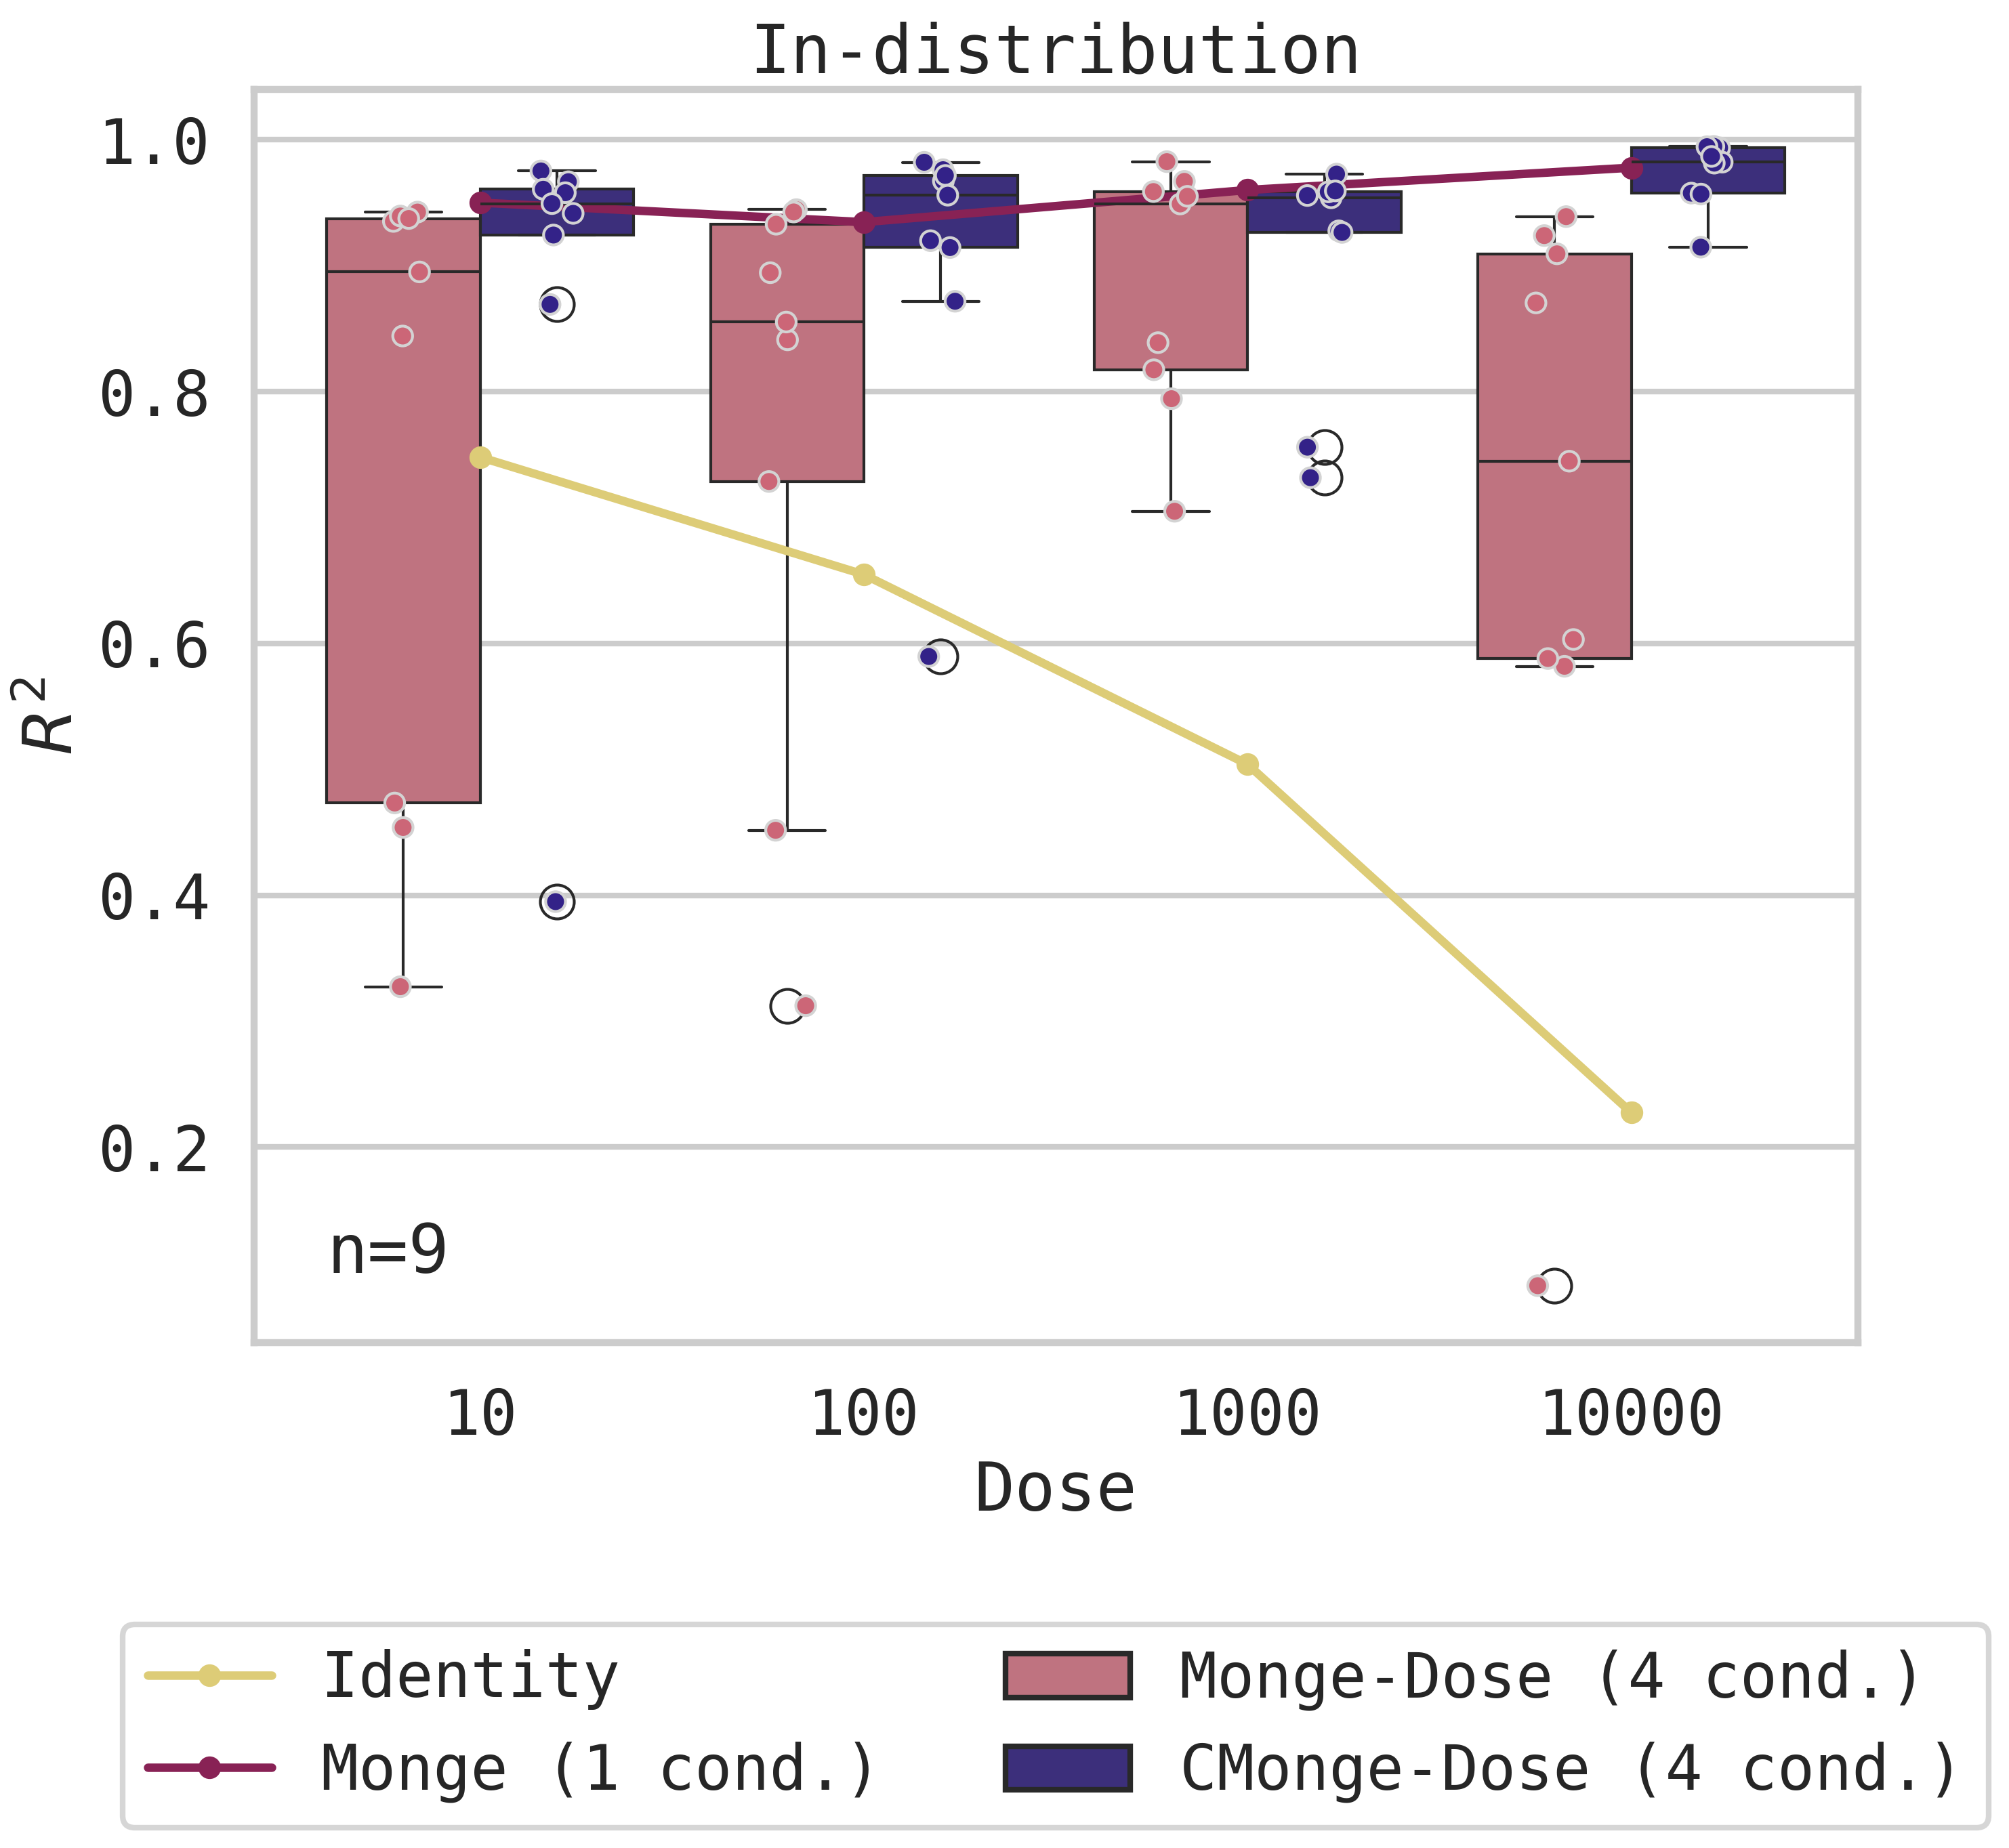

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(data=all_res, x="dose", y="r2", hue="model", palette=ID_model_color_dict,
           hue_order=["Monge-Dose (4 cond.)", "CMonge-Dose (4 cond.)"], ax=ax)
sns.stripplot(data=all_res, x="dose", y="r2", hue="model", palette=ID_model_color_dict, edgecolor="lightgray", linewidth=1, s=7,
           hue_order=["Monge-Dose (4 cond.)", "CMonge-Dose (4 cond.)"], ax=ax, dodge=True, legend=False)

ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")

plt.title("In-distribution")
plt.ylabel("$R^2$")
plt.xlabel("Dose")

handles, labels = ax.get_legend_handles_labels()
order = [3,2, 0, 1]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="", ncols=2, bbox_to_anchor=(0.5, -0.2), loc="upper center")
plt.text(x=-0.4, y=0.1 , s="n=9")
plt.tight_layout()
# plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_dose_ID_legend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/2992802544.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/2992802544.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")


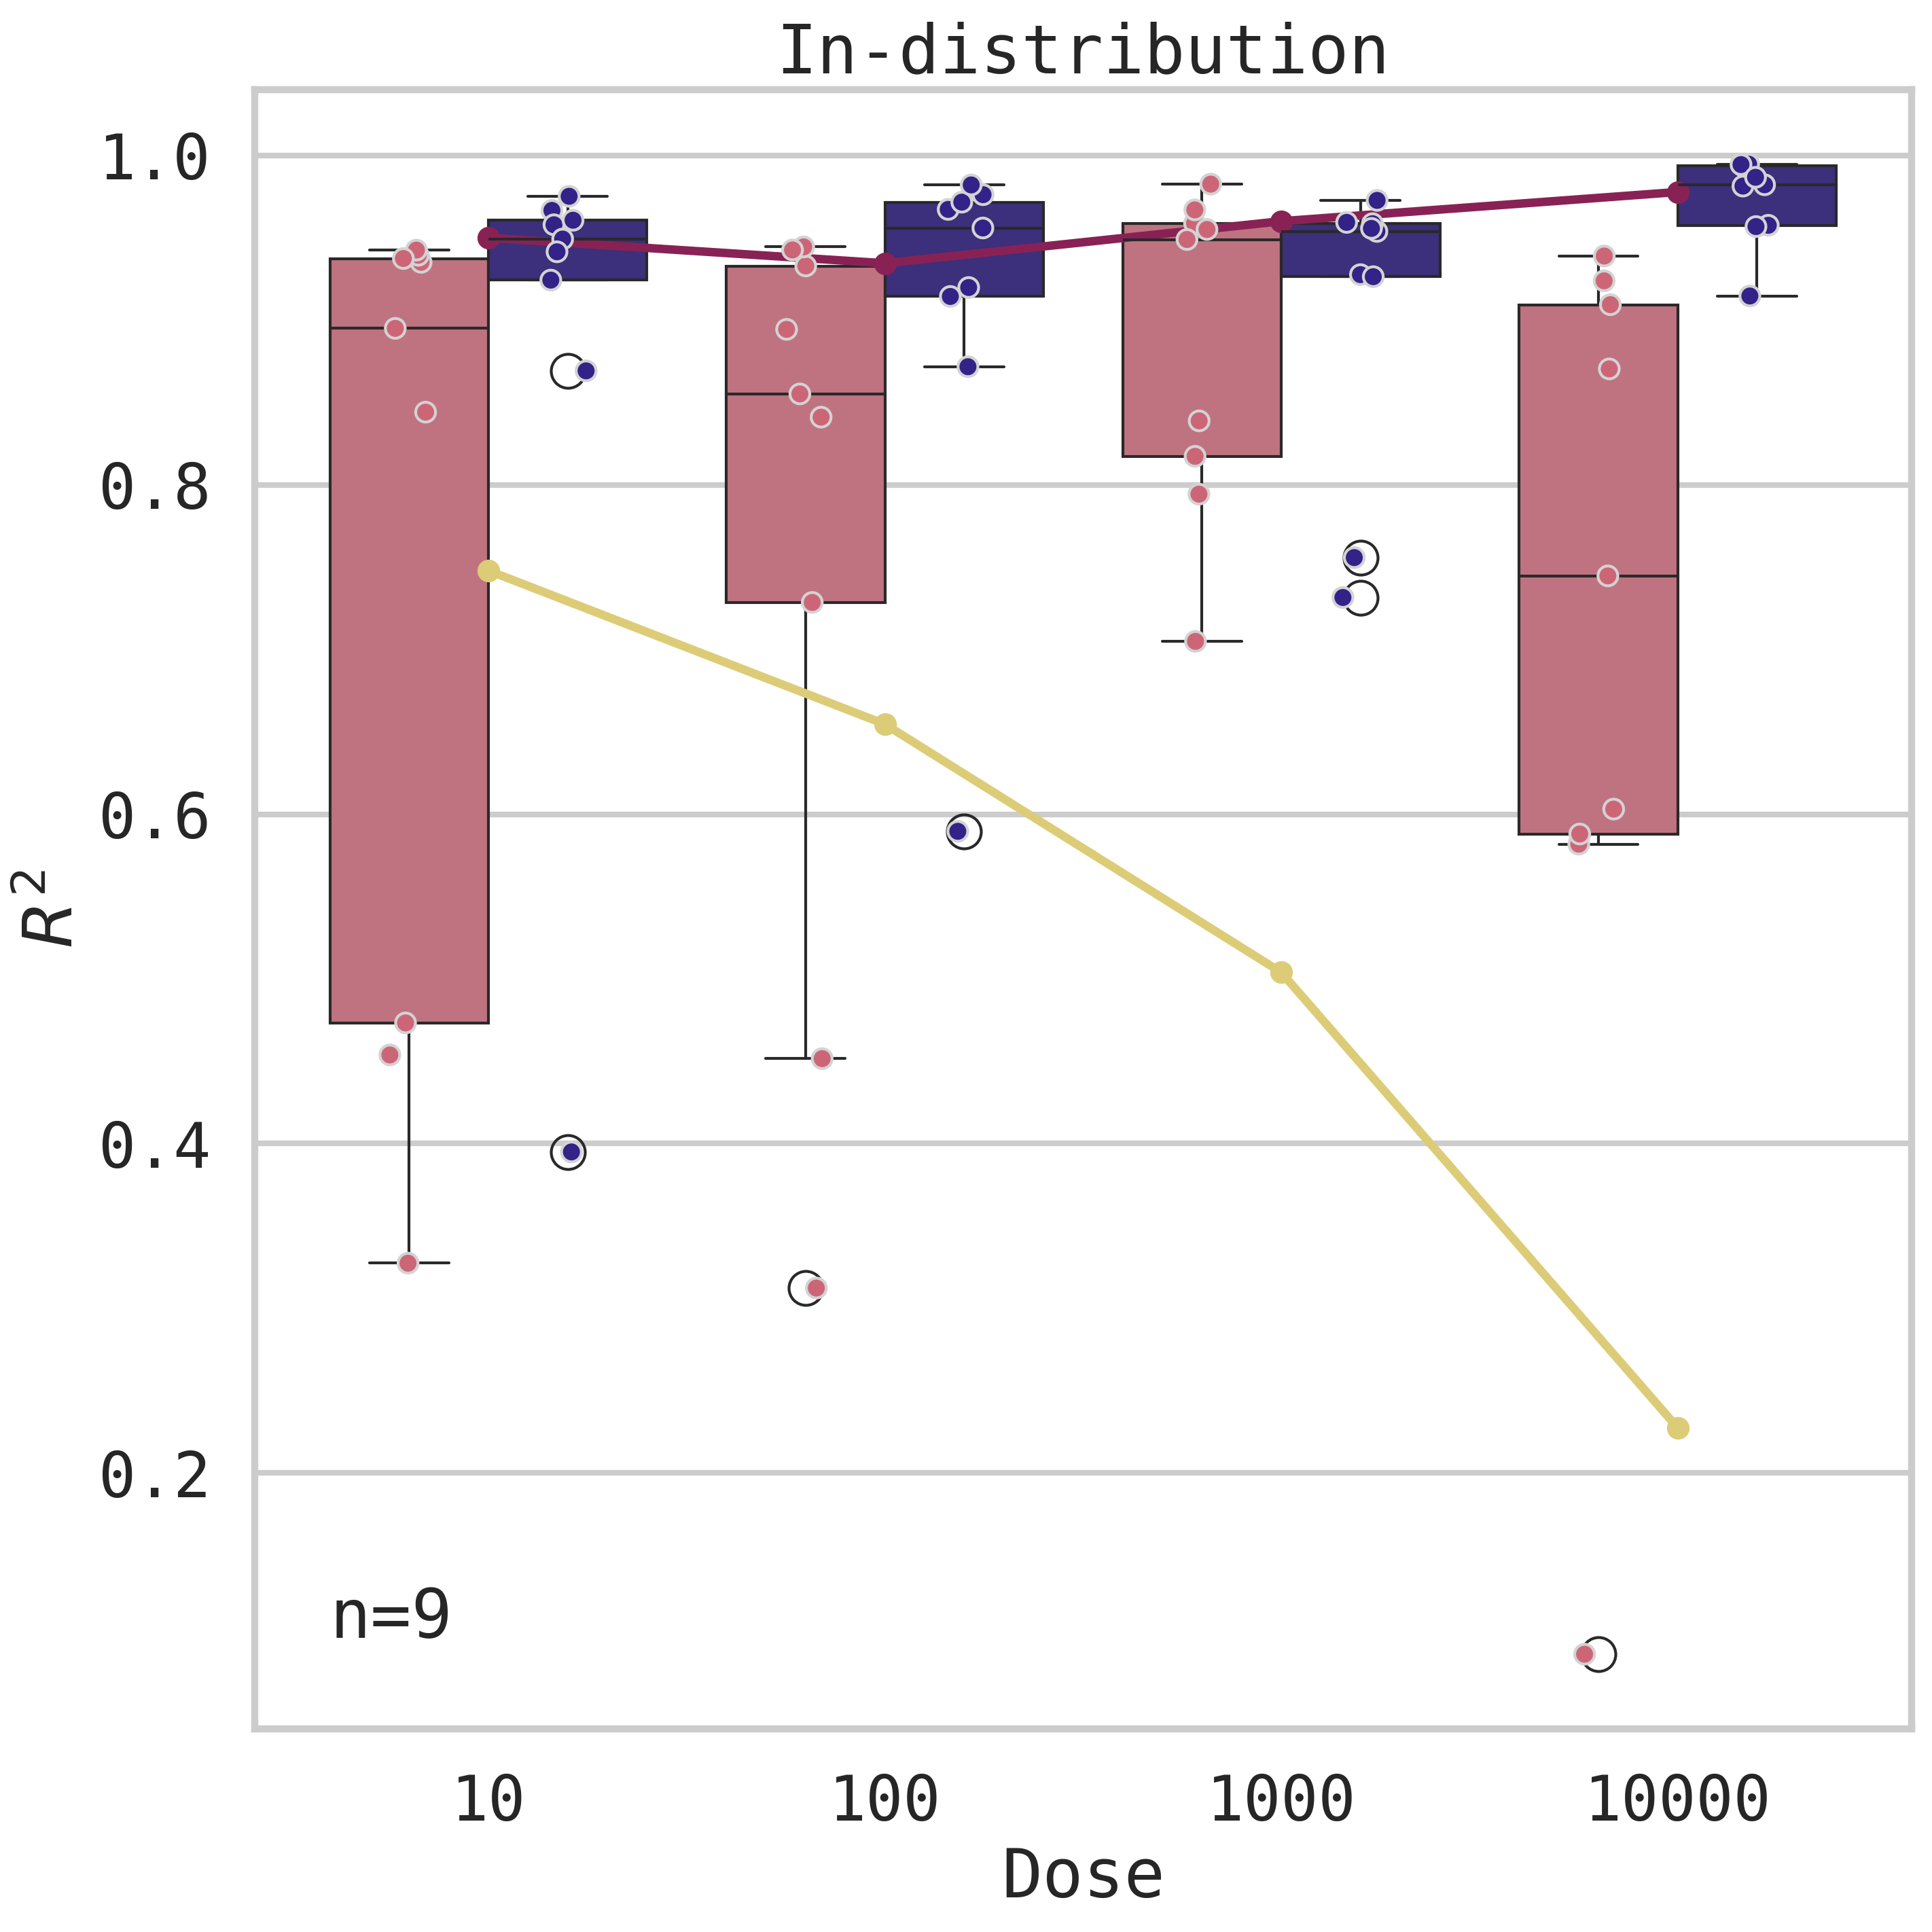

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_res, x="dose", y="r2", hue="model", palette=ID_model_color_dict,
           hue_order=["Monge-Dose (4 cond.)", 
                   "CMonge-Dose (4 cond.)"],
           ax=ax)
sns.stripplot(data=all_res, x="dose", y="r2", hue="model", palette=ID_model_color_dict, edgecolor="lightgray", linewidth=1, s=7,
           hue_order=["Monge-Dose (4 cond.)", 
                   "CMonge-Dose (4 cond.)"],
              dodge=True, legend=False,
           ax=ax)
plt.ylabel("$R^2$")
plt.xlabel("Dose")

ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")

plt.title("In-distribution")
plt.legend("", frameon=False)
plt.text(x=-0.4, y=0.1 , s="n=9")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_dose_ID_NoLegend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/280455728.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Unconditional", "Conditional"])


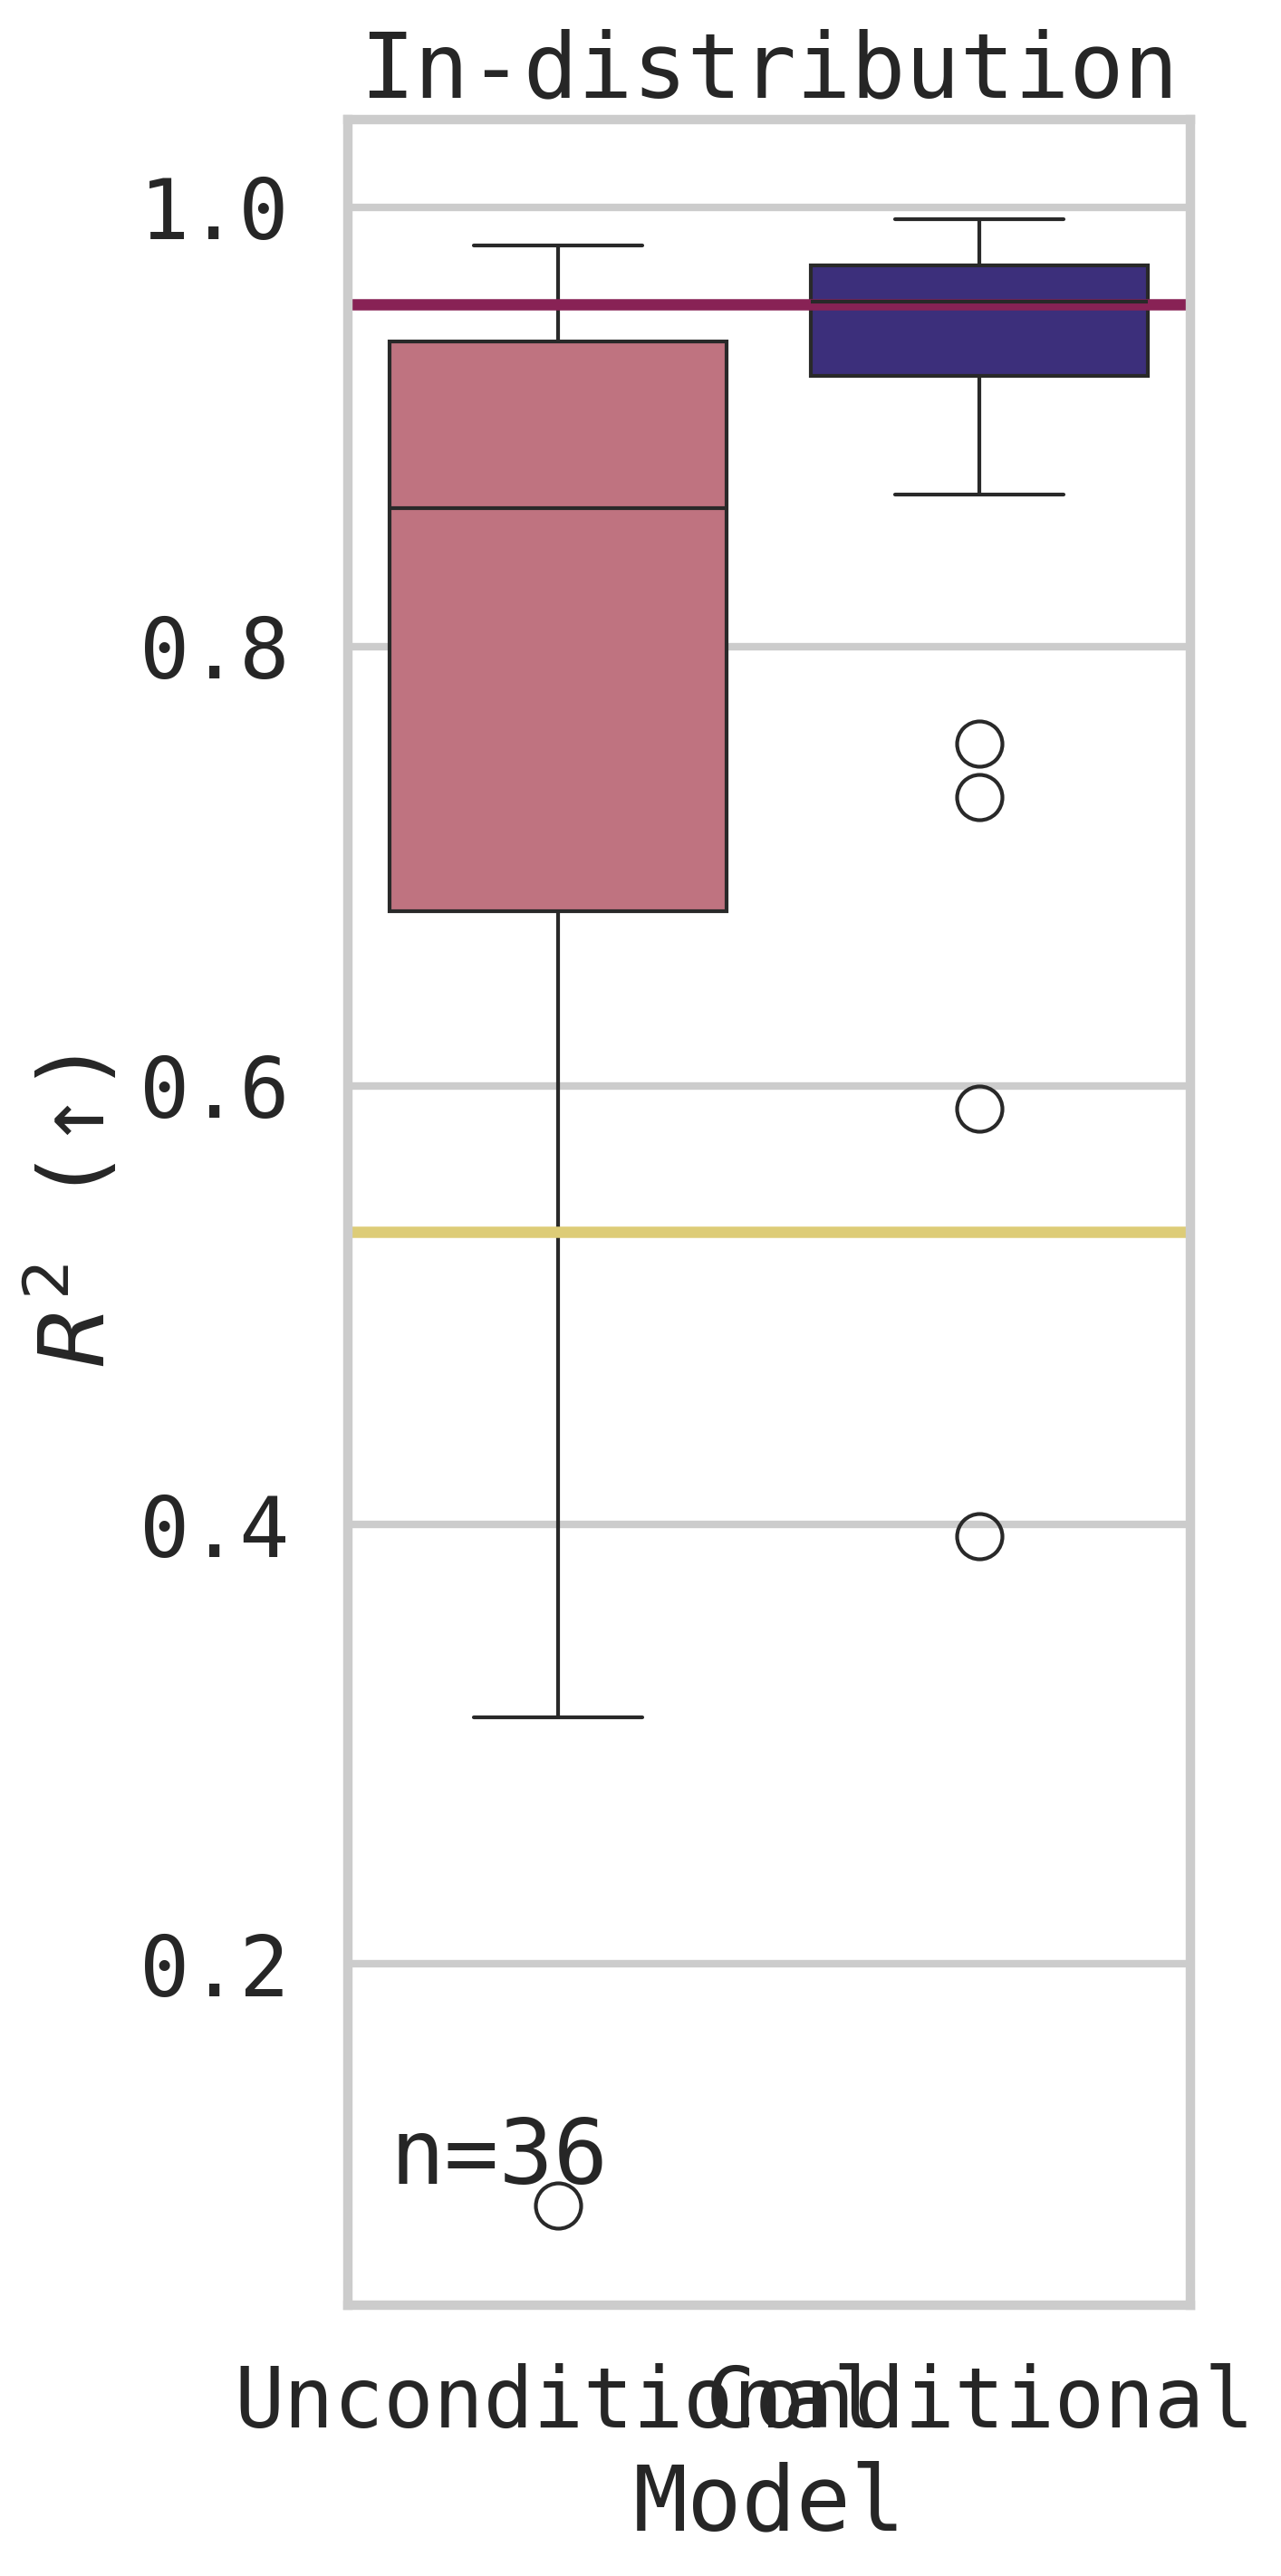

In [22]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=all_res[all_res["model"].isin(["Monge-Dose (4 cond.)", 
                   "CMonge-Dose (4 cond.)"])], x="model", y="r2", hue="model", palette=ID_model_color_dict,
           ax=ax)
plt.ylabel("$R^2$ (↑)")
plt.xlabel("Model")

ax.axhline(dose_monge["r2"].mean(),c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(dose_identity["r2"].mean(),c=ID_model_color_dict["Identity"], linewidth=3)

plt.title("In-distribution")
ax.set_xticklabels(["Unconditional", "Conditional"])

plt.legend("", frameon=False)
plt.text(x=-0.4, y=0.1 , s="n=36")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_dose_ID_summary_NoLegend.pdf", bbox_inches="tight")

In [23]:
dose_monge["r2"].iloc[-1]

0.9778035941797055

In [24]:
dose_monge

dose            model        r2       mmd  wasserstein  drug signature  \
0     10  Monge (1 cond.)  0.950049  0.009188     3.120116        0.464517   
1    100  Monge (1 cond.)  0.934544  0.010306     3.162022        0.516355   
2   1000  Monge (1 cond.)  0.960062  0.009611     3.163832        0.456714   
3  10000  Monge (1 cond.)  0.977804  0.011774     3.199606        0.496089   

   sinkhorn div  
0      2.553289  
1      2.597246  
2      2.603529  
3      2.649582

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/214385193.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Monge", "CMonge"])


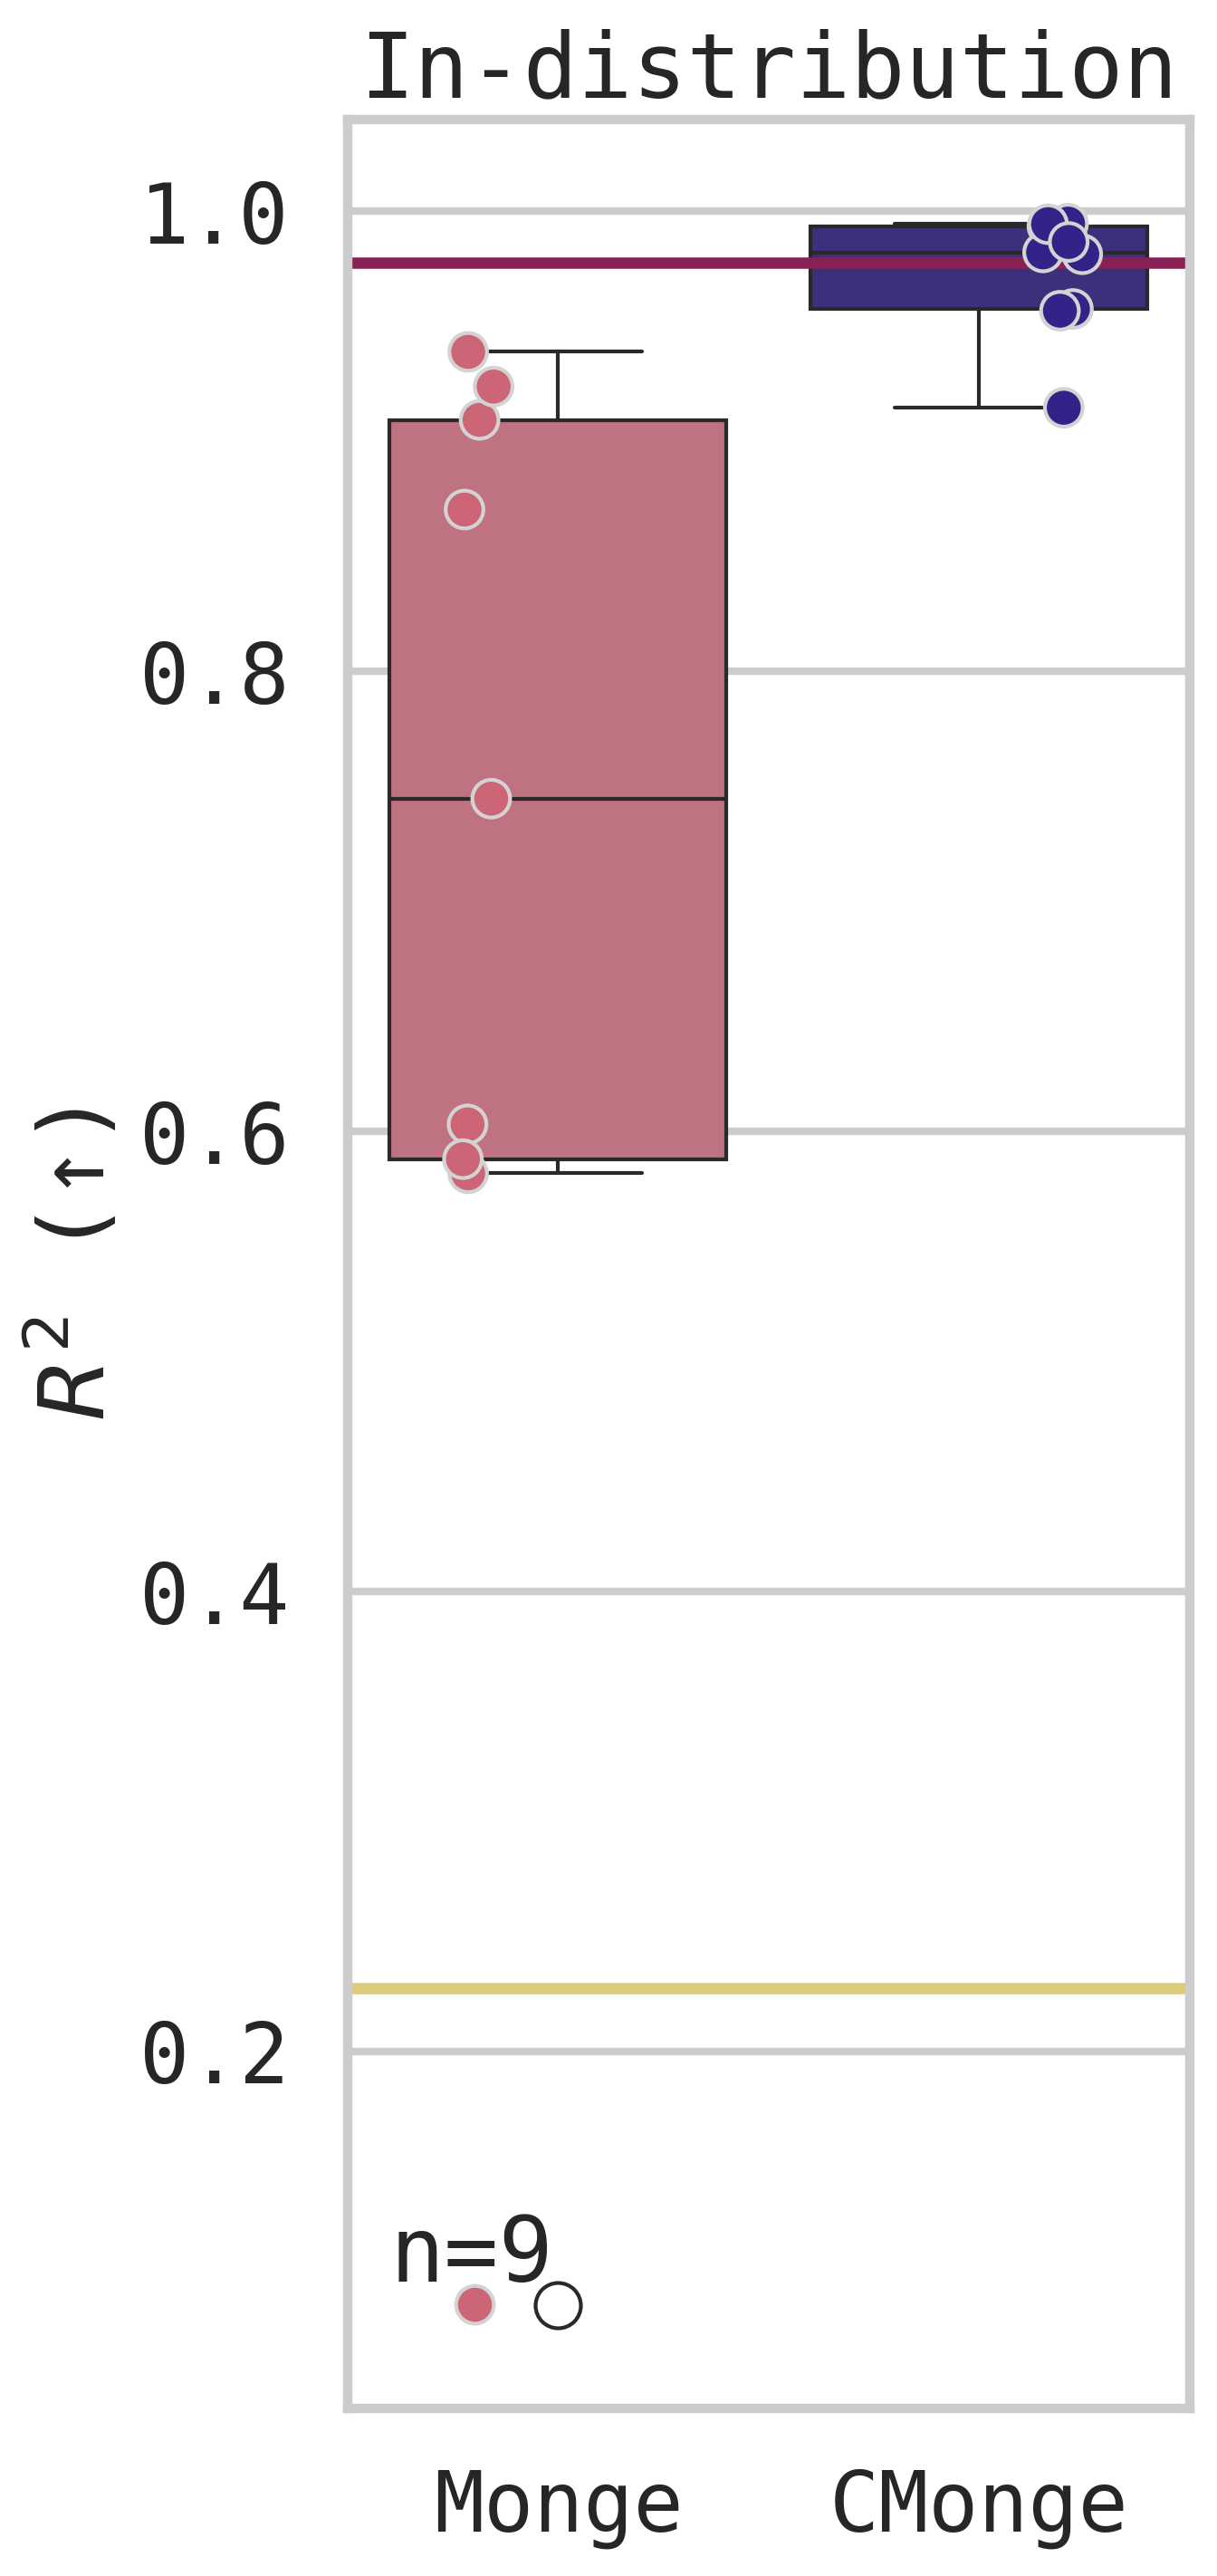

In [25]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=all_res[(all_res["model"].isin(["Monge-Dose (4 cond.)", "CMonge-Dose (4 cond.)"])&(all_res["dose"]==10000))], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict,
           ax=ax)
sns.stripplot(data=all_res[(all_res["model"].isin(["Monge-Dose (4 cond.)", "CMonge-Dose (4 cond.)"])&(all_res["dose"]==10000))], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict, edgecolor="lightgray", linewidth=1, s=10, dodge=True,
           ax=ax)
plt.ylabel("$R^2$ (↑)")
plt.xlabel("")

plt.title("In-distribution")
ax.axhline(dose_monge["r2"].iloc[-1],c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(dose_identity["r2"].iloc[-1],c=ID_model_color_dict["Identity"], linewidth=3)

ax.set_xticklabels(["Monge", "CMonge"])

plt.legend("", frameon=False)
plt.text(x=-0.4, y=0.1 , s="n=9")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_dose_ID_HighDose_NoLegend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58184/2817287966.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Monge", "CMonge"])


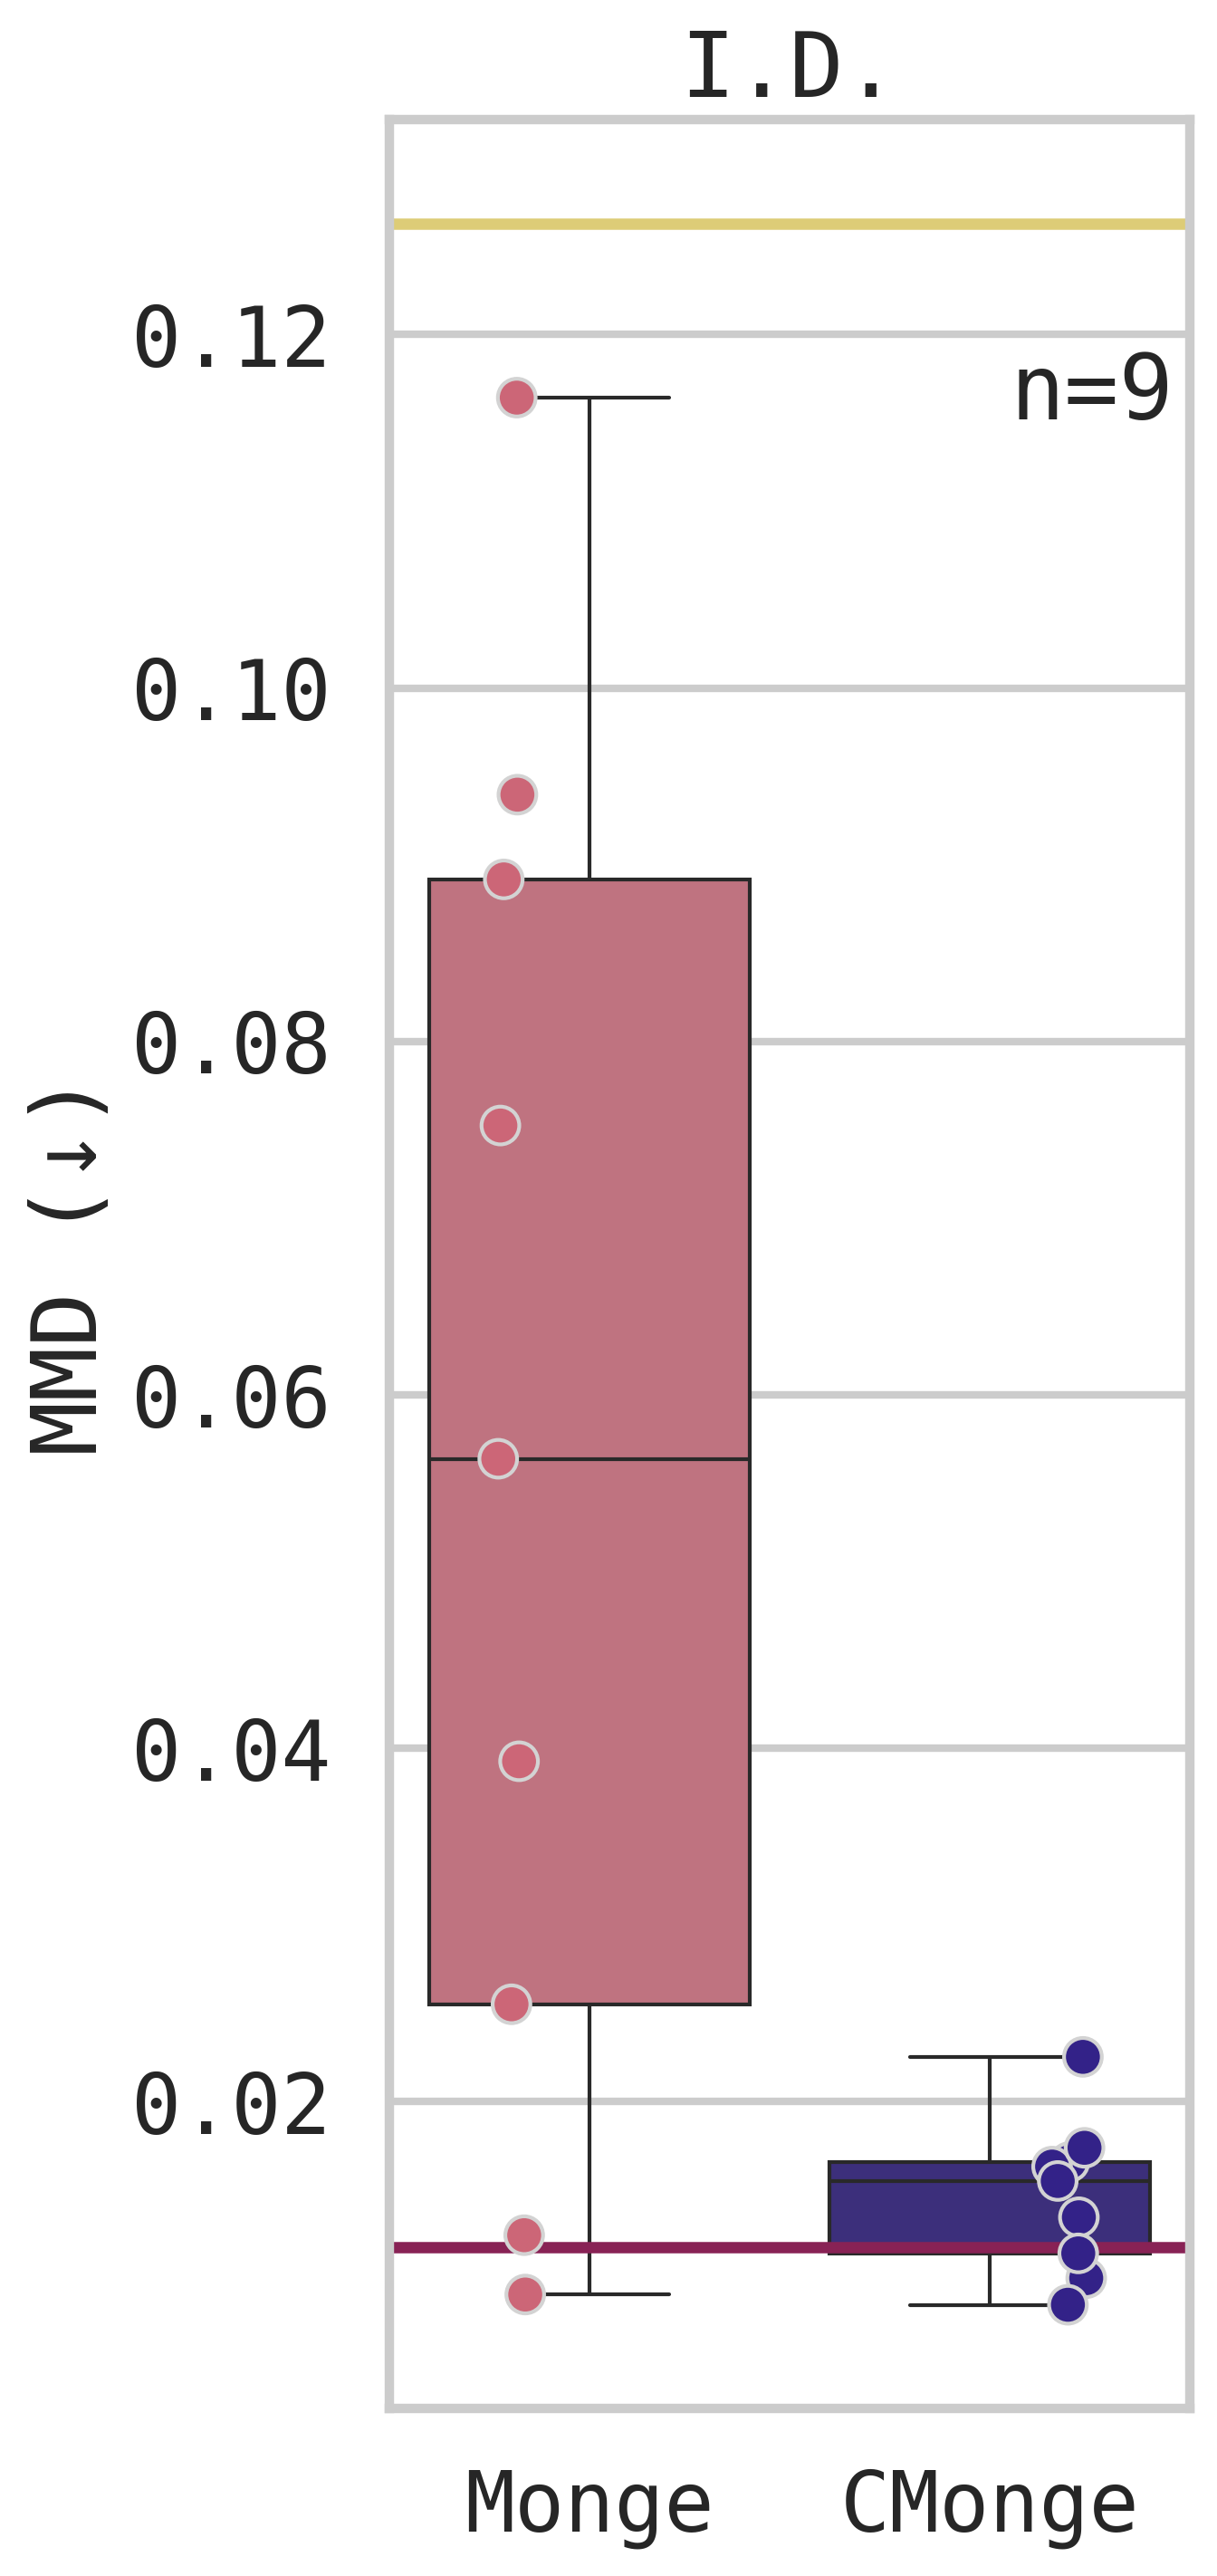

In [27]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=all_res[(all_res["model"].isin(["Monge-Dose (4 cond.)", "CMonge-Dose (4 cond.)"])&(all_res["dose"]==10000))], 
            x="model", y="mmd", hue="model", palette=ID_model_color_dict,
           ax=ax)
sns.stripplot(data=all_res[(all_res["model"].isin(["Monge-Dose (4 cond.)", "CMonge-Dose (4 cond.)"])&(all_res["dose"]==10000))], 
            x="model", y="mmd", hue="model", palette=ID_model_color_dict, edgecolor="lightgray", linewidth=1, s=10, dodge=True,
           ax=ax)
plt.ylabel("MMD (↓)")
plt.xlabel("")

plt.title("I.D.")
ax.axhline(dose_monge["mmd"].iloc[-1],c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(dose_identity["mmd"].iloc[-1],c=ID_model_color_dict["Identity"], linewidth=3)

ax.set_xticklabels(["Monge", "CMonge"])

plt.legend("", frameon=False)
plt.text(x=1.05, y=0.1152 , s="n=9")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_dose_ID_HighDose_MMD_NoLegend.pdf", bbox_inches="tight")

# Drug + dose in distribution

## Conditional Monge Drug + Dose 

In [22]:
leave = {"drug": [], "dose":[], "r2": [], "mmd":[], "wasserstein":[], "drug signature": [], "sinkhorn div": [],"model": []}
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/cond/monge_moe_homo.json")
with open(file_path, "r") as file:
    logs = json.load(file)
exp = logs["experiments"][0]
for drugdose, v in exp["out-sample"].items():
    drug, dose = drugdose.split("-")
    print(v.keys())
    leave["drug"].append(drug)
    leave["dose"].append(dose)
    leave["mmd"].append(v["mean_statistics"]["mean_mmd"])
    leave["wasserstein"].append(v["mean_statistics"]["mean_wasserstein"])
    leave["r2"].append(v["mean_statistics"]["mean_r2"])
    leave["drug signature"].append(v["mean_statistics"]["mean_drug_signature"])
    leave["sinkhorn div"].append(v["mean_statistics"]["mean_sinkhorn div"])
    leave["model"].append("CMonge-DrugDose-MoA")


file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/cond/monge_rdkit_homo.json")
with open(file_path, "r") as file:
    logs = json.load(file)

exp = logs["experiments"][0]
for drugdose, v in exp["out-sample"].items():
    drug, dose = drugdose.split("-")
    leave["drug"].append(drug)
    leave["dose"].append(dose)
    leave["mmd"].append(v["mean_statistics"]["mean_mmd"])
    leave["wasserstein"].append(v["mean_statistics"]["mean_wasserstein"])
    leave["r2"].append(v["mean_statistics"]["mean_r2"])
    leave["drug signature"].append(v["mean_statistics"]["mean_drug_signature"])
    leave["sinkhorn div"].append(v["mean_statistics"]["mean_sinkhorn div"])
    leave["model"].append("CMonge-DrugDose-RDkit")
cmonge_drugdose_id = pd.DataFrame(leave)
cmonge_drugdose_id["condition"] = cmonge_drugdose_id["drug"] + "-" + cmonge_drugdose_id["dose"].astype(str)


dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'drug_signature', 'r2', 'mean_statistics'])
dict_keys(['point_clouds', 'drug', 'wasserstein', 'mmd', 'sinkhorn_div', 'monge_gap', 'dru

In [23]:
cmonge_drugdose_id

drug   dose        r2       mmd  wasserstein  drug signature  \
0    abexinostat     10  0.892565  0.009709     2.801959        0.504819   
1     belinostat     10  0.926464  0.007888     2.693317        0.402685   
2     dacinostat     10  0.887287  0.009773     2.717972        0.501805   
3     entinostat     10  0.930769  0.007226     2.851007        0.444600   
4     givinostat     10  0.963310  0.008100     3.053941        0.450441   
..           ...    ...       ...       ...          ...             ...   
67    givinostat  10000  0.000461  0.180806     7.603781        6.388932   
68  mocetinostat  10000  0.199274  0.042312     4.254184        2.370381   
69   pracinostat  10000  0.079104  0.157083     6.853311        5.728965   
70  tacedinaline  10000  0.680212  0.016563     3.223572        1.016519   
71    trametinib  10000  0.876727  0.011846     3.129821        0.643266   

    sinkhorn div                  model           condition  
0       2.228917    CMonge-DrugDose-MoA      abexinostat-10  
1       2.119514    CMonge-DrugDose-MoA       belinostat-10  
2       2.149696    CMonge-DrugDose-MoA       dacinostat-10  
3       2.287722    CMonge-DrugDose-MoA       entinostat-10  
4       2.492405    CMonge-DrugDose-MoA       givinostat-10  
..           ...                    ...                 ...  
67      7.055902  CMonge-DrugDose-RDkit    givinostat-10000  
68      3.717020  CMonge-DrugDose-RDkit  mocetinostat-10000  
69      6.301847  CMonge-DrugDose-RDkit   pracinostat-10000  
70      2.664369  CMonge-DrugDose-RDkit  tacedinaline-10000  
71      2.578355  CMonge-DrugDose-RDkit    trametinib-10000  

[72 rows x 9 columns]

## Monge Drug Dose ID (Monge model on all conditions but no contextual information)

In [24]:
with open(f"/Users/alicedriessen/Box/otperturb/alice_exp/sciplex_monge_id/one_model_monge_sciplex_logs.yml") as stream:
        logs = yaml.safe_load(stream)

with open(f"/Users/alicedriessen/Box/otperturb/alice_exp/sciplex_monge_id/monge-one-model-ID-sciplex.yml") as stream:
        config = yaml.safe_load(stream)

In [25]:
conditions = [c for c in config["drug_conditions"] for i in range(2)]
monge_drugdose_id = [pd.DataFrame(logs["experiments"][i]["mean_statistics"], index=[conditions[i]]) for i in range(len(logs["experiments"]))]
monge_drugdose_id = pd.concat(monge_drugdose_id)
monge_drugdose_id[["drug", "dose"]] = [i.split("-") for i in monge_drugdose_id.index]
monge_drugdose_id = monge_drugdose_id.reset_index(drop=False).rename(columns={"index": "condition"})
monge_drugdose_id["model"] = ["Monge-DrugDose", "Identity"]*36
monge_drugdose_id = monge_drugdose_id[monge_drugdose_id["model"]=="Monge-DrugDose"].reset_index(drop=True)
monge_drugdose_id = monge_drugdose_id.rename(columns={c: c.replace("mean_", "") for c in monge_drugdose_id.columns if "mean_" in c})
monge_drugdose_id

condition  wasserstein       mmd  sinkhorn div  monge_gap  \
0       abexinostat-10     3.242397  0.012849      2.665836  13.152071   
1      abexinostat-100     3.340483  0.018145      2.768108  13.086434   
2     abexinostat-1000     3.397719  0.023527      2.832800  13.074697   
3    abexinostat-10000     5.895378  0.107262      5.335856  12.851451   
4        belinostat-10     4.402564  0.015837      3.824017  13.495016   
5       belinostat-100     4.137097  0.011902      3.559520  13.466353   
6      belinostat-1000     4.214706  0.012943      3.644569  13.427165   
7     belinostat-10000     5.874518  0.074624      5.321491  13.066709   
8        dacinostat-10     3.230243  0.016642      2.657682  12.942149   
9       dacinostat-100     3.346111  0.028279      2.784163  12.931560   
10     dacinostat-1000     5.269732  0.070601      4.714922  12.985080   
11    dacinostat-10000     7.981266  0.195277      7.431277  12.724925   
12       entinostat-10     3.705299  0.011699      3.139519  13.389245   
13      entinostat-100     3.771920  0.013425      3.202592  13.349663   
14     entinostat-1000     3.738168  0.011234      3.176108  13.514256   
15    entinostat-10000     4.544844  0.032775      3.989393  13.117665   
16       givinostat-10     3.797018  0.019301      3.227227  13.443545   
17      givinostat-100     3.742074  0.018882      3.176301  13.528293   
18     givinostat-1000     3.710239  0.018713      3.157540  13.503051   
19    givinostat-10000     7.529104  0.146149      6.981412  12.899121   
20     mocetinostat-10     5.366186  0.016914      4.791839  14.094075   
21    mocetinostat-100     4.996535  0.012290      4.419035  14.117193   
22   mocetinostat-1000     5.006878  0.012375      4.432557  14.093996   
23  mocetinostat-10000     5.226441  0.028106      4.686277  13.449018   
24      pracinostat-10     2.984309  0.012099      2.408894  13.082381   
25     pracinostat-100     3.007706  0.013312      2.436958  13.045427   
26    pracinostat-1000     3.056802  0.017446      2.489005  13.042242   
27   pracinostat-10000     7.373322  0.192314      6.819174  12.690013   
28     tacedinaline-10     4.553331  0.013069      3.982359  14.037179   
29    tacedinaline-100     4.600611  0.012564      4.036988  13.905034   
30   tacedinaline-1000     4.472397  0.011209      3.907226  14.073082   
31  tacedinaline-10000     4.582432  0.012784      4.017681  14.010088   
32       trametinib-10     4.191624  0.027262      3.634289  13.134506   
33      trametinib-100     3.938137  0.021873      3.381411  13.260264   
34     trametinib-1000     3.946909  0.022101      3.384865  13.178014   
35    trametinib-10000     4.041347  0.026056      3.490034  13.186623   

    drug_signature        r2          drug   dose           model  
0         0.962576  0.670340   abexinostat     10  Monge-DrugDose  
1         1.106684  0.599862   abexinostat    100  Monge-DrugDose  
2         1.176057  0.549883   abexinostat   1000  Monge-DrugDose  
3         4.493033  0.074325   abexinostat  10000  Monge-DrugDose  
4         1.678830  0.641696    belinostat     10  Monge-DrugDose  
5         1.346611  0.686163    belinostat    100  Monge-DrugDose  
6         1.365426  0.725358    belinostat   1000  Monge-DrugDose  
7         3.949614  0.036815    belinostat  10000  Monge-DrugDose  
8         0.921227  0.763139    dacinostat     10  Monge-DrugDose  
9         0.995622  0.644661    dacinostat    100  Monge-DrugDose  
10        3.578982  0.103724    dacinostat   1000  Monge-DrugDose  
11        6.850047  0.045130    dacinostat  10000  Monge-DrugDose  
12        1.020332  0.809068    entinostat     10  Monge-DrugDose  
13        1.146048  0.801661    entinostat    100  Monge-DrugDose  
14        0.891380  0.838346    entinostat   1000  Monge-DrugDose  
15        1.945848  0.654072    entinostat  10000  Monge-DrugDose  
16        1.369888  0.827629    givinostat     10  Monge-DrugDose  
17        1.270091  0.853801    givinostat    100 

## All drugdose

In [26]:
all_drugdose_res = pd.concat([monge_per_cond, identity, monge_drugdose_id, cmonge_drugdose_id]).reset_index(drop=True)
all_drugdose_res = all_drugdose_res.replace(rename_dict)

In [27]:
all_drugdose_res

drug   dose        r2       mmd  wasserstein  drug signature  \
0     abexinostat     10  0.915904  0.010710     2.674978        0.464271   
1      belinostat     10  0.940388  0.009707     3.389919        0.620525   
2      dacinostat     10  0.951761  0.008108     2.541648        0.311557   
3      entinostat     10  0.949998  0.006666     2.861559        0.416590   
4      givinostat     10  0.979153  0.008200     2.832597        0.414753   
..            ...    ...       ...       ...          ...             ...   
175    givinostat  10000  0.000461  0.180806     7.603781        6.388932   
176  mocetinostat  10000  0.199274  0.042312     4.254184        2.370381   
177   pracinostat  10000  0.079104  0.157083     6.853311        5.728965   
178  tacedinaline  10000  0.680212  0.016563     3.223572        1.016519   
179    trametinib  10000  0.876727  0.011846     3.129821        0.643266   

     sinkhorn div                             model           condition  \
0        2.102390                   Monge (1 cond.)      abexinostat-10   
1        2.815480                   Monge (1 cond.)       belinostat-10   
2        1.972972                   Monge (1 cond.)       dacinostat-10   
3        2.298825                   Monge (1 cond.)       entinostat-10   
4        2.270961                   Monge (1 cond.)       givinostat-10   
..            ...                               ...                 ...   
175      7.055902  CMonge-DrugDose-RDkit (36 cond.)    givinostat-10000   
176      3.717020  CMonge-DrugDose-RDkit (36 cond.)  mocetinostat-10000   
177      6.301847  CMonge-DrugDose-RDkit (36 cond.)   pracinostat-10000   
178      2.664369  CMonge-DrugDose-RDkit (36 cond.)  tacedinaline-10000   
179      2.578355  CMonge-DrugDose-RDkit (36 cond.)    trametinib-10000   

     monge_gap  drug_signature  
0          NaN             NaN  
1          NaN             NaN  
2          NaN             NaN  
3          NaN             NaN  
4          NaN             NaN  
..         ...             ...  
175        NaN             NaN  
176        NaN             NaN  
177        NaN             NaN  
178        NaN             NaN  
179        NaN             NaN  

[180 rows x 11 columns]

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/3040900036.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=all_drugdose_res, x="dose", y="r2", hue="model",
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/3040900036.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/3040900036.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")


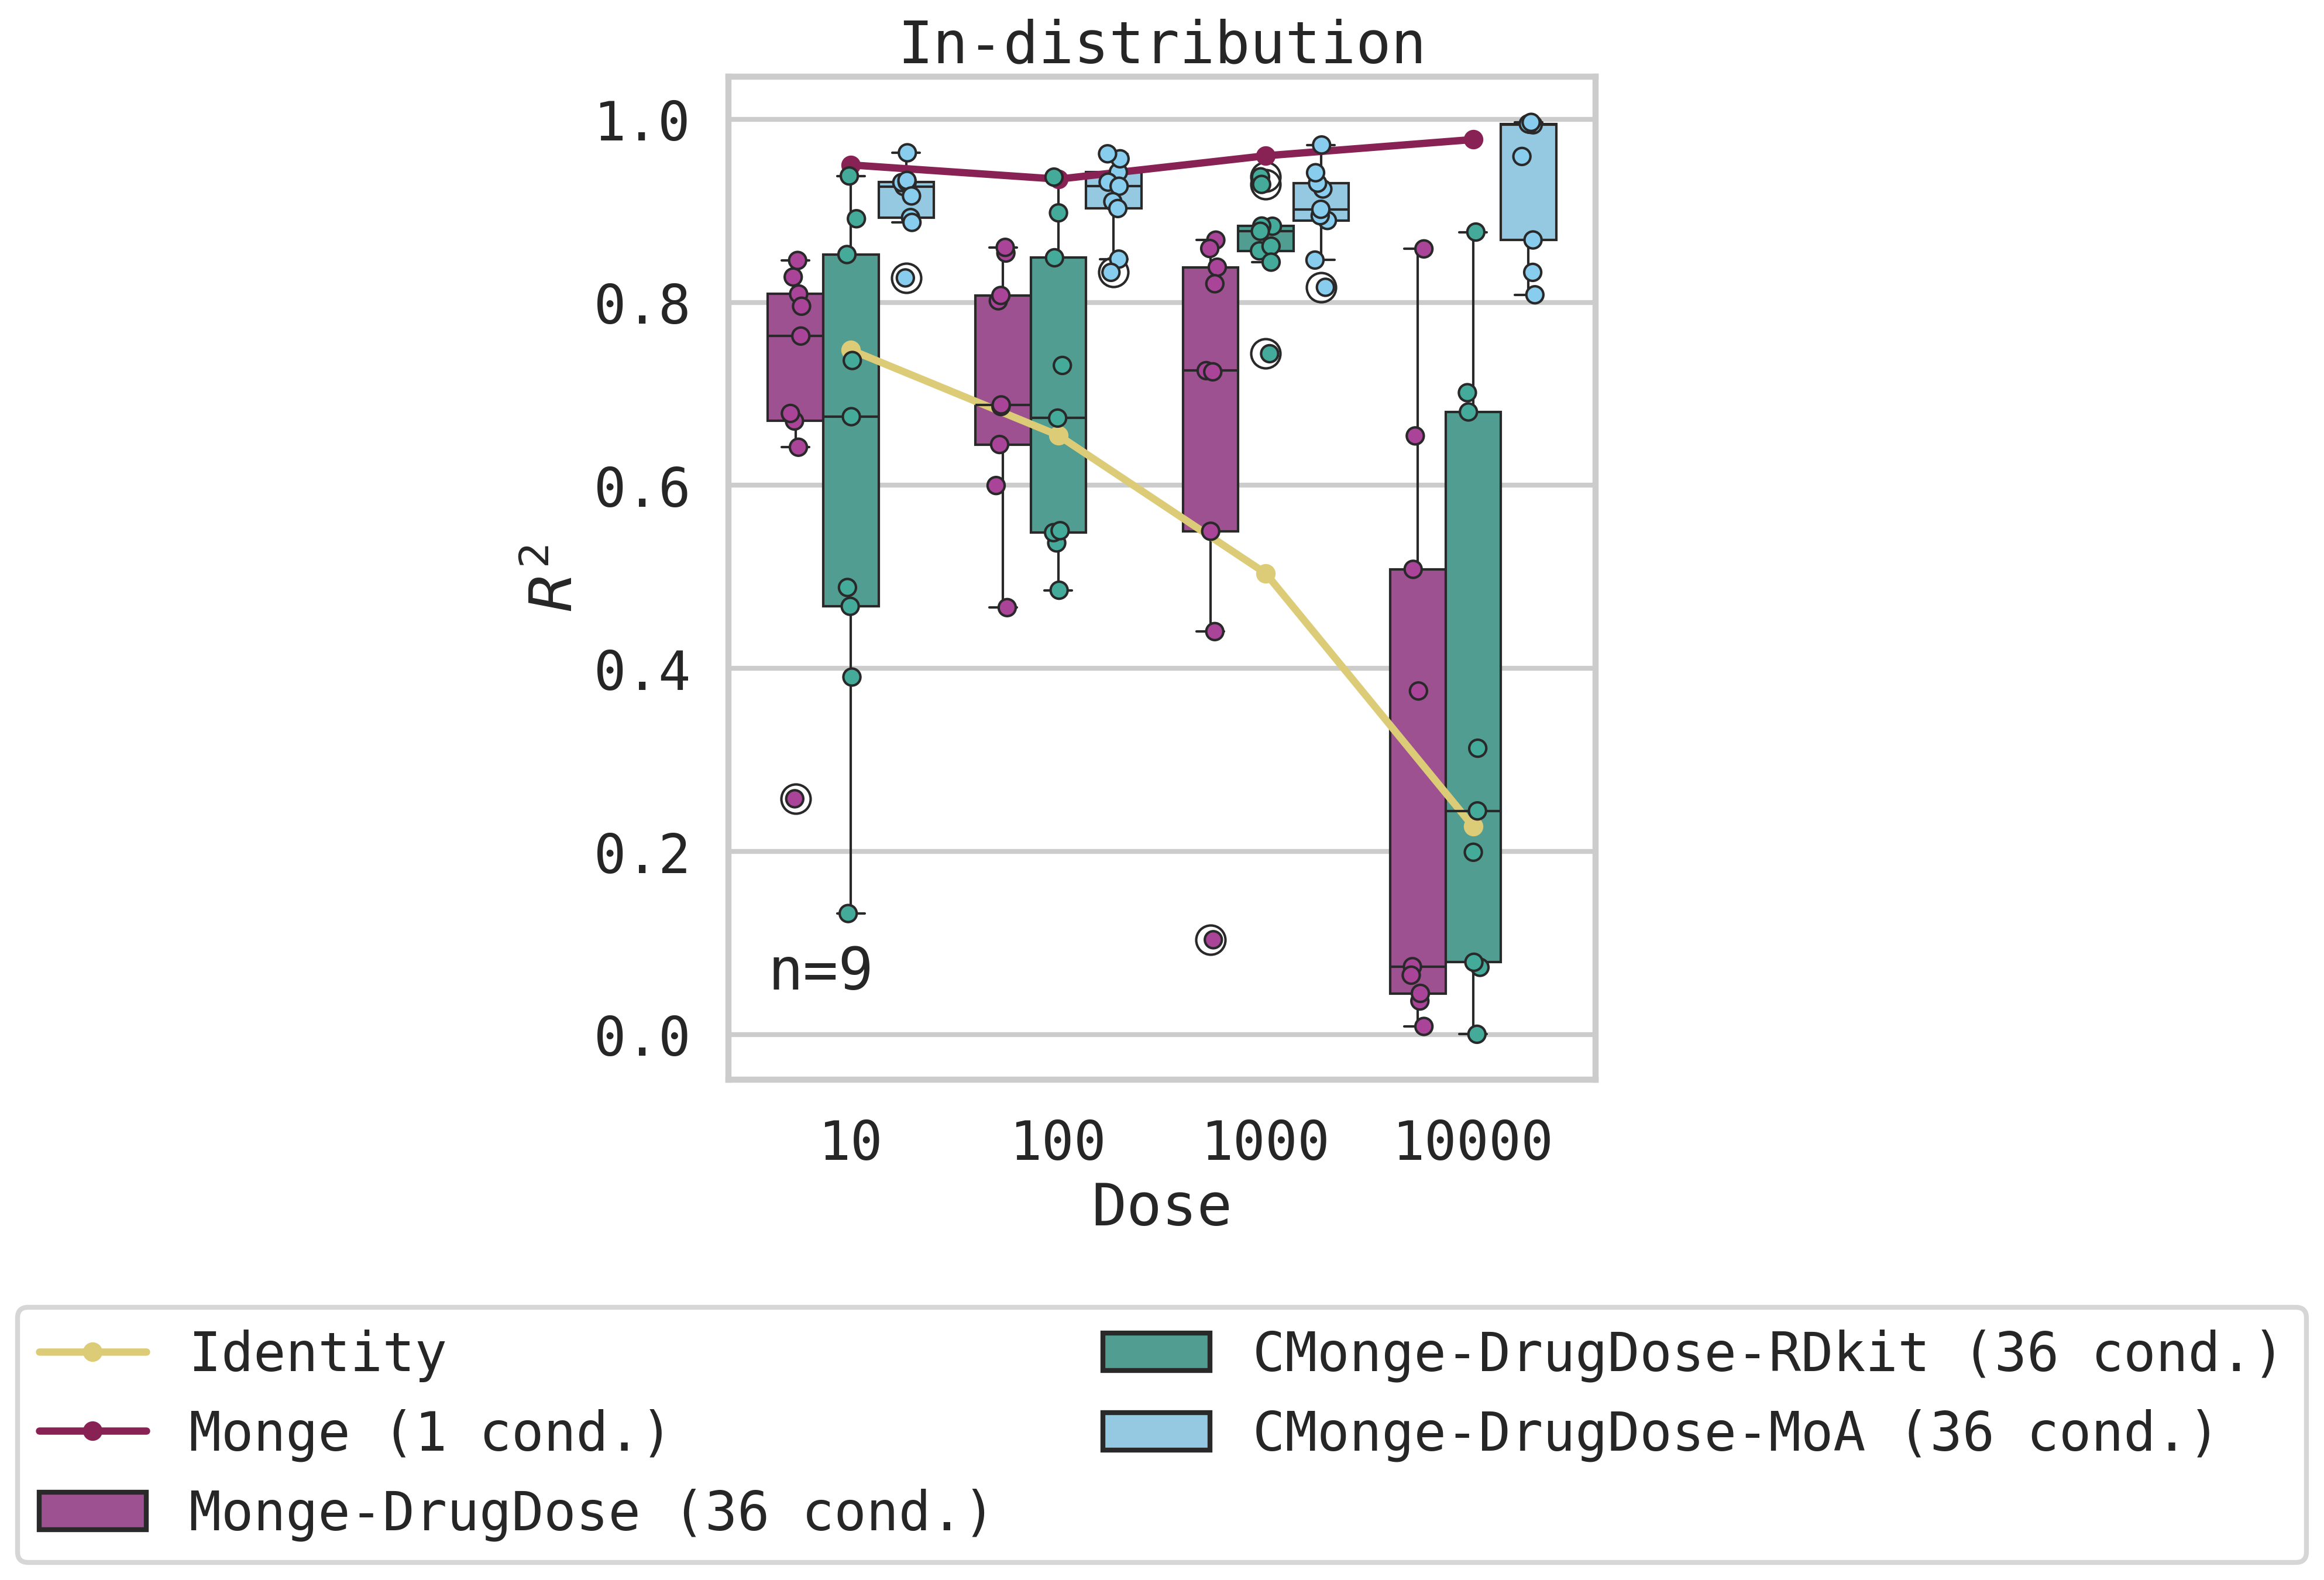

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_drugdose_res, x="dose", y="r2", hue="model", palette=ID_model_color_dict,
           hue_order=["Monge-DrugDose (36 cond.)", 
                   "CMonge-DrugDose-RDkit (36 cond.)", "CMonge-DrugDose-MoA (36 cond.)"],
           ax=ax)
sns.stripplot(data=all_drugdose_res, x="dose", y="r2", hue="model", 
           hue_order=["Monge-DrugDose (36 cond.)", 
                   "CMonge-DrugDose-RDkit (36 cond.)", "CMonge-DrugDose-MoA (36 cond.)"],
            dodge=True, palette=ID_model_color_dict, edgecolor="gray", linewidth=1, s=7,legend=False,
           ax=ax)
ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")

plt.title("In-distribution")
plt.ylabel("$R^2$")
plt.xlabel("Dose")

handles, labels = ax.get_legend_handles_labels()
order = [4,3, 0, 1, 2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="", ncols=2, bbox_to_anchor=(0.5, -0.2), loc="upper center")
plt.tight_layout()
plt.text(x=-0.4, y=0.05 , s="n=9")
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_drugdose_ID_legend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/176742343.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=all_drugdose_res, x="dose", y="r2", hue="model",
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/176742343.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7)
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/176742343.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7)


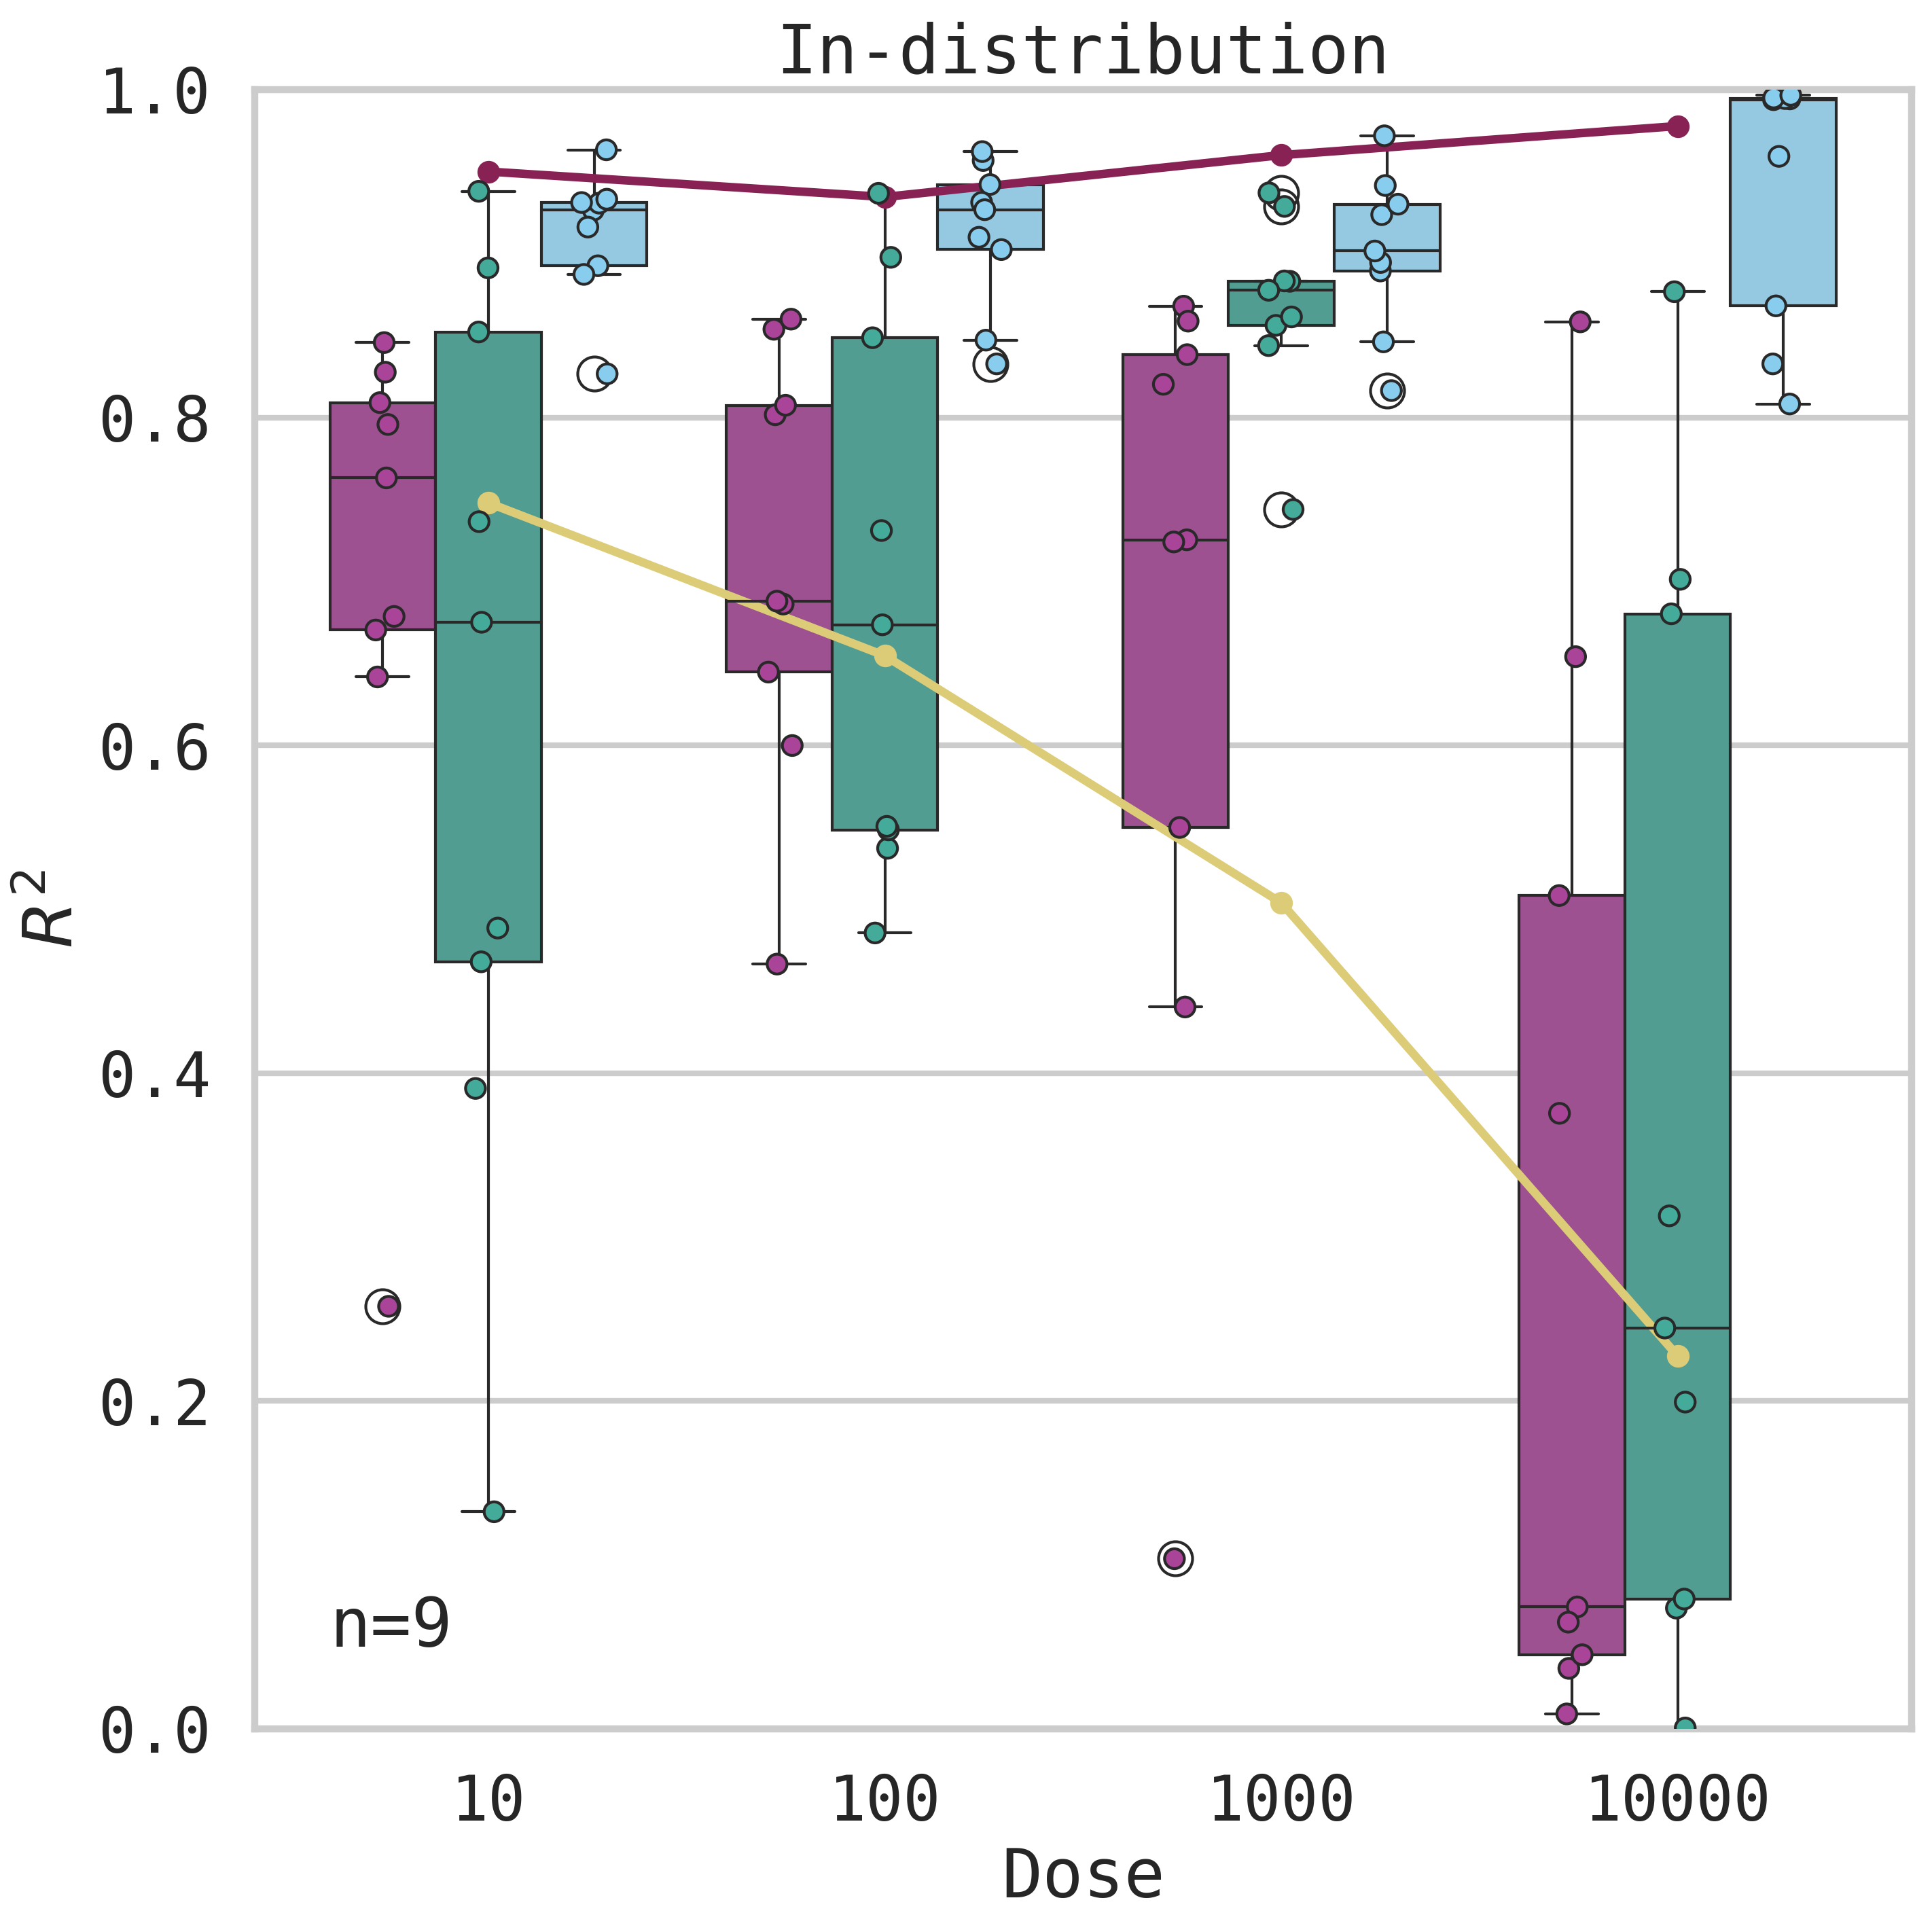

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_drugdose_res, x="dose", y="r2", hue="model", palette=ID_model_color_dict,
           hue_order=["Monge-DrugDose (36 cond.)", 
                   "CMonge-DrugDose-RDkit (36 cond.)", "CMonge-DrugDose-MoA (36 cond.)"],
           ax=ax)
sns.stripplot(data=all_drugdose_res, x="dose", y="r2", hue="model", 
           hue_order=["Monge-DrugDose (36 cond.)", 
                   "CMonge-DrugDose-RDkit (36 cond.)", "CMonge-DrugDose-MoA (36 cond.)"],
            dodge=True, palette=ID_model_color_dict, legend=False, linewidth=1, edgecolor="gray", s=7,
           ax=ax)
ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7)
ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7)

plt.title("In-distribution")
plt.ylabel("$R^2$")
plt.xlabel("Dose")
plt.ylim((0,1))

plt.legend('',frameon=False)
plt.tight_layout()
plt.text(x=-0.4, y=0.05 , s="n=9")
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_drugdose_ID_NOlegend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/3476704535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Unconditional", "Conditional"])


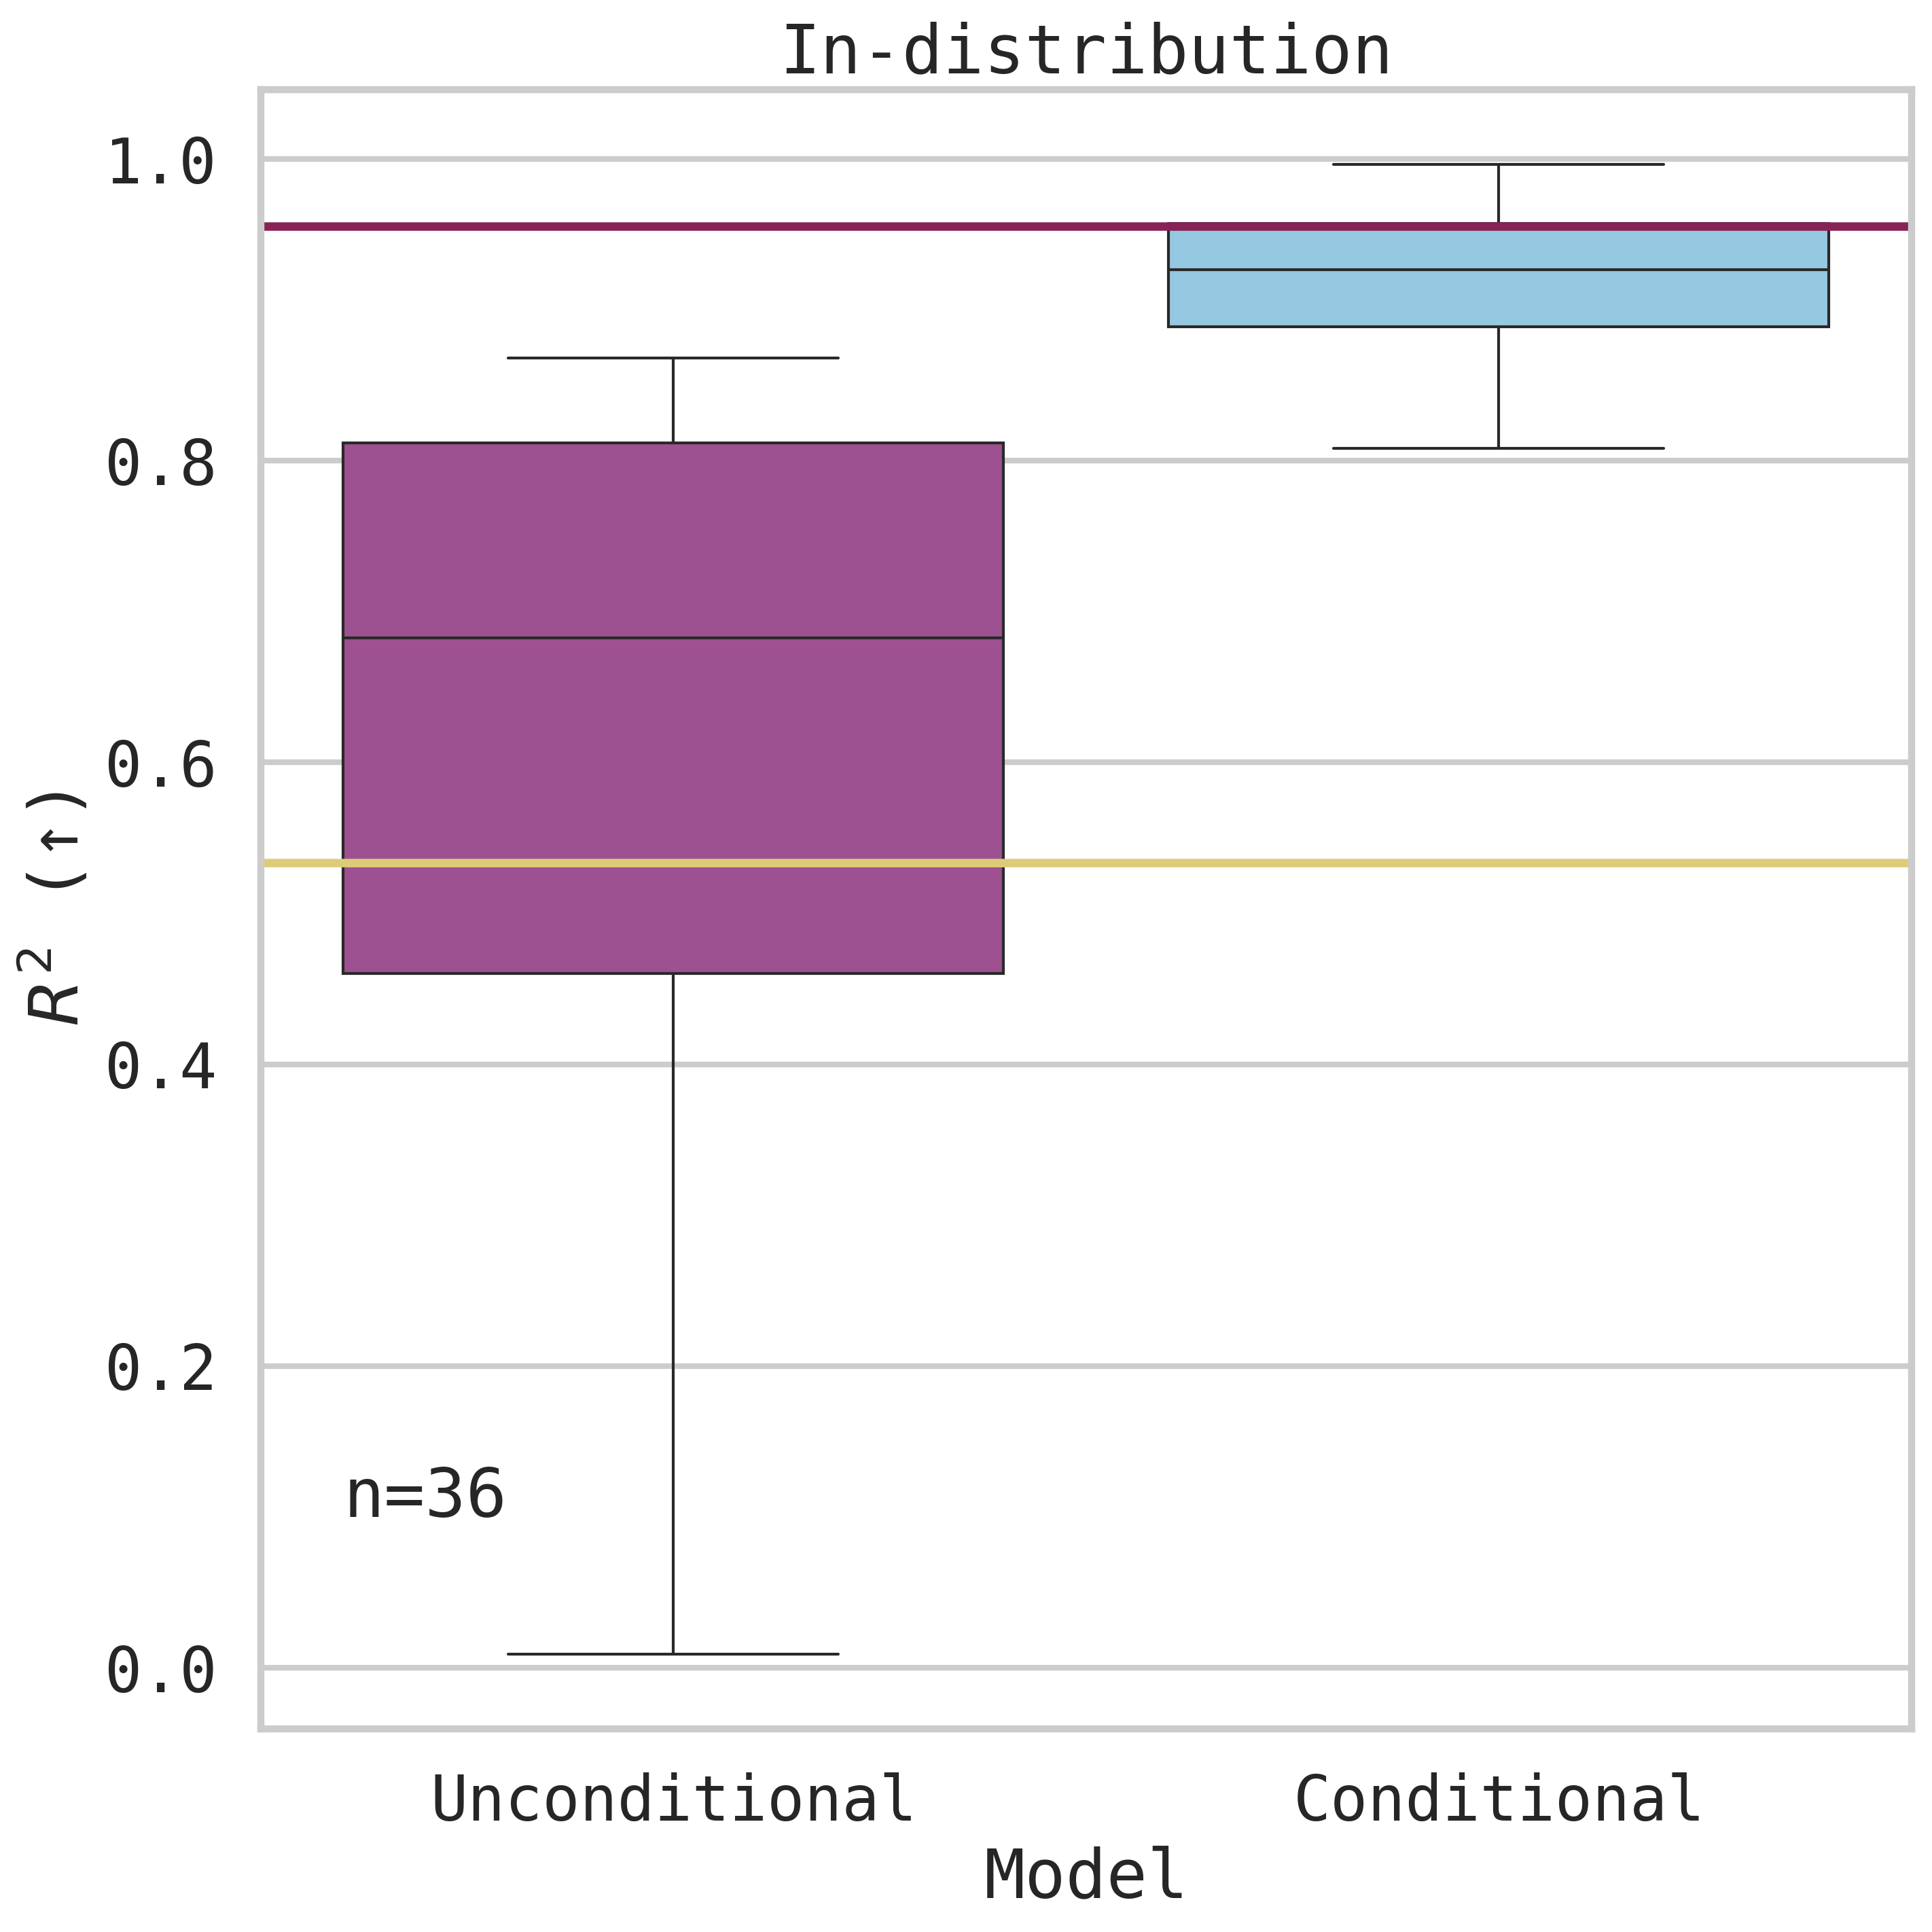

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_drugdose_res[all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-MoA (36 cond.)"])], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict,
           ax=ax)
plt.ylabel("$R^2$ (↑)")
plt.xlabel("Model")

plt.title("In-distribution")
ax.axhline(drug_monge["r2"].mean(),c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(drug_identity["r2"].mean(),c=ID_model_color_dict["Identity"], linewidth=3)

ax.set_xticklabels(["Unconditional", "Conditional"])

plt.legend("", frameon=False)
plt.text(x=-0.4, y=0.1 , s="n=36")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_drugdose_ID_summary_NoLegend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2617865111.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=all_drugdose_res[(all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-MoA (36 cond.)"]))& (all_drugdose_res["dose"]=="10000")],
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2617865111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Unconditional", "Conditional"])


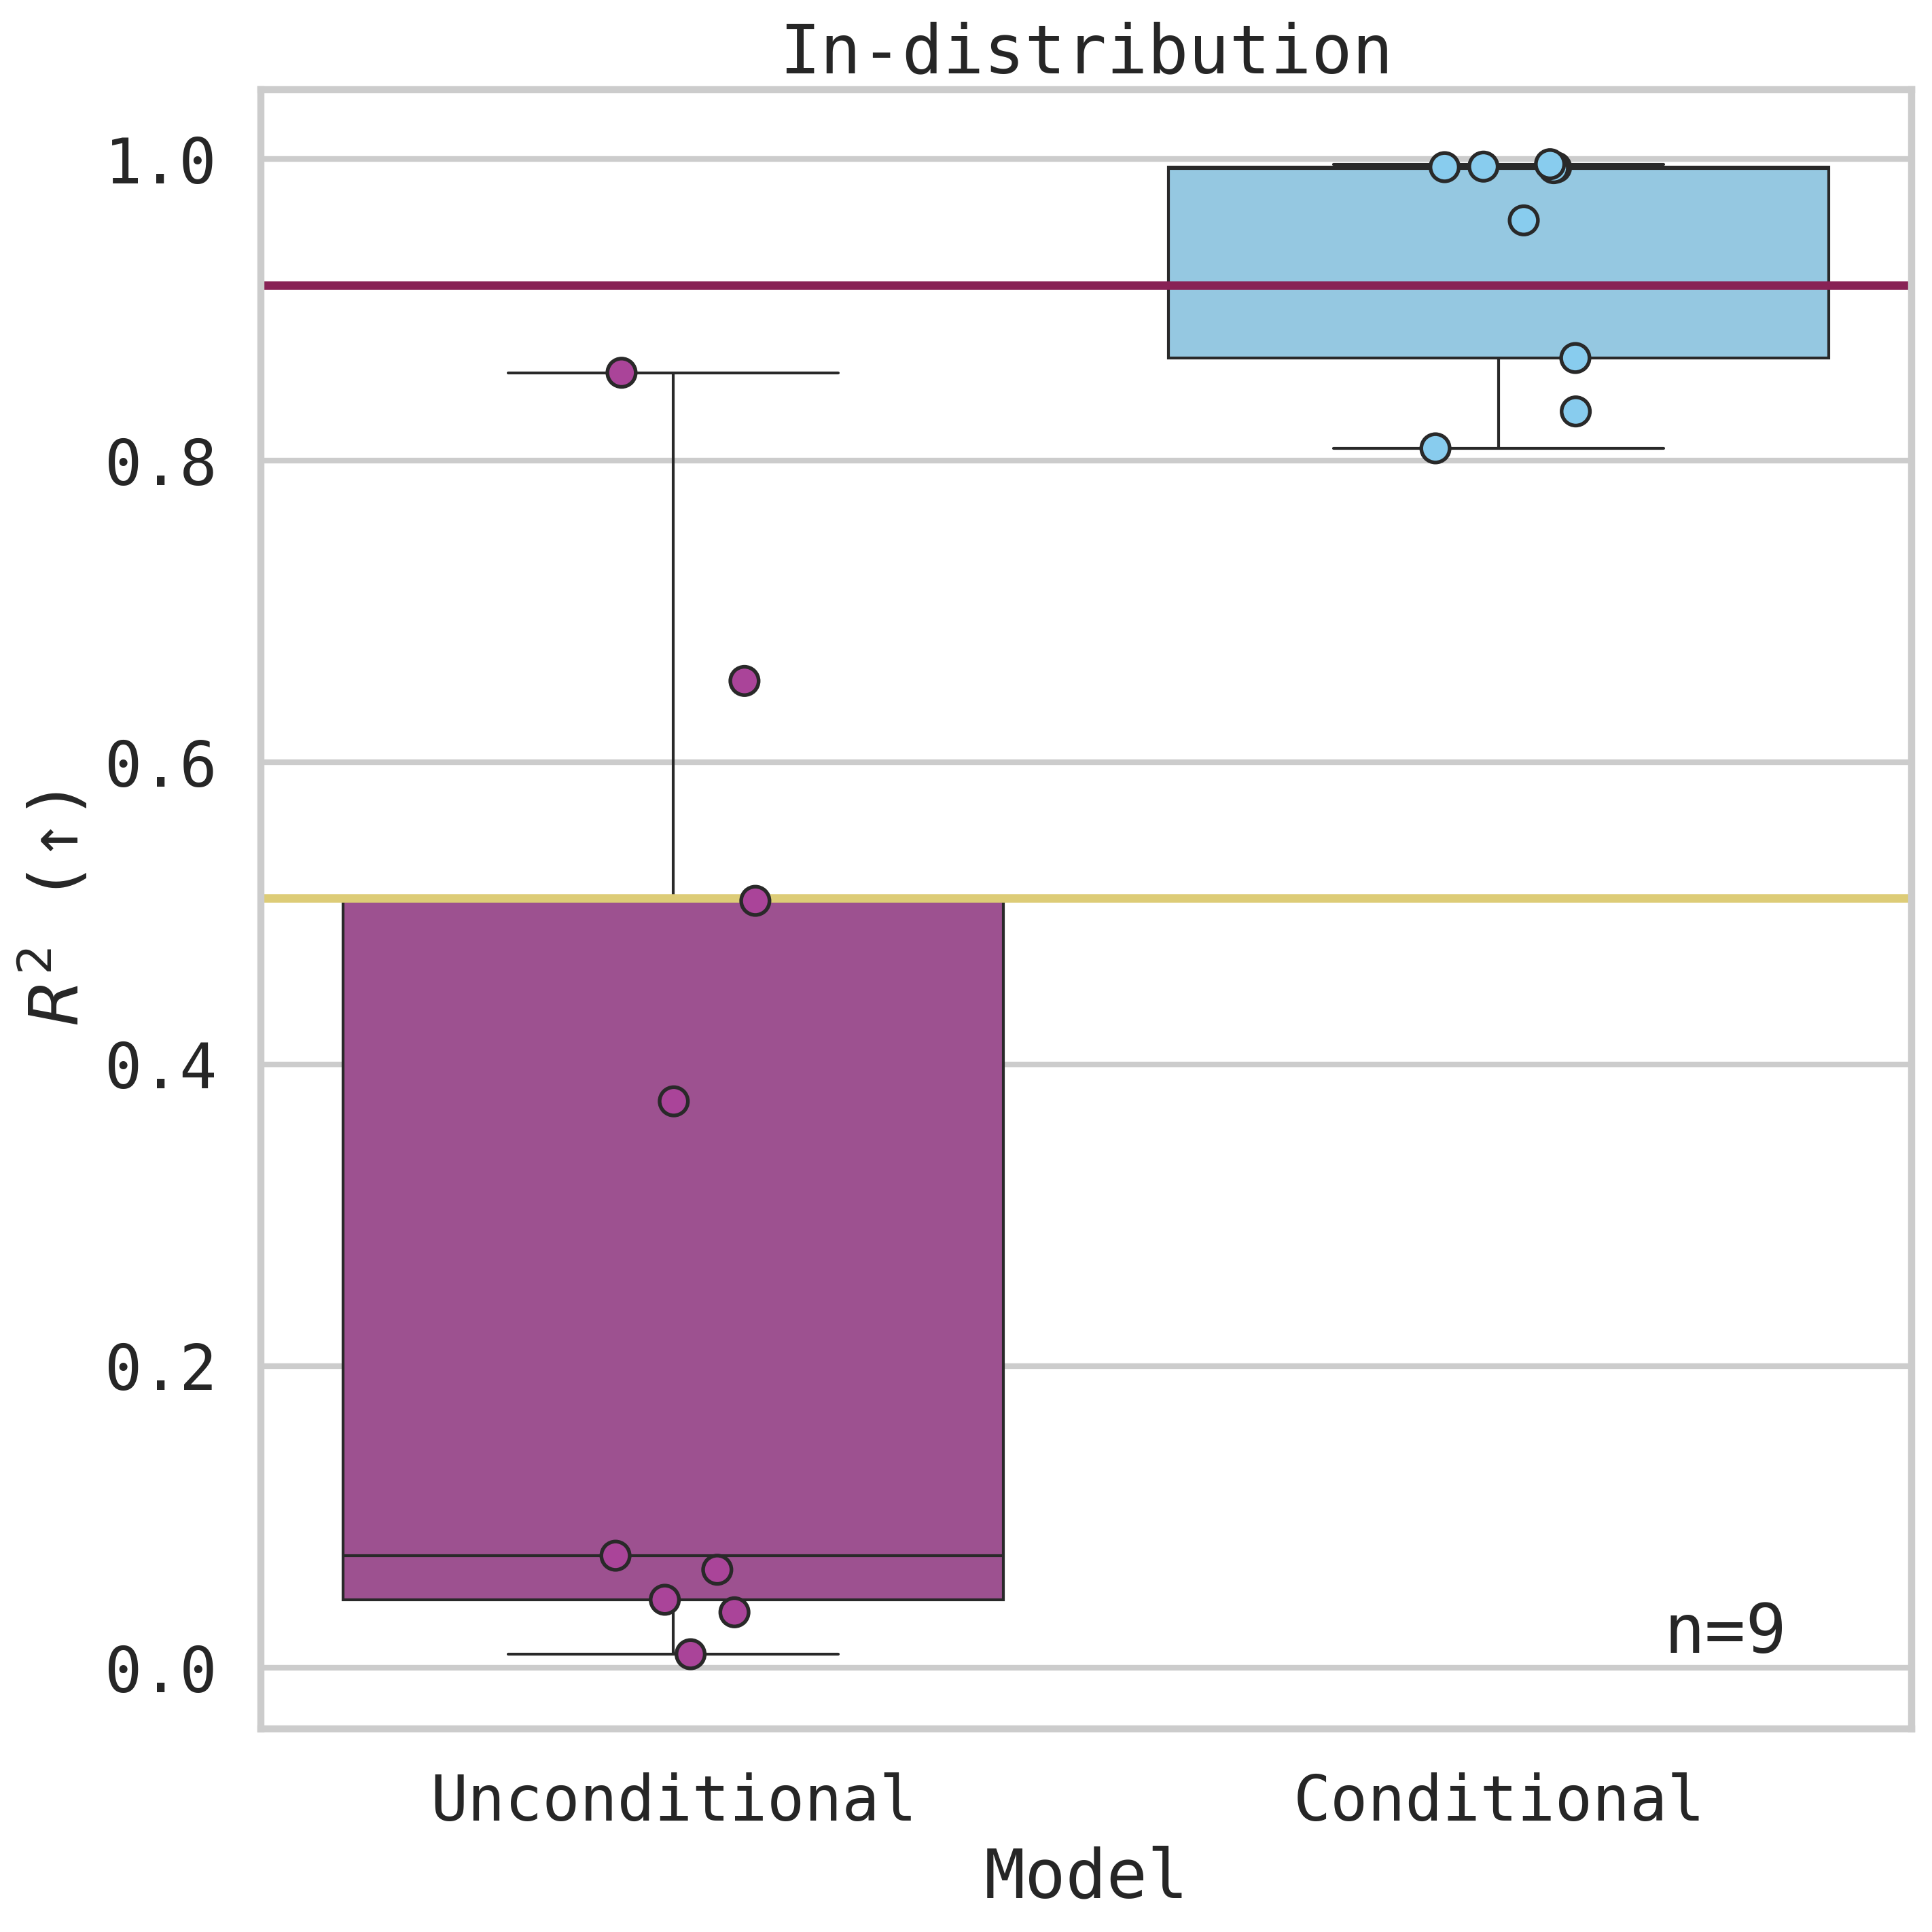

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_drugdose_res[(all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-MoA (36 cond.)"]))& (all_drugdose_res["dose"]=="10000")], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict,
           ax=ax)
sns.stripplot(data=all_drugdose_res[(all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-MoA (36 cond.)"]))& (all_drugdose_res["dose"]=="10000")], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict, edgecolor="gray", linewidth=1.3, legend=False, s=10,
           ax=ax)
plt.ylabel("$R^2$ (↑)")
plt.xlabel("Model")

plt.title("In-distribution")
ax.axhline(drug_monge["r2"].iloc[-1],c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(drug_identity["r2"].iloc[-1],c=ID_model_color_dict["Identity"], linewidth=3)

ax.set_xticklabels(["Unconditional", "Conditional"])

plt.legend("", frameon=False)
plt.text(x=1.2, y=0.01 , s="n=9")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_drugdose_ID_HighDose_NoLegend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2337086951.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Unconditional", "Conditional"])


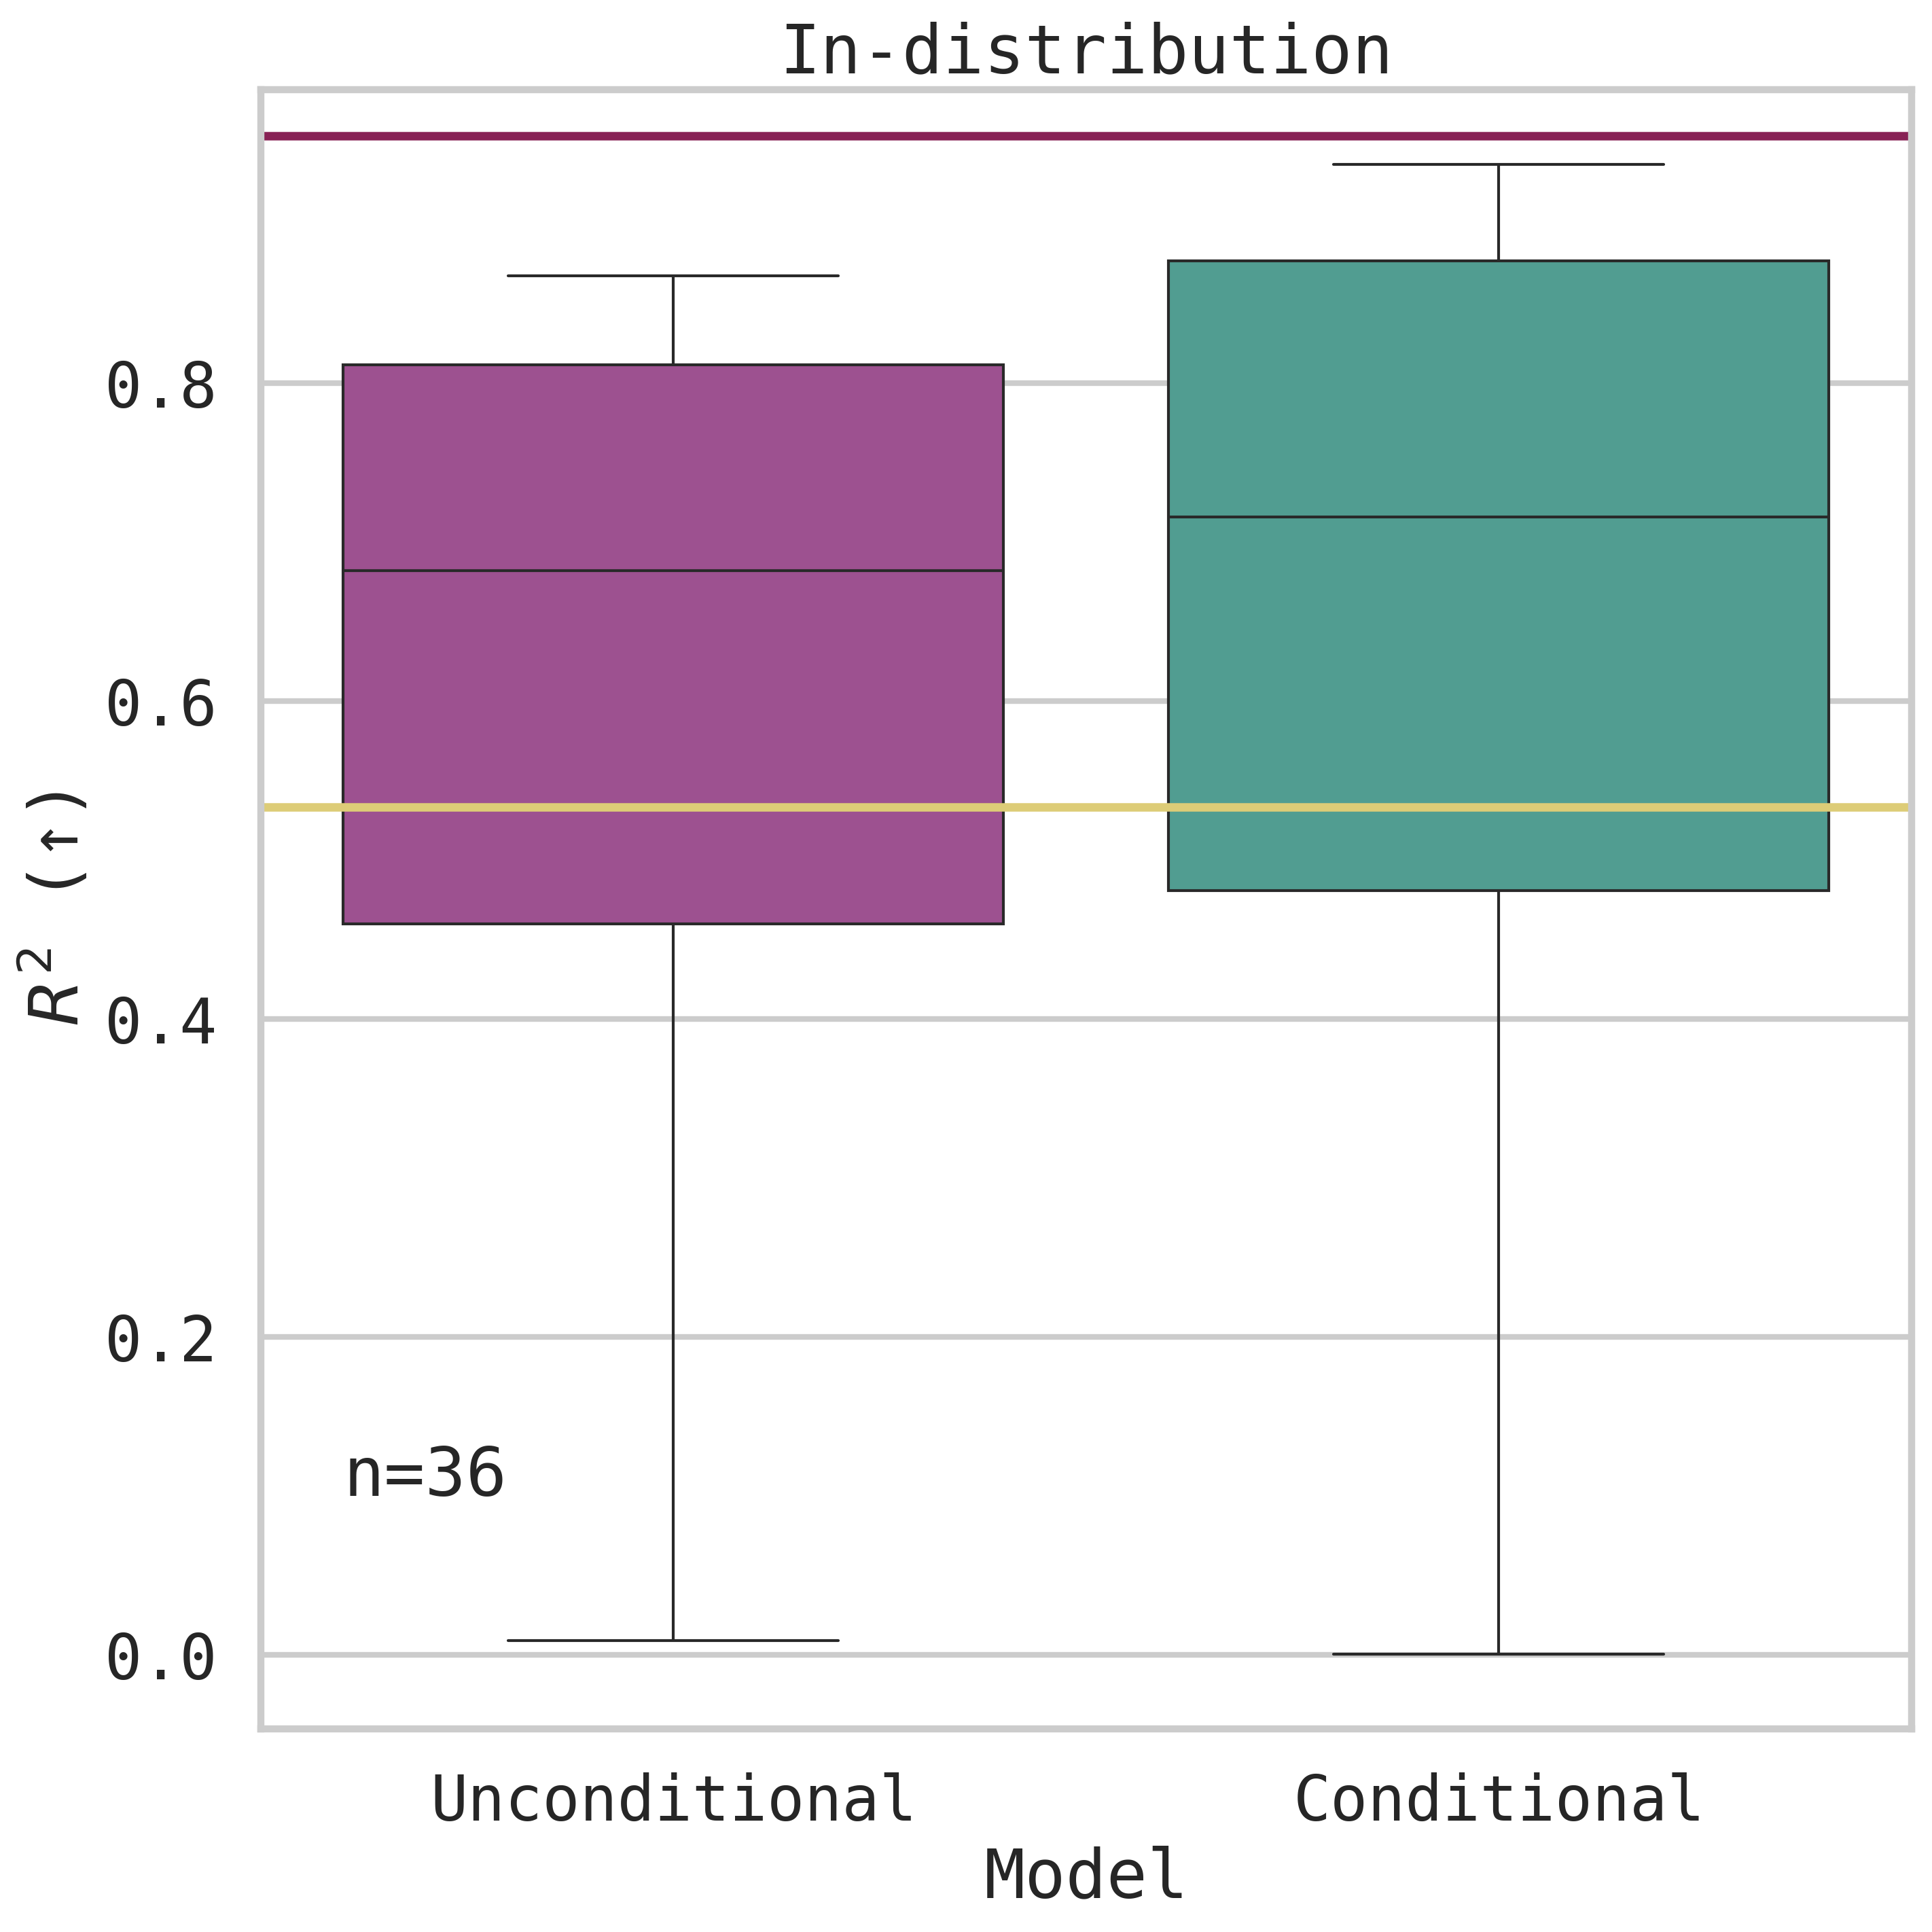

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_drugdose_res[all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-RDkit (36 cond.)"])], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict,
           ax=ax)
plt.ylabel("$R^2$ (↑)")
plt.xlabel("Model")

plt.title("In-distribution")
ax.axhline(drug_monge["r2"].mean(),c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(drug_identity["r2"].mean(),c=ID_model_color_dict["Identity"], linewidth=3)

ax.set_xticklabels(["Unconditional", "Conditional"])

plt.legend("", frameon=False)
plt.text(x=-0.4, y=0.1 , s="n=36")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_drugdose_ID_summary_RDkit_NoLegend.pdf", bbox_inches="tight")

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2670603647.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=all_drugdose_res[(all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-RDkit (36 cond.)"]))& (all_drugdose_res["dose"]=="10000")],
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2670603647.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Unconditional", "Conditional"])


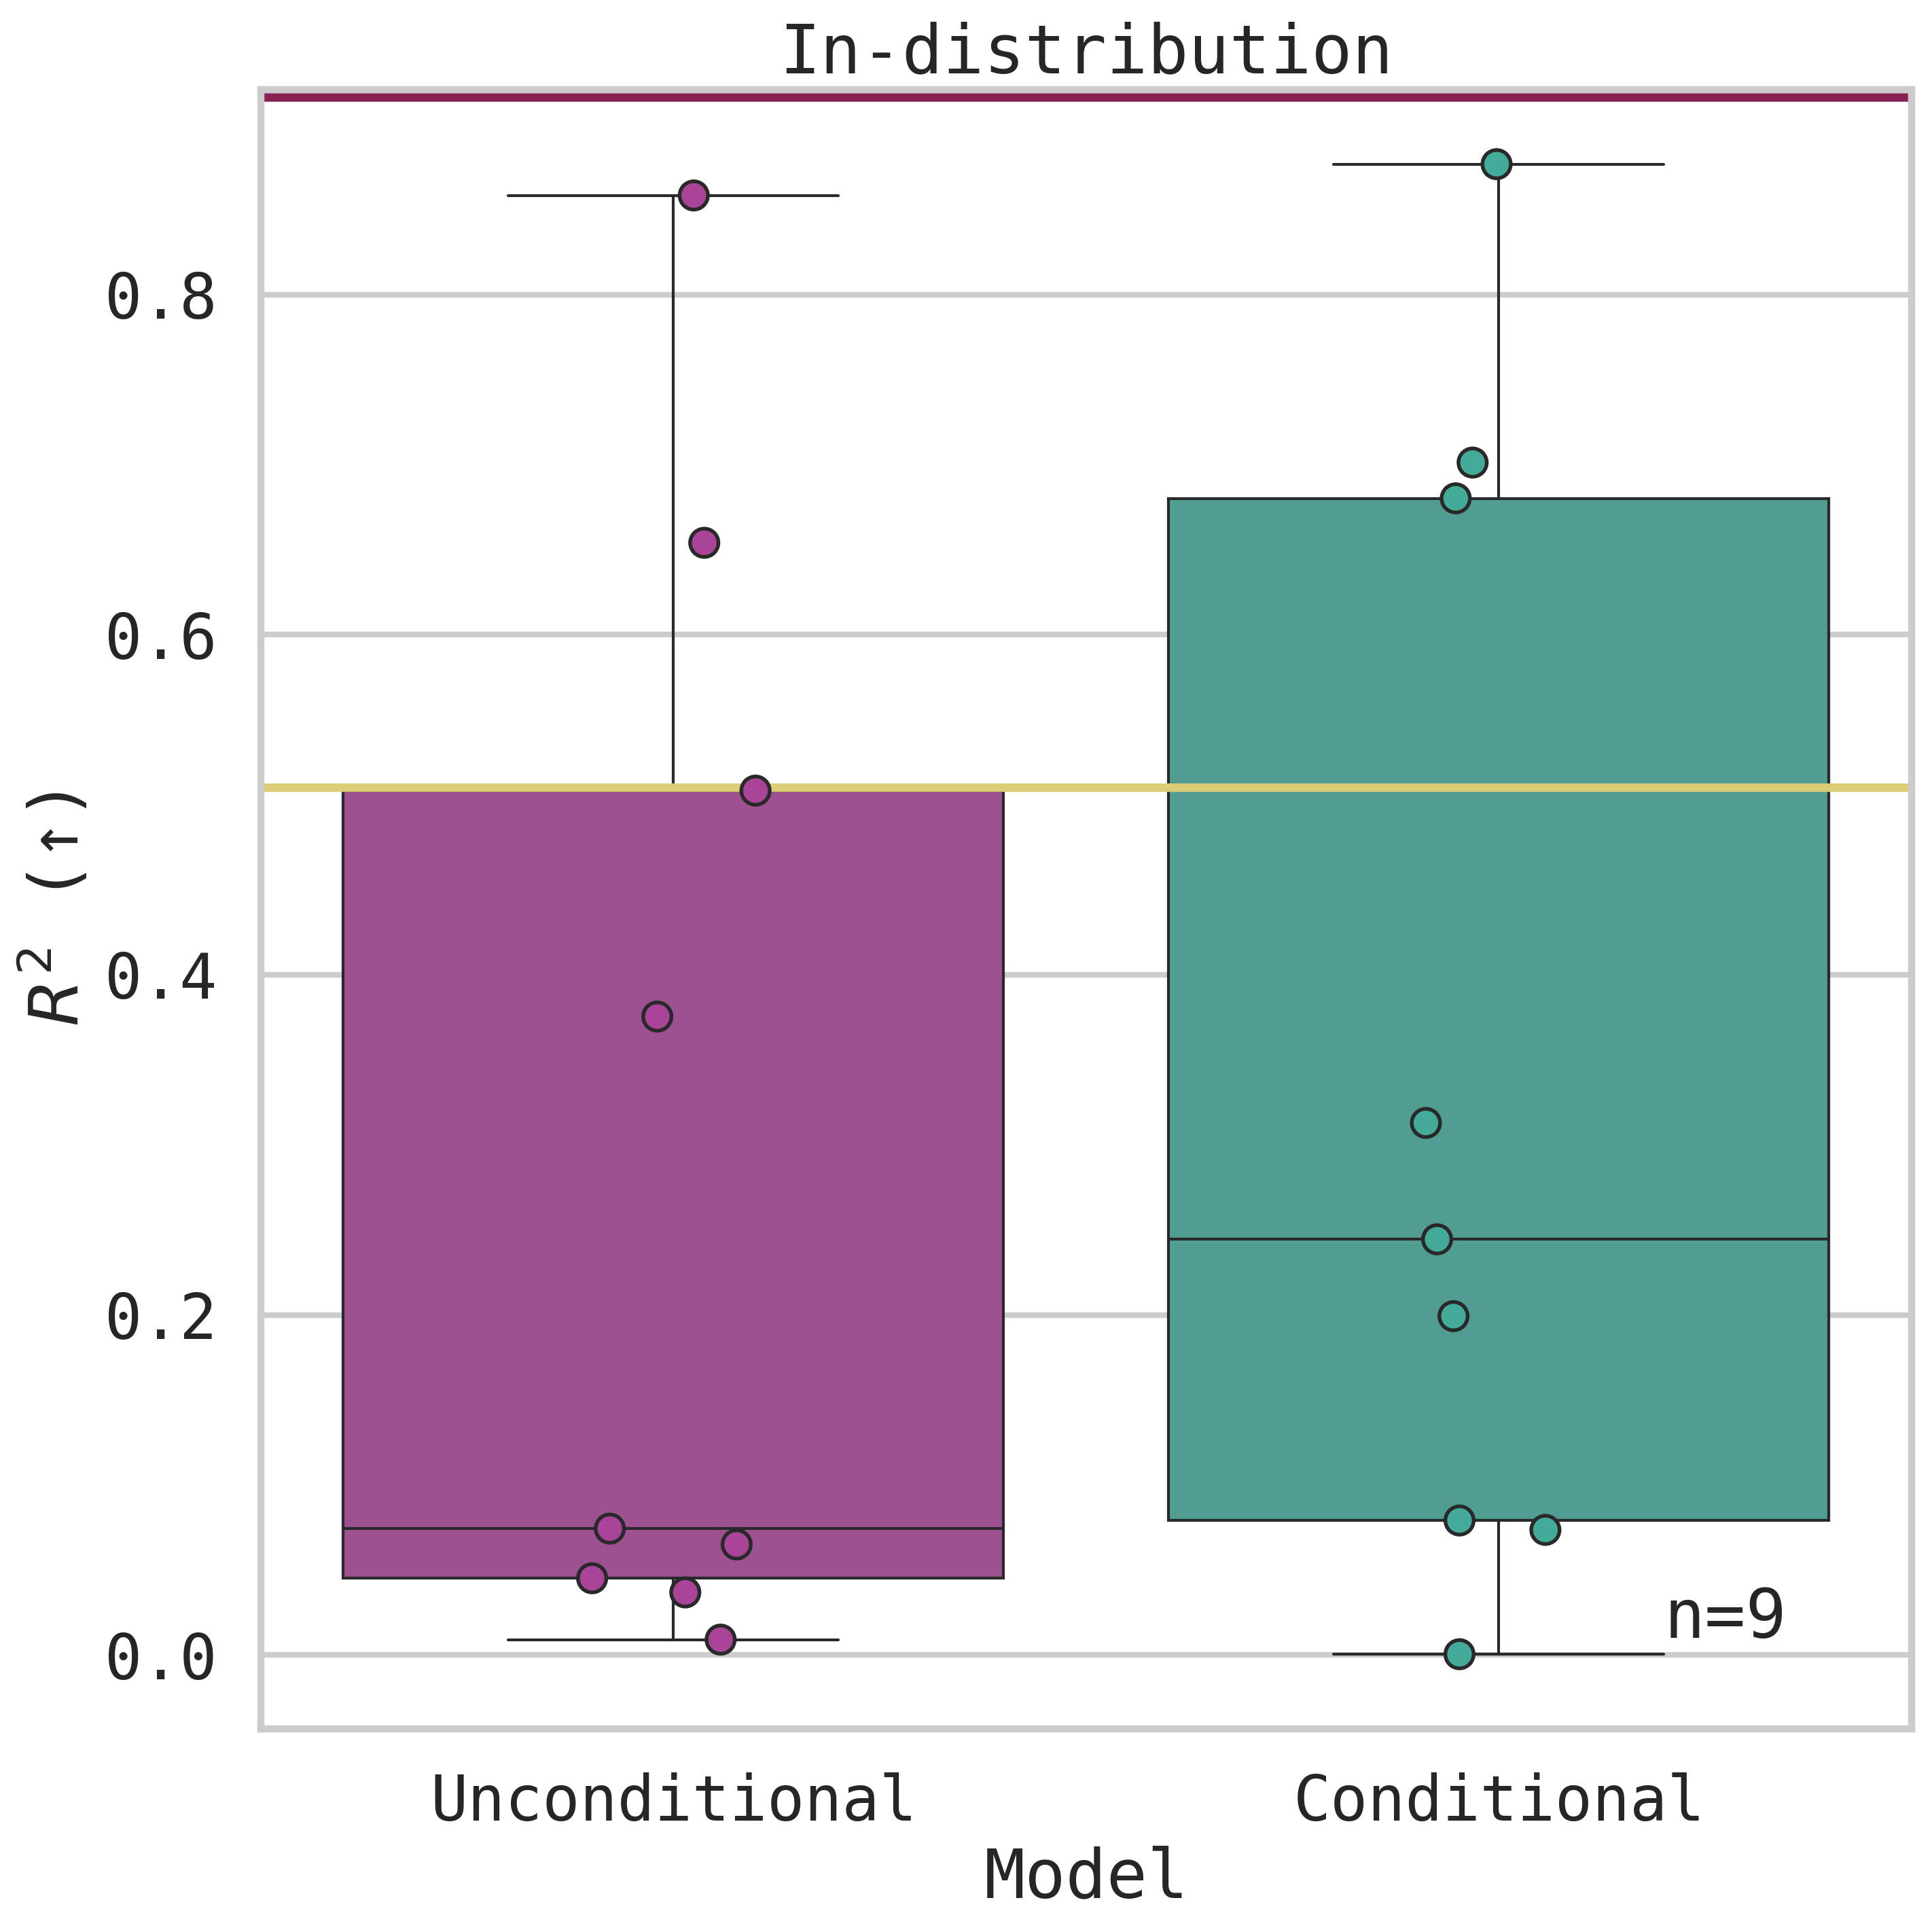

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=all_drugdose_res[(all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-RDkit (36 cond.)"]))& (all_drugdose_res["dose"]=="10000")], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict,
           ax=ax)
sns.stripplot(data=all_drugdose_res[(all_drugdose_res["model"].isin(["Monge-DrugDose (36 cond.)",  "CMonge-DrugDose-RDkit (36 cond.)"]))& (all_drugdose_res["dose"]=="10000")], 
            x="model", y="r2", hue="model", palette=ID_model_color_dict, edgecolor="gray", linewidth=1.3, legend=False, s=10,
           ax=ax)
plt.ylabel("$R^2$ (↑)")
plt.xlabel("Model")

ax.axhline(drug_monge["r2"].iloc[-1],c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3)
ax.axhline(drug_identity["r2"].iloc[-1],c=ID_model_color_dict["Identity"], linewidth=3)

plt.title("In-distribution")
ax.set_xticklabels(["Unconditional", "Conditional"])

plt.legend("", frameon=False)
plt.text(x=1.2, y=0.01 , s="n=9")
plt.tight_layout()
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_drugdose_ID_HighDose_RDkit_NoLegend.pdf", bbox_inches="tight")

# All in distribution results

In [34]:
all_ID_res = pd.concat([identity, monge_per_cond, monge_dose_id, monge_drugdose_id, cmonge_dose_id, cmonge_drugdose_id])
all_ID_res = all_ID_res.replace(rename_dict)

In [35]:
drugs = sorted(all_ID_res["drug"].unique())
drug_order = [d.capitalize() for d in drugs]
hue_order = ["Monge-Dose (4 cond.)", "Monge-DrugDose (36 cond.)", 
                   "CMonge-Dose (4 cond.)", "CMonge-DrugDose-RDkit (36 cond.)", "CMonge-DrugDose-MoA (36 cond.)"] 



/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2031644692.py:8: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(all_ID_res, x="drug", y="r2", hue="model", ax=ax, dodge=0.6,
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2031644692.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(drug_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/2031644692.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(drug_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Iden

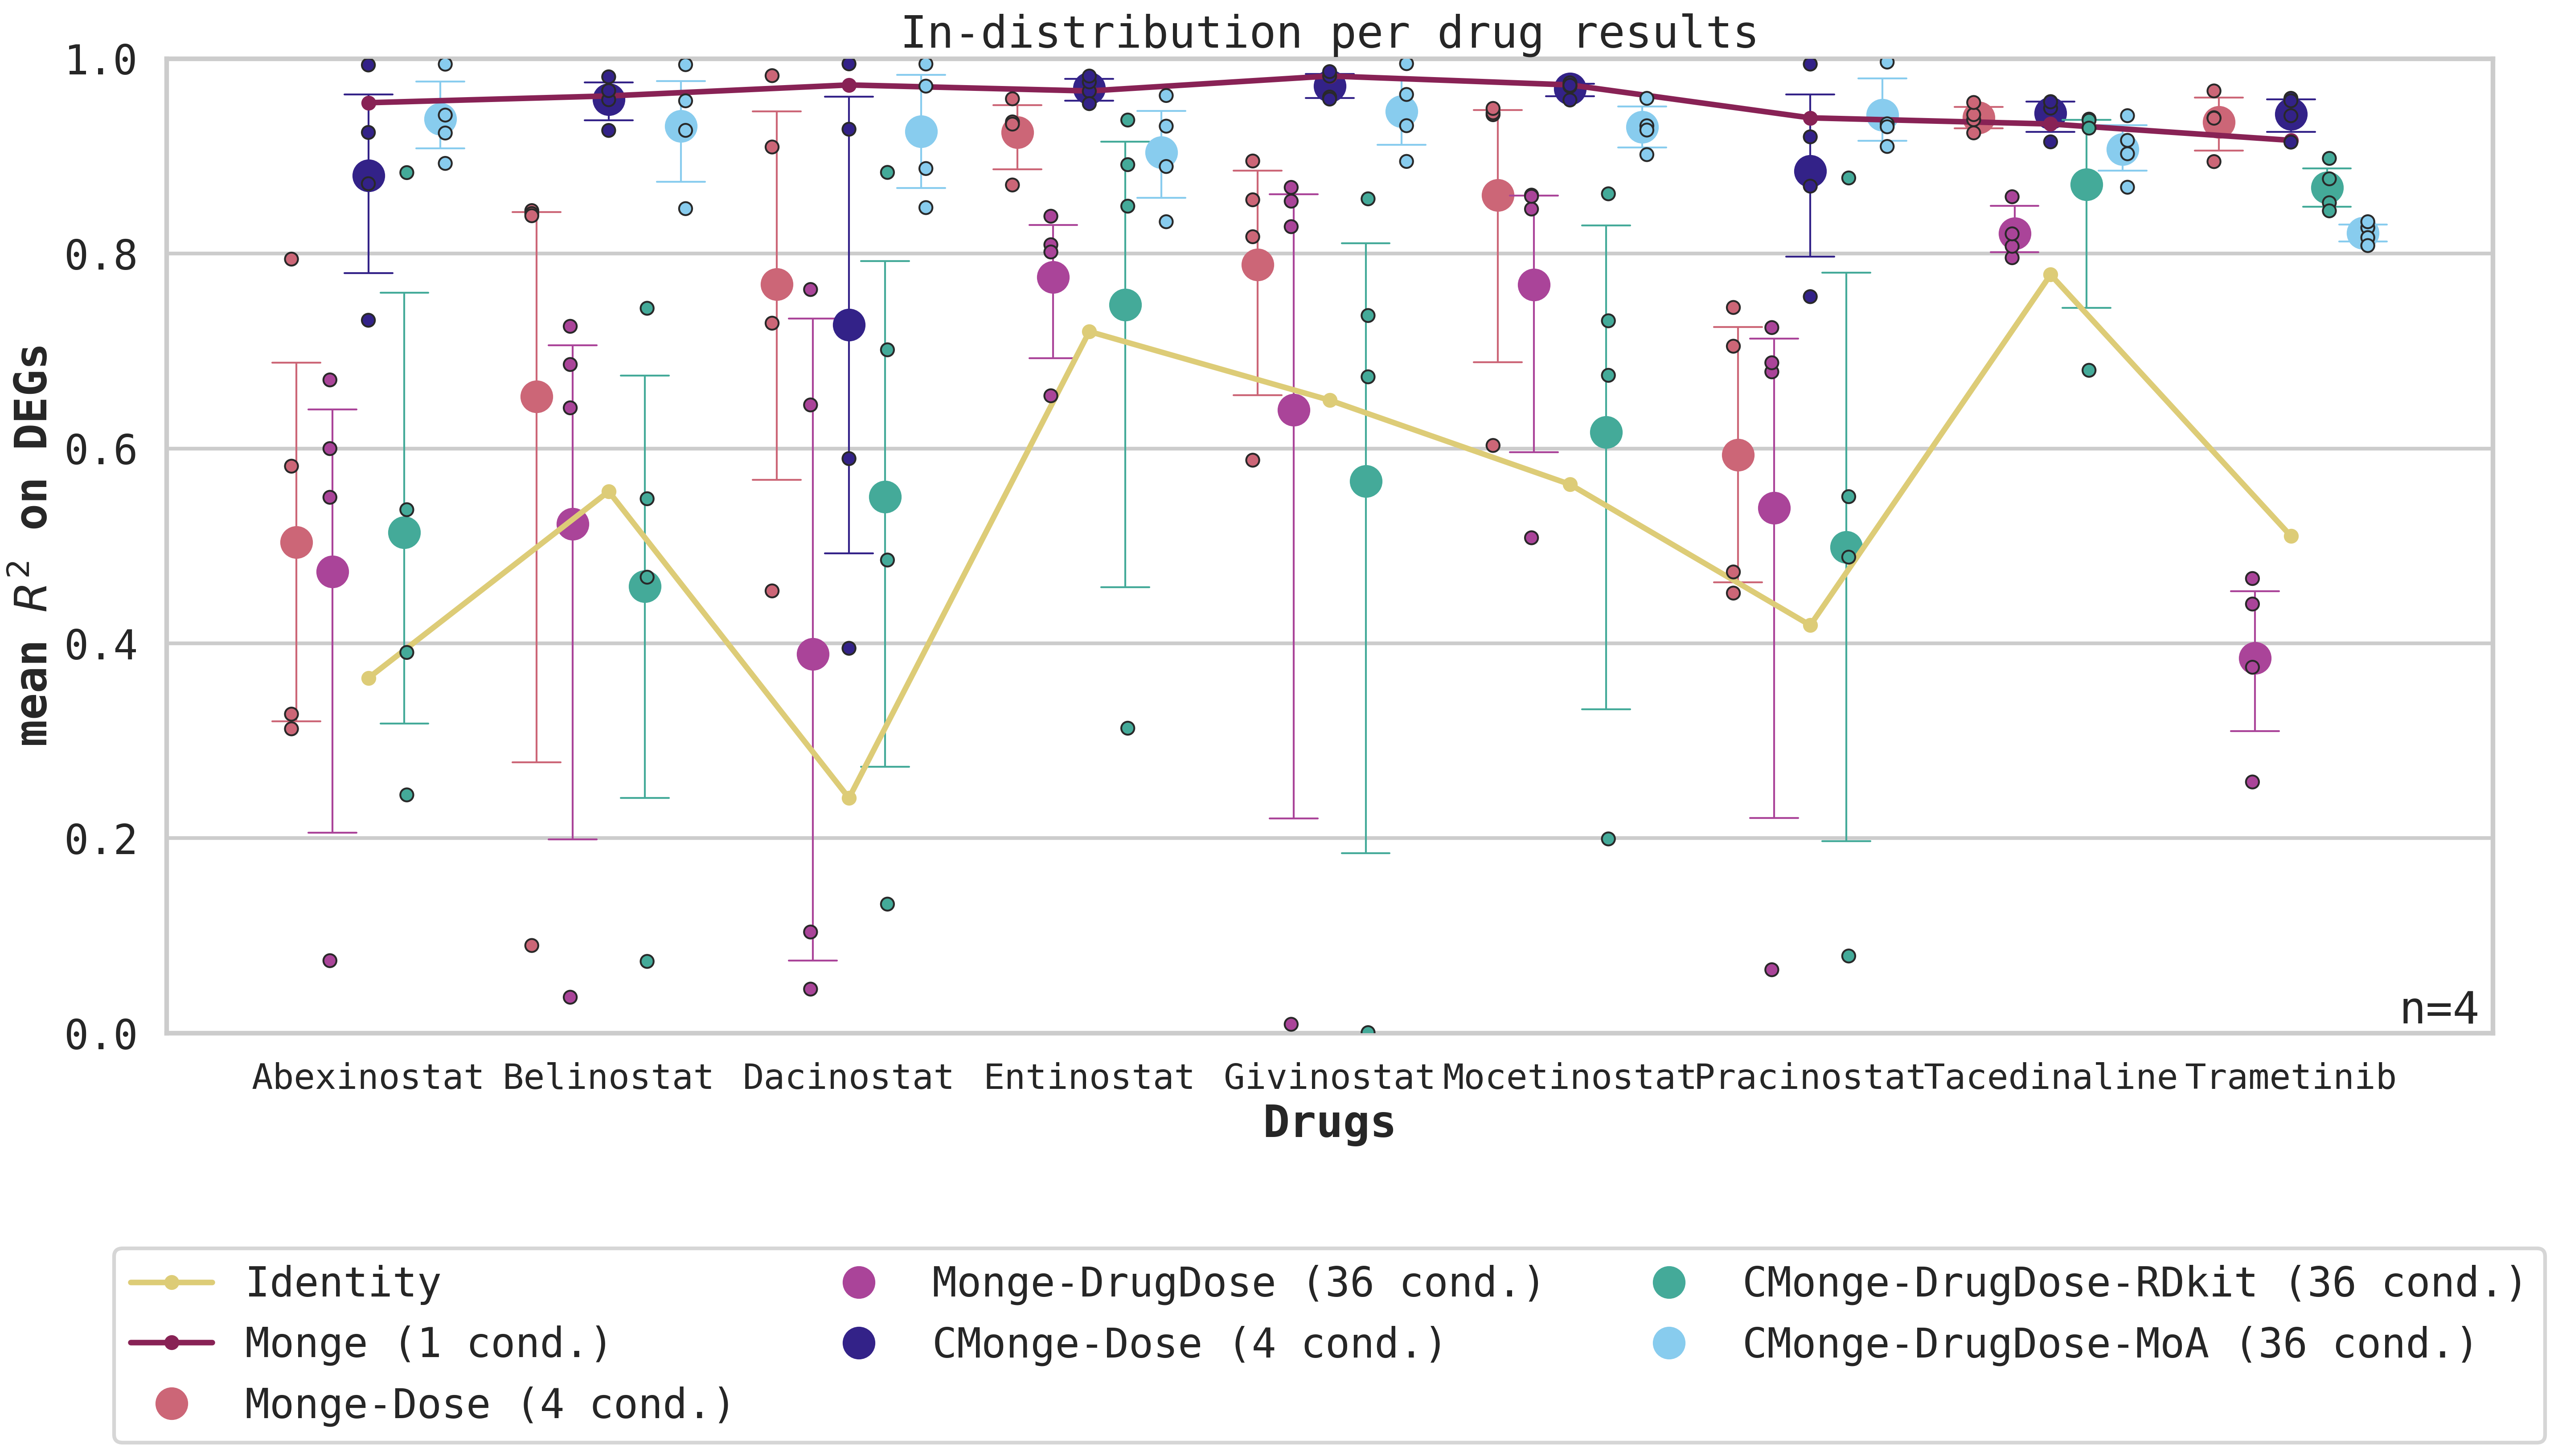

In [36]:
all_ID_res["drug"]=all_ID_res["drug"].apply(lambda x: x.capitalize())
f, ax = plt.subplots(1,1, figsize=(20, 9))
# ax.axhline(y=all_res.loc[all_res["model"]=="Monge (1 cond.)", "r2"].mean(), color=default_colors["wine"], label="Monge (1 cond.)")
# ax.axhline(y=all_res.loc[all_res["model"]=="Identity", "r2"].mean(), color=default_colors["sand"], label="Identity")
sns.pointplot(all_ID_res, x="drug", y="r2", hue="model", ax=ax, dodge=0.6, markers='o', capsize=0.2,
                  palette=ID_model_color_dict, linestyle='', err_kws={'linewidth': 1},
                 hue_order=hue_order, order=drug_order)
sns.stripplot(all_ID_res, x="drug", y="r2", hue="model", ax=ax, dodge=0.6,
                  palette=ID_model_color_dict, linewidth=1, edgecolor="gray", jitter=0, s=7, legend=False,
                 hue_order=hue_order, order=drug_order)
ax.plot(drug_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
ax.plot(drug_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")


ax.set(ylim=[0.0,1.0], ylabel="mean R2 on HVGs")
handles, labels = ax.get_legend_handles_labels()
order = [6,5, 0, 1, 2, 3, 4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncols=3, bbox_to_anchor=(0.5, -0.2), loc="upper center")
plt.xlabel("Drugs", weight="bold")
plt.ylabel("mean $R^2$ on DEGs", weight="bold")
plt.xticks(ax.get_xticks(), fontsize=19)
# plt.yticks(ax.get_yticks(), fontsize=14)
# plt.setp(ax.get_legend().get_title(),fontsize=14)
plt.text(x=8.45, y=0.01, s="n=4")
plt.title("In-distribution per drug results")

plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/ID_R2_pointplot.pdf", dpi=300, format='pdf', bbox_inches='tight')

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/4167313471.py:7: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(all_ID_res, x="drug", y="wasserstein", hue="model", ax=ax, dodge=0.6,
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/4167313471.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(drug_monge["wasserstein"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_57985/4167313471.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(drug_identity["wasserstein"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3

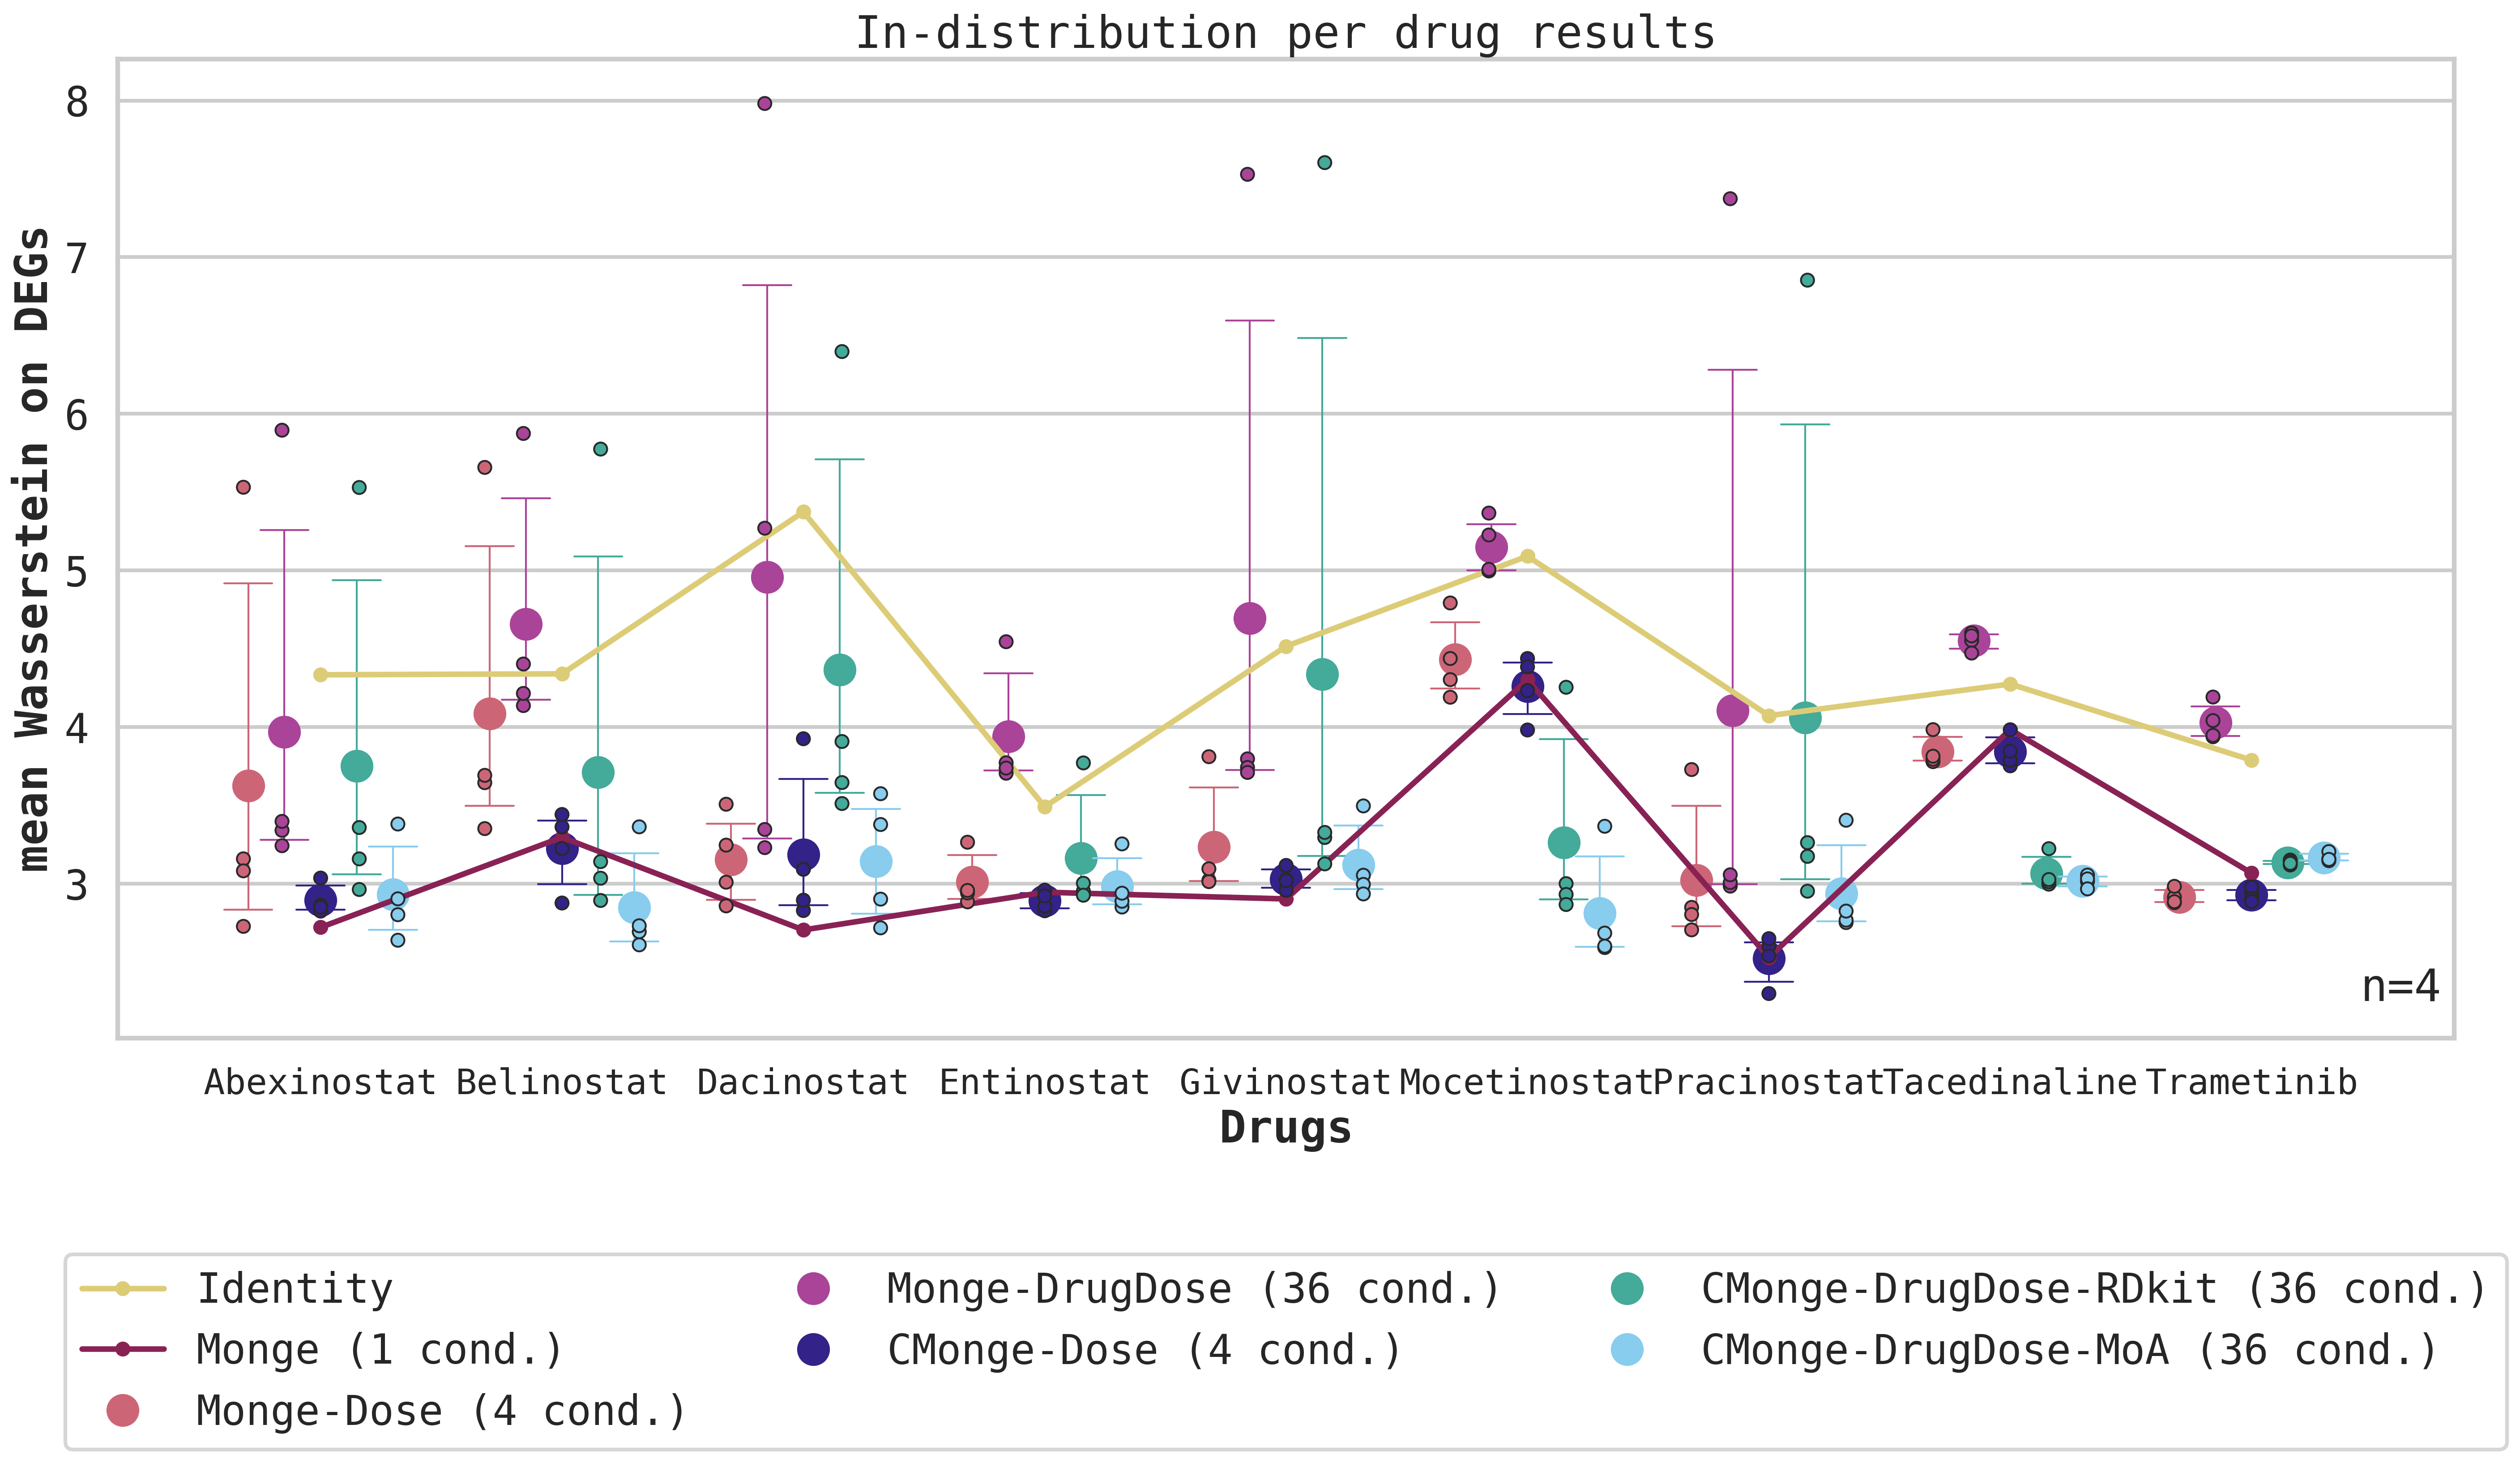

In [37]:
all_ID_res["drug"]=all_ID_res["drug"].apply(lambda x: x.capitalize())
f, ax = plt.subplots(1,1, figsize=(20, 9))

sns.pointplot(all_ID_res, x="drug", y="wasserstein", hue="model", ax=ax, dodge=0.6, markers='o', capsize=0.2,
                  palette=ID_model_color_dict, linestyle='', err_kws={'linewidth': 1},
                 hue_order=hue_order, order=drug_order)
sns.stripplot(all_ID_res, x="drug", y="wasserstein", hue="model", ax=ax, dodge=0.6,
                  palette=ID_model_color_dict, linewidth=1, edgecolor="gray", jitter=0, s=7, legend=False,
                 hue_order=hue_order, order=drug_order)
ax.plot(drug_monge["wasserstein"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
ax.plot(drug_identity["wasserstein"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")

ax.set(ylabel="mean Wasserstein on HVGs")
handles, labels = ax.get_legend_handles_labels()
order = [6,5, 0, 1, 2, 3, 4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncols=3, bbox_to_anchor=(0.5, -0.2), loc="upper center")
plt.xlabel("Drugs", weight="bold")
plt.ylabel("mean Wasserstein on DEGs", weight="bold")
plt.xticks(ax.get_xticks(), fontsize=19)
# plt.yticks(ax.get_yticks(), fontsize=14)
# plt.setp(ax.get_legend().get_title(),fontsize=14)
plt.text(x=8.45, y=2.25, s="n=4")
plt.title("In-distribution per drug results")

plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/ID_Wasserstein_pointplot.pdf", dpi=300, format='pdf', bbox_inches='tight')

In [38]:
all_ID_res

drug                             model  wasserstein       mmd  \
0    Abexinostat                          Identity     2.858245  0.016391   
1    Abexinostat                          Identity     2.816926  0.014116   
2    Abexinostat                          Identity     4.283113  0.066281   
3    Abexinostat                          Identity     7.376582  0.184430   
4     Belinostat                          Identity     3.574316  0.013262   
..           ...                               ...          ...       ...   
67    Givinostat  CMonge-DrugDose-RDkit (36 cond.)     7.603781  0.180806   
68  Mocetinostat  CMonge-DrugDose-RDkit (36 cond.)     4.254184  0.042312   
69   Pracinostat  CMonge-DrugDose-RDkit (36 cond.)     6.853311  0.157083   
70  Tacedinaline  CMonge-DrugDose-RDkit (36 cond.)     3.223572  0.016563   
71    Trametinib  CMonge-DrugDose-RDkit (36 cond.)     3.129821  0.011846   

          r2  drug signature  sinkhorn div           condition   dose  \
0   0.649924        1.022299      2.285513      abexinostat-10     10   
1   0.664775        0.995097      2.247000     abexinostat-100    100   
2   0.002521        2.699357      3.722621    abexinostat-1000   1000   
3   0.140207        6.293126      6.821927   abexinostat-10000  10000   
4   0.721358        1.307859      2.999984       belinostat-10     10   
..       ...             ...           ...                 ...    ...   
67  0.000461        6.388932      7.055902    givinostat-10000  10000   
68  0.199274        2.370381      3.717020  mocetinostat-10000  10000   
69  0.079104        5.728965      6.301847   pracinostat-10000  10000   
70  0.680212        1.016519      2.664369  tacedinaline-10000  10000   
71  0.876727        0.643266      2.578355    trametinib-10000  10000   

    monge_gap  drug_signature  
0         NaN             NaN  
1         NaN             NaN  
2         NaN             NaN  
3         NaN             NaN  
4         NaN             NaN  
..        ...             ...  
67        NaN             NaN  
68        NaN             NaN  
69        NaN             NaN  
70        NaN             NaN  
71        NaN             NaN  

[252 rows x 11 columns]

# Supplementary tables

In [39]:
all_ID_res.groupby(["model", "dose"]).mean(numeric_only=True)


wasserstein       mmd        r2  \
model                            dose                                     
CMonge-Dose (4 cond.)            10        3.210913  0.010768  0.882183   
                                 100       3.177645  0.010914  0.905404   
                                 1000      3.290161  0.014311  0.904628   
                                 10000     3.110522  0.014644  0.973575   
CMonge-DrugDose-MoA (36 cond.)   10        2.852905  0.009119  0.911949   
                                 100       2.846773  0.009327  0.912386   
                                 1000      2.952607  0.010712  0.901706   
                                 10000     3.329217  0.017023  0.938078   
CMonge-DrugDose-RDkit (36 cond.) 10        3.229418  0.018055  0.619147   
                                 100       3.143812  0.015652  0.689919   
                                 1000      3.057691  0.012738  0.868349   
                                 10000     5.170855  0.087736  0.351995   
Identity                         10        3.444333  0.015477  0.747923   
                                 100       3.511467  0.019241  0.654652   
                                 1000      4.102985  0.037202  0.503929   
                                 10000     6.399580  0.126280  0.227371   
Monge (1 cond.)                  10        3.120116  0.009188  0.950049   
                                 100       3.162022  0.010306  0.934544   
                                 1000      3.163832  0.009611  0.960062   
                                 10000     3.199606  0.011774  0.977804   
Monge-Dose (4 cond.)             10        3.326019  0.017391  0.749783   
                                 100       3.291208  0.017595  0.767009   
                                 1000      3.175312  0.012811  0.885312   
                                 10000     4.129059  0.057503  0.694453   
Monge-DrugDose (36 cond.)        10        3.941441  0.016186  0.698850   
                                 100       3.875630  0.016742  0.712006   
                                 1000      4.090394  0.022239  0.658741   
                                 10000     5.894295  0.090594  0.291836   

                                        drug signature  sinkhorn div  \
model                            dose                                  
CMonge-Dose (4 cond.)            10           0.579712      2.643932   
                                 100          0.538358      2.612928   
                                 1000         0.791686      2.729776   
                                 10000        0.605409      2.560539   
CMonge-DrugDose-MoA (36 cond.)   10           0.504925      2.286209   
                                 100          0.501082      2.282087   
                                 1000         0.554875      2.392218   
                                 10000        0.689397      2.779203   
CMonge-DrugDose-RDkit (36 cond.) 10           1.066058      2.662569   
                                 100          0.952335      2.579218   
                                 1000         0.731919      2.497191   
                                 10000        3.537837      4.620583   
Identity                         10           1.241682      2.877735   
                                 100          1.328271      2.947068   
                                 1000         2.019697      3.542781   
                                 10000        4.757465      5.849877   
Monge (1 cond.)                  10           0.464517      2.553289   
                                 100          0.516355      2.597246   
                                 1000         0.456714      2.603529   
                                 10000        0.496089      2.649582   
Monge-Dose (4 cond.)             10           0.974489      2.759152   
                                 100          0.969483      2.726319   
                                 1000         0.745341      2

In [40]:
all_ID_res.groupby(["model", "dose"]).std(numeric_only=True)

wasserstein       mmd        r2  \
model                            dose                                     
CMonge-Dose (4 cond.)            10        0.568445  0.004143  0.185430   
                                 100       0.585622  0.003873  0.123905   
                                 1000      0.563810  0.010231  0.092646   
                                 10000     0.544417  0.004303  0.026449   
CMonge-DrugDose-MoA (36 cond.)   10        0.193457  0.001457  0.039216   
                                 100       0.208957  0.001870  0.045565   
                                 1000      0.213463  0.002688  0.047917   
                                 10000     0.182440  0.004014  0.078620   
CMonge-DrugDose-RDkit (36 cond.) 10        0.291401  0.010742  0.268331   
                                 100       0.181773  0.006443  0.171701   
                                 1000      0.238777  0.005595  0.056116   
                                 10000     1.639560  0.063011  0.319576   
Identity                         10        0.810524  0.006498  0.126773   
                                 100       0.683066  0.013750  0.260844   
                                 1000      1.000085  0.035854  0.332334   
                                 10000     1.720494  0.081285  0.212036   
Monge (1 cond.)                  10        0.692866  0.002382  0.019993   
                                 100       0.709158  0.002975  0.041586   
                                 1000      0.603449  0.001996  0.024964   
                                 10000     0.465068  0.001812  0.028761   
Monge-Dose (4 cond.)             10        0.531936  0.009140  0.253768   
                                 100       0.511506  0.008404  0.231069   
                                 1000      0.516451  0.004876  0.098773   
                                 10000     0.981470  0.038487  0.271558   
Monge-DrugDose (36 cond.)        10        0.763767  0.004885  0.181282   
                                 100       0.632748  0.005584  0.131235   
                                 1000      0.727104  0.018716  0.254563   
                                 10000     1.442108  0.072794  0.318324   

                                        drug signature  sinkhorn div  \
model                            dose                                  
CMonge-Dose (4 cond.)            10           0.213178      0.567196   
                                 100          0.155758      0.582683   
                                 1000         0.564329      0.562580   
                                 10000        0.253374      0.545617   
CMonge-DrugDose-MoA (36 cond.)   10           0.098516      0.199391   
                                 100          0.132313      0.215360   
                                 1000         0.105697      0.219042   
                                 10000        0.231755      0.185791   
CMonge-DrugDose-RDkit (36 cond.) 10           0.533574      0.290322   
                                 100          0.337874      0.185573   
                                 1000         0.386134      0.243825   
                                 10000        2.121845      1.640757   
Identity                         10           0.556890      0.810761   
                                 100          0.469662      0.682887   
                                 1000         1.224094      1.001487   
                                 10000        2.268085      1.721515   
Monge (1 cond.)                  10           0.125662      0.692423   
                                 100          0.179064      0.706681   
                                 1000         0.084213      0.599739   
                                 10000        0.190036      0.465012   
Monge-Dose (4 cond.)             10           0.412417      0.528827   
                                 100          0.349335      0.507916   
                                 1000         0.283120      0

# Large DrugDose ID results

## CMonge Large ID

In [41]:
all_mean_metrics = []

embedding = "moa"
nsteps = "500K"

for embedding in ["moa", "rdkit"]:
    for model_size in ["big"]: #, ""]:
        print(embedding, model_size)
        with open(f"/Users/alicedriessen/Box/otperturb/alice_exp/sciplex_all_drugs/{model_size}/{embedding}/{nsteps}/results.yaml") as stream:
            logs = yaml.safe_load(stream)
        
        mean_stats = {k: v["mean_statistics"] for k, v in logs["experiments"][0]["valid-set"].items()}
        mean_stats = pd.DataFrame(mean_stats).T
        if embedding=="moa":
            mean_stats["model"] = "CMonge-DrugDose-MoA (748 cond.)"
        elif embedding=="rdkit":
            mean_stats["model"] = "CMonge-DrugDose-RDkit (748 cond.)"
        mean_stats["embedding"] = embedding
        mean_stats["nsteps"] = nsteps
        mean_stats["model_size"] = model_size
        all_mean_metrics.append(mean_stats)


big_drugdose_res = pd.concat(all_mean_metrics)
big_drugdose_res[["drug", "dose"]] = [i.split("-") for i in big_drugdose_res.index]
big_drugdose_res

moa big
rdkit big


mean_wasserstein  mean_mmd  mean_sinkhorn div  \
wp1066-10                 3.553734  0.009429           2.987598   
wp1066-100                3.666518  0.010856           3.102977   
wp1066-1000               3.745508  0.012503           3.184366   
wp1066-10000              3.628517  0.010546           3.065199   
gandotinib-10             3.462425  0.010382           2.899084   
...                            ...       ...                ...   
trametinib-10000          3.440639  0.011238           2.889566   
nilotinib-10              3.488622  0.009399           2.929206   
nilotinib-100             3.688258  0.011834           3.133114   
nilotinib-1000            3.824548  0.010673           3.271425   
nilotinib-10000           3.819234  0.011911           3.265013   

                  mean_monge_gap  mean_drug_signature   mean_r2  \
wp1066-10              13.784948             0.502314  0.924019   
wp1066-100             13.891613             0.461493  0.939352   
wp1066-1000            13.816613             0.702406  0.882457   
wp1066-10000           13.873797             0.479225  0.942542   
gandotinib-10          13.616082             0.510778  0.913666   
...                          ...                  ...       ...   
trametinib-10000       13.559762             0.665042  0.890964   
nilotinib-10           13.808434             0.492354  0.910145   
nilotinib-100          13.875558             0.518853  0.909549   
nilotinib-1000         13.947378             0.508378  0.924976   
nilotinib-10000        13.706115             0.832843  0.892351   

                                              model embedding nsteps  \
wp1066-10           CMonge-DrugDose-MoA (748 cond.)       moa   500K   
wp1066-100          CMonge-DrugDose-MoA (748 cond.)       moa   500K   
wp1066-1000         CMonge-DrugDose-MoA (748 cond.)       moa   500K   
wp1066-10000        CMonge-DrugDose-MoA (748 cond.)       moa   500K   
gandotinib-10       CMonge-DrugDose-MoA (748 cond.)       moa   500K   
...                                             ...       ...    ...   
trametinib-10000  CMonge-DrugDose-RDkit (748 cond.)     rdkit   500K   
nilotinib-10      CMonge-DrugDose-RDkit (748 cond.)     rdkit   500K   
nilotinib-100     CMonge-DrugDose-RDkit (748 cond.)     rdkit   500K   
nilotinib-1000    CMonge-DrugDose-RDkit (748 cond.)     rdkit   500K   
nilotinib-10000   CMonge-DrugDose-RDkit (748 cond.)     rdkit   500K   

                 model_size        drug   dose  
wp1066-10               big      wp1066     10  
wp1066-100              big      wp1066    100  
wp1066-1000             big      wp1066   1000  
wp1066-10000            big      wp1066  10000  
gandotinib-10           big  gandotinib     10  
...                     ...         ...    ...  
trametinib-10000        big  trametinib  10000  
nilotinib-10            big   nilotinib     10  
nilotinib-100           big   nilotinib    100  
nilotinib-1000          big   nilotinib   1000  
nilotinib-10000         big   nilotinib  10000  

[1496 rows x 12 columns]

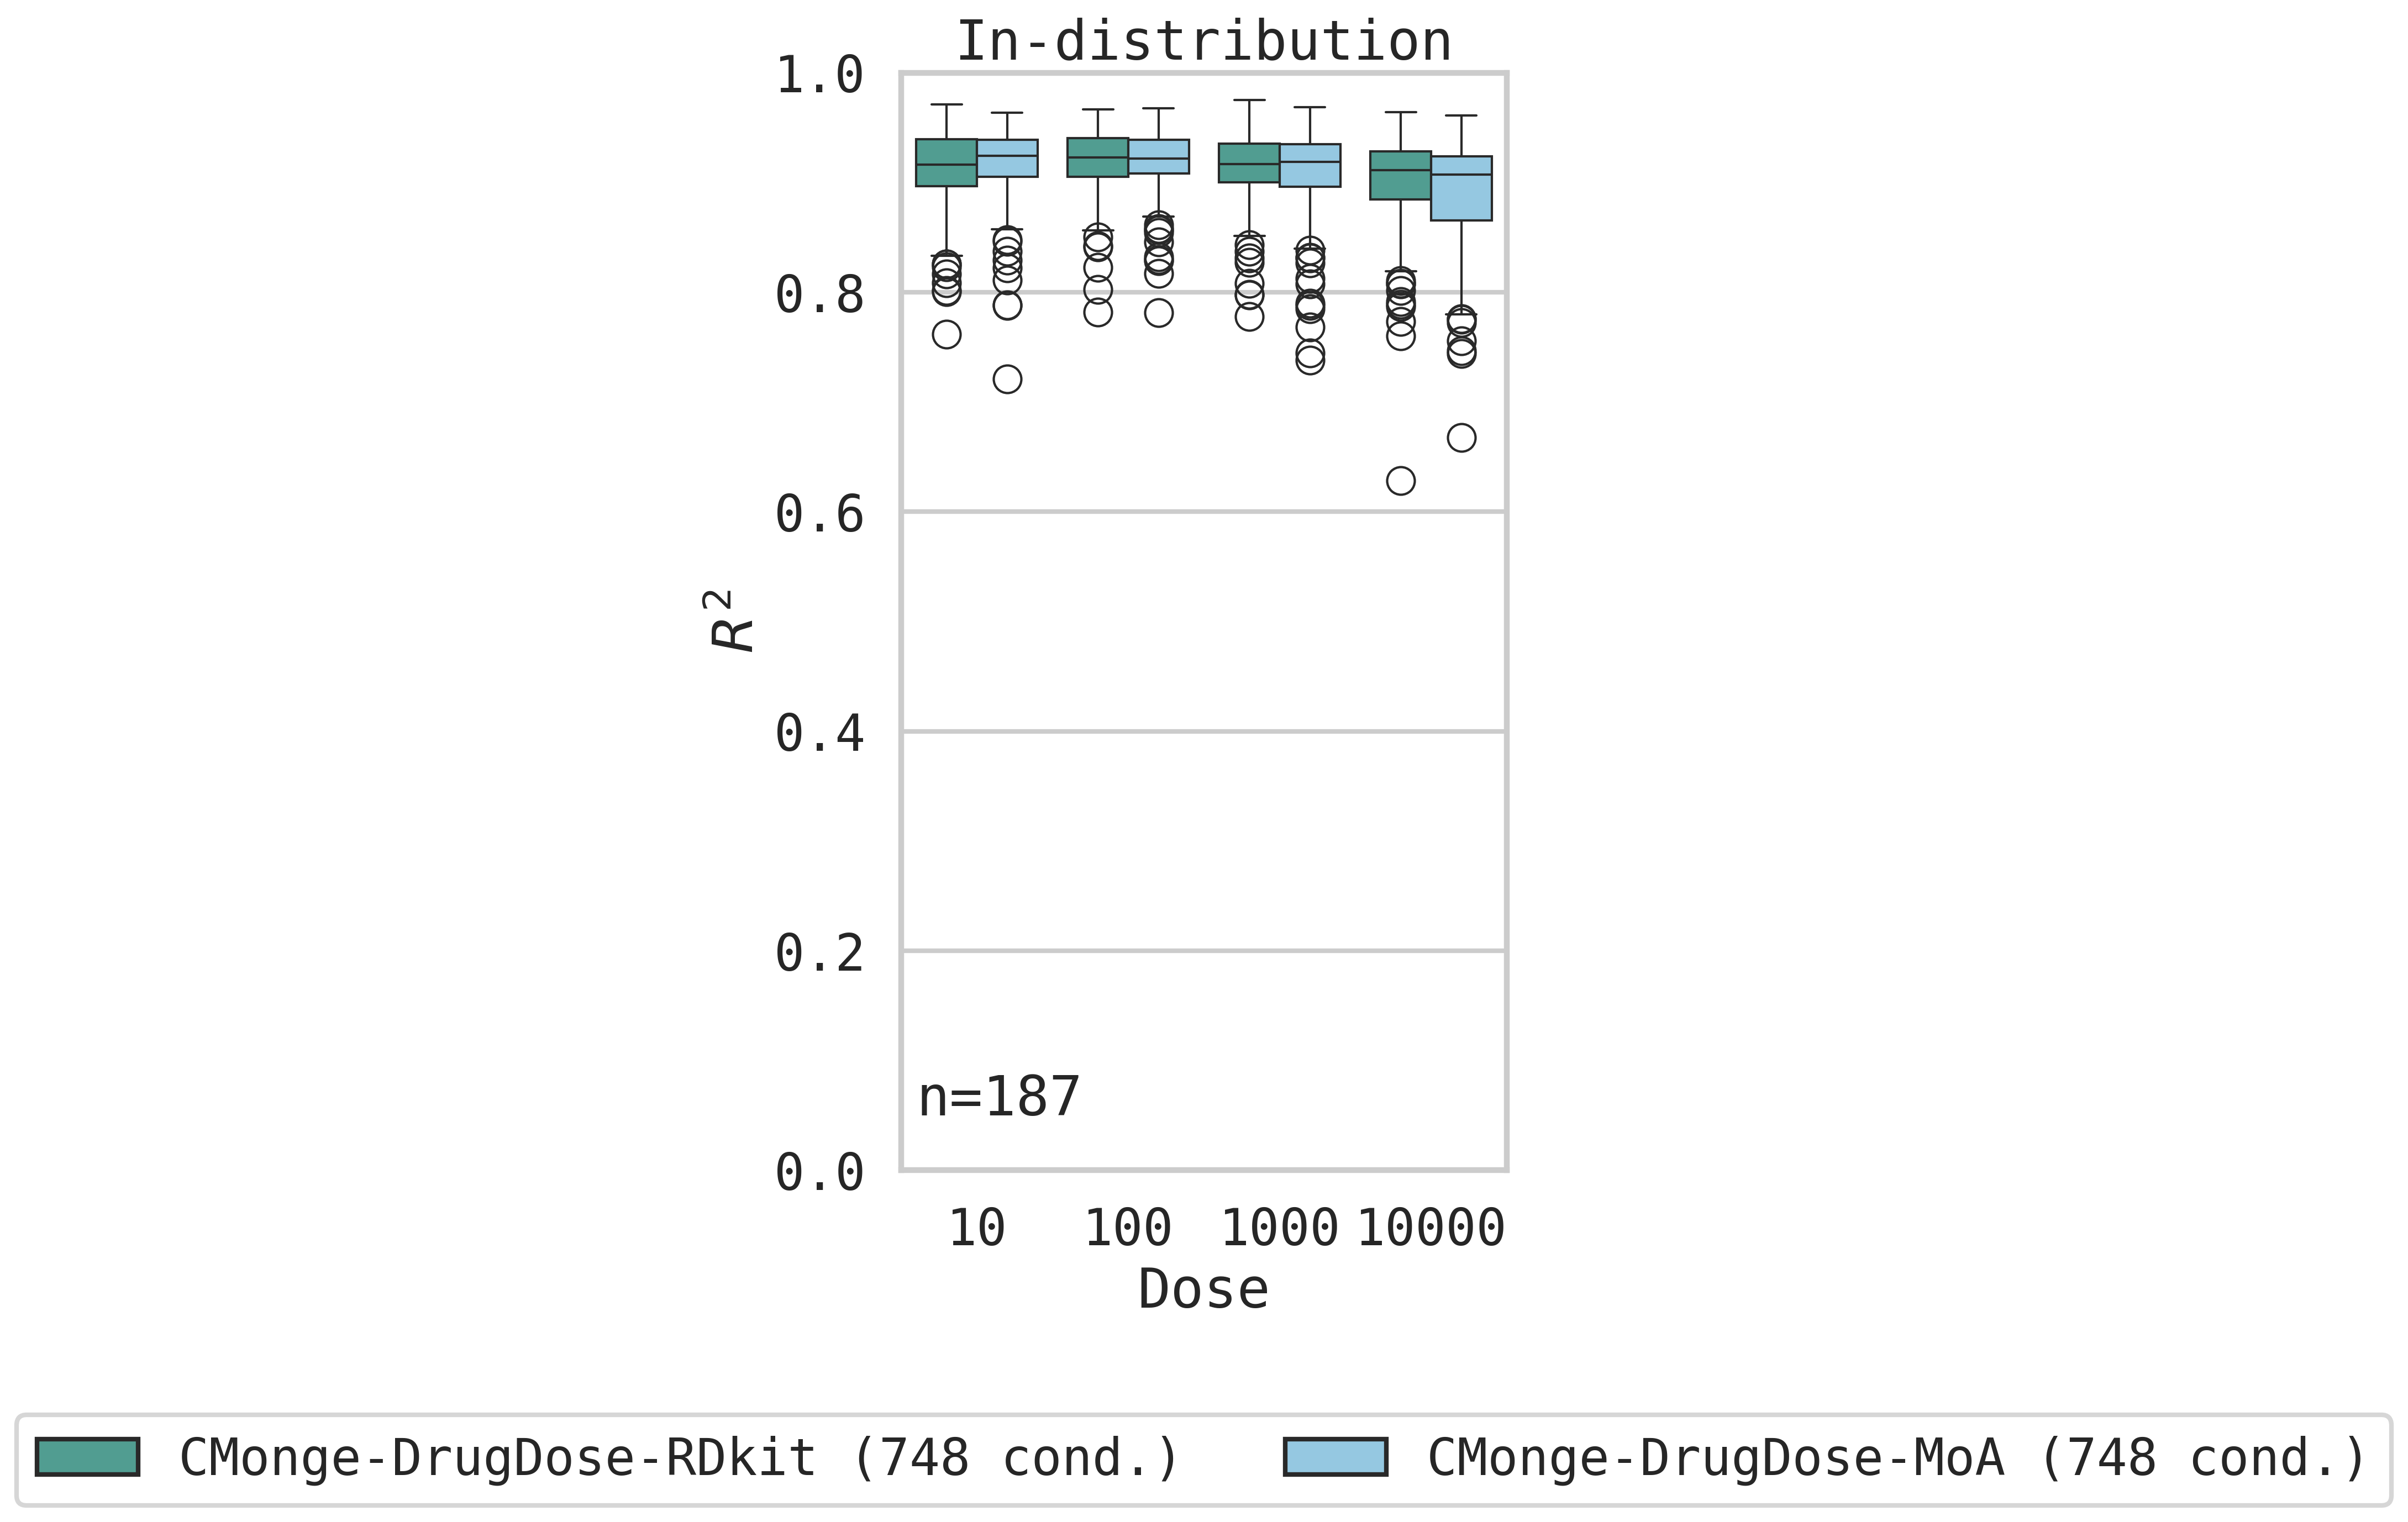

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=big_drugdose_res, x="dose", y="mean_r2", hue="model", palette=ID_model_color_dict,
           hue_order=["CMonge-DrugDose-RDkit (748 cond.)", "CMonge-DrugDose-MoA (748 cond.)"],
           ax=ax)

# ax.plot(dose_monge["r2"],'r-o',c=ID_model_color_dict["Monge (1 cond.)"], linewidth=3, markersize=7, label="Monge (1 cond.)")
# ax.plot(dose_identity["r2"],'r-o',c=ID_model_color_dict["Identity"], linewidth=3, markersize=7, label="Identity")

plt.title("In-distribution")
plt.ylabel("$R^2$")
plt.xlabel("Dose")
plt.ylim((0,1))

# handles, labels = ax.get_legend_handles_labels()
# order = [4,3, 0, 1, 2]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="", ncols=2, bbox_to_anchor=(0.5, -0.2), loc="upper center")
plt.legend(title="", ncols=2, bbox_to_anchor=(0.5, -0.2), loc="upper center")

plt.tight_layout()
plt.text(x=-0.4, y=0.05 , s="n=187")
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_large_drugdose_ID_legend.pdf", bbox_inches="tight")